# Reducing the number of high fatality accidents

## 📖 Background
You work for the road safety team within the department of transport and are looking into how they can reduce the number of major incidents. The safety team classes major incidents as fatal accidents involving 3+ casualties. They are trying to learn more about the characteristics of these major incidents so they can brainstorm interventions that could lower the number of deaths. They have asked for your assistance with answering a number of questions.

## 💾 The data
The reporting department have been collecting data on every accident that is reported. They've included this along with a lookup file for 2020's accidents.

*Published by the department for transport. https://data.gov.uk/dataset/road-accidents-safety-data* 
*Contains public sector information licensed under the Open Government Licence v3.0.*

## The method:
* we will loop throw all the columns in the data set, see their description and check if there are differences between severe and non severe accidents.

### important:
     there are much more non-severe than severe accidents. so for example when we say that "there are more severe than non severe in rural areas", we don't mean that "the count of severe accidents" is more ! 
     what we mean is that relatively, in the percentages distribution, there are more severe accidents in rural areas, than in urban areas. 
     in this project we check the percentages and the distributions, unless otherwise stated !

## Table of Contents


***

- [Open the data file, general information](#Open-the-data-file,-general-information.)
- [EDA](#EDA)
    - [Casualties and severity in the dataset.](#Casualties-and-severity-in-the-dataset.)
- [Features checking](#Features-checking)
    - [day of week](#day-of-week)
    - [hour in the day](#hour-in-the-day)
    - [month](#month)
    - [weather conditions](#weather-conditions)
    - [speed limit](#speed-limit)
    - [urban or rural area](#urban-or-rural-area)
    - [road surface conditions](#road-surface-conditions)
    - [carriageway hazards](#carriageway-hazards)
    - [light conditions](#light-conditions)
    - [road type](#road-type)
    - [pedestrian crossing human control](#pedestrian-crossing-human-control)
    - [pedestrian crossing physical facilities](#pedestrian-crossing-physical-facilities)
    - [number of vehicles](#number-of-vehicles)
    - [road class](#road-class)
    - [junction](#junction)
- [what are the most dangerous roads?](#what-are-the-most-dangerous-roads?)
- [geodata](#geodata)
- [Conclusions](#Conclusions)
  

In [3]:
!pip install -qU numpy
!pip install -qU pandas
!pip install -qU matplotlib
!pip install -qU seaborn
# !pip install -qU geopandas
!pip install -qU folium

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium

In [5]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', 130)
# pd.set_option('max_colwidth', 500)
!jupyter trust severe_accidents.ipynb

Signing notebook: severe_accidents.ipynb


## Open the data file, general information.
***
[back](#Table-of-Contents)

In [6]:
import pandas as pd
accidents = pd.read_csv(r'./data/accident-data.csv')
accidents.head()

accident_index  accident_year accident_reference  longitude   latitude  \
0  2020010219808           2020           10219808  -0.254001  51.462262   
1  2020010220496           2020           10220496  -0.139253  51.470327   
2  2020010228005           2020           10228005  -0.178719  51.529614   
3  2020010228006           2020           10228006  -0.001683  51.541210   
4  2020010228011           2020           10228011  -0.137592  51.515704   

   accident_severity  number_of_vehicles  number_of_casualties        date  \
0                  3                   1                     1  04/02/2020   
1                  3                   1                     2  27/04/2020   
2                  3                   1                     1  01/01/2020   
3                  2                   1                     1  01/01/2020   
4                  3                   1                     2  01/01/2020   

   day_of_week  ... second_road_class  second_road_number  \
0            3  ...                 6                   0   
1            2  ...                 6                   0   
2            4  ...                 6                   0   
3            4  ...                 6                   0   
4            4  ...                 5                   0   

   pedestrian_crossing_human_control  pedestrian_crossing_physical_facilities  \
0                                  9                                        9   
1                                  0                                        4   
2                                  0                                        0   
3                                  0                                        4   
4                                  0                                        0   

   light_conditions  weather_conditions  road_surface_conditions  \
0                 1                   9                        9   
1                 1                   1                        1   
2                 4                   1                        2   
3                 4                   1                        1   
4                 4                   1                        1   

   special_conditions_at_site  carriageway_hazards  urban_or_rural_area  
0                           0                    0                    1  
1                           0                    0                    1  
2                           0                    0                    1  
3                           0                    0                    1  
4                           0                    0                    1  

[5 rows x 27 columns]

In [7]:
lookup = pd.read_csv(r'./data/road-safety-lookups.csv')
lookup.head()

table          field name code/format label  \
0  Accident      accident_index         NaN   NaN   
1  Accident       accident_year         NaN   NaN   
2  Accident  accident_reference         NaN   NaN   
3  Accident           longitude         NaN   NaN   
4  Accident            Latitude         NaN   NaN   

                                                note  
0  unique value for each accident. The accident_i...  
1                                                NaN  
2  In year id used by the police to reference a c...  
3                                  Null if not known  
4                                  Null if not known

* lets create a helper function to help us find values in lookup table:

In [8]:
def lookup_search(field_name):
    display(lookup[lookup['field name']==field_name])

In [9]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   accident_index                           91199 non-null  object 
 1   accident_year                            91199 non-null  int64  
 2   accident_reference                       91199 non-null  object 
 3   longitude                                91185 non-null  float64
 4   latitude                                 91185 non-null  float64
 5   accident_severity                        91199 non-null  int64  
 6   number_of_vehicles                       91199 non-null  int64  
 7   number_of_casualties                     91199 non-null  int64  
 8   date                                     91199 non-null  object 
 9   day_of_week                              91199 non-null  int64  
 10  time                                     91199

In [10]:
accidents['date'] = pd.to_datetime(accidents['date'],format="%d/%m/%Y")

In [11]:
accidents['time'] = pd.to_timedelta(accidents['time']+':00')

In [12]:
accidents['datetime'] = accidents.apply(lambda r: r['date']+r['time'],axis=1)

In [13]:
accidents['date']  = pd.DatetimeIndex(accidents['datetime']).date

In [14]:
accidents['time']  = pd.DatetimeIndex(accidents['datetime']).time

In [15]:
accidents['hour'] =  pd.DatetimeIndex(accidents['datetime']).hour

In [16]:
accidents['month'] =  pd.DatetimeIndex(accidents['datetime']).month

In [17]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   accident_index                           91199 non-null  object        
 1   accident_year                            91199 non-null  int64         
 2   accident_reference                       91199 non-null  object        
 3   longitude                                91185 non-null  float64       
 4   latitude                                 91185 non-null  float64       
 5   accident_severity                        91199 non-null  int64         
 6   number_of_vehicles                       91199 non-null  int64         
 7   number_of_casualties                     91199 non-null  int64         
 8   date                                     91199 non-null  object        
 9   day_of_week                            

In [18]:
accidents.head()

accident_index  accident_year accident_reference  longitude   latitude  \
0  2020010219808           2020           10219808  -0.254001  51.462262   
1  2020010220496           2020           10220496  -0.139253  51.470327   
2  2020010228005           2020           10228005  -0.178719  51.529614   
3  2020010228006           2020           10228006  -0.001683  51.541210   
4  2020010228011           2020           10228011  -0.137592  51.515704   

   accident_severity  number_of_vehicles  number_of_casualties        date  \
0                  3                   1                     1  2020-02-04   
1                  3                   1                     2  2020-04-27   
2                  3                   1                     1  2020-01-01   
3                  2                   1                     1  2020-01-01   
4                  3                   1                     2  2020-01-01   

   day_of_week  ... pedestrian_crossing_physical_facilities  light_conditions  \
0            3  ...                                       9                 1   
1            2  ...                                       4                 1   
2            4  ...                                       0                 4   
3            4  ...                                       4                 4   
4            4  ...                                       0                 4   

   weather_conditions  road_surface_conditions  special_conditions_at_site  \
0                   9                        9                           0   
1                   1                        1                           0   
2                   1                        2                           0   
3                   1                        1                           0   
4                   1                        1                           0   

   carriageway_hazards  urban_or_rural_area            datetime  hour  month  
0                    0                    1 2020-02-04 09:00:00     9      2  
1                    0                    1 2020-04-27 13:55:00    13      4  
2                    0                    1 2020-01-01 01:25:00     1      1  
3                    0                    1 2020-01-01 01:50:00     1      1  
4                    0                    1 2020-01-01 02:25:00     2      1  

[5 rows x 30 columns]

* Lets see null values:

In [19]:
x = accidents.isna().sum()
pd.DataFrame(x[x!=0]).transpose()

longitude  latitude
0         14        14

* lets check duplicates:

In [20]:
accidents.duplicated().sum()

0

## EDA
***
[back](#Table-of-Contents)

### Casualties and severity in the dataset.

In [21]:
lookup_search('number_of_casualties')

table            field name code/format label note
9  Accident  number_of_casualties         NaN   NaN  NaN

In [22]:
x = accidents['number_of_casualties'].value_counts()
x = pd.DataFrame(x).reset_index()
x.columns = ['number_of_casualties','count']
above_3 = x.loc[x['number_of_casualties']>3].sum()['count']
above_3
x = x[x['number_of_casualties']<4]
x = x.append({"number_of_casualties":"+3","count":above_3},ignore_index=True)
x


number_of_casualties  count
0                    1  74161
1                    2  12221
2                    3   3214
3                   +3   1603

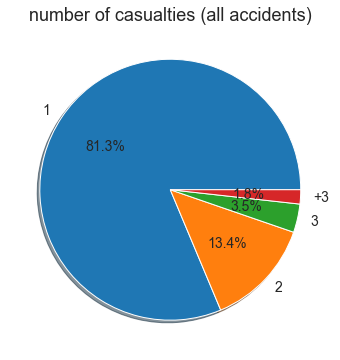

In [23]:
sns.set_style('white')
fig = plt.figure(figsize=(6,6))
plt.title("number of casualties (all accidents)",fontsize=18)
plt.pie(x['count'], labels = x['number_of_casualties'],textprops={'fontsize': 14},shadow=True,autopct = '%.1f%%')
plt.show() 

* like 95% from the accidents are with 1 or 2 casualties only!

In [24]:
lookup_search('accident_severity')

table         field name code/format    label note
5  Accident  accident_severity           1    Fatal  NaN
6  Accident  accident_severity           2  Serious  NaN
7  Accident  accident_severity           3   Slight  NaN

In [25]:
x = accidents['accident_severity'].value_counts()

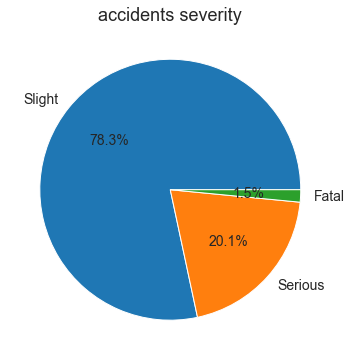

In [26]:
sns.set_style('white')
fig = plt.figure(figsize=(6,6))
plt.title("accidents severity",fontsize=18)
plt.pie(x.values, labels = ['Slight','Serious','Fatal'],textprops={'fontsize': 14},autopct = '%.1f%%')
plt.show() 

* we are going to focus only on fatal accidents with 3 casualties or more. it's a very tiny fraction from all the accidents.

* lets create a column which inidicate if the accident is severe (1) or not (0).
* like the project definition says: "The safety team classes major incidents as fatal accidents involving 3+ casualties."

In [27]:
accidents['severe'] = accidents.apply(lambda r: 1 if r['accident_severity']==1 and r['number_of_casualties']>2 else 0,axis = 1 )

In [28]:
accidents.loc[accidents['severe']==1].head()

accident_index  accident_year accident_reference  longitude   latitude  \
3102   2020010237692           2020           10237692   0.224735  51.587108   
3583   2020010239141           2020           10239141   0.101736  51.499338   
19652  2020010283951           2020          010283951  -0.218475  51.482150   
21148  2020030957848           2020          030957848  -2.897101  54.814695   
21166  2020030959320           2020          030959320  -3.189454  54.150303   

       accident_severity  number_of_vehicles  number_of_casualties  \
3102                   1                   8                    11   
3583                   1                   1                     3   
19652                  1                   2                     4   
21148                  1                   2                     3   
21166                  1                   1                     4   

             date  day_of_week  ... light_conditions  weather_conditions  \
3102   2020-02-20            5  ...                1                   8   
3583   2020-02-29            7  ...                6                   2   
19652  2020-12-10            5  ...                4                   1   
21148  2020-06-15            2  ...                1                   1   
21166  2020-06-21            1  ...                1                   1   

       road_surface_conditions  special_conditions_at_site  \
3102                         2                           0   
3583                         2                           0   
19652                        2                           0   
21148                        1                           0   
21166                        1                           0   

       carriageway_hazards  urban_or_rural_area            datetime  hour  \
3102                     0                    1 2020-02-20 13:17:00    13   
3583                     0                    2 2020-02-29 05:13:00     5   
19652                    0                    1 2020-12-10 22:26:00    22   
21148                    0                    2 2020-06-15 12:11:00    12   
21166                    0                    2 2020-06-21 14:20:00    14   

       month  severe  
3102       2       1  
3583       2       1  
19652     12       1  
21148      6       1  
21166      6       1  

[5 rows x 31 columns]

In [29]:
accidents.loc[accidents['severe']==1].shape, accidents.shape

((202, 31), (91199, 31))

* we are focusing only on 202 accidents from 91200!

In [30]:
accidents.loc[accidents['severe']==0].head()

accident_index  accident_year accident_reference  longitude   latitude  \
0  2020010219808           2020           10219808  -0.254001  51.462262   
1  2020010220496           2020           10220496  -0.139253  51.470327   
2  2020010228005           2020           10228005  -0.178719  51.529614   
3  2020010228006           2020           10228006  -0.001683  51.541210   
4  2020010228011           2020           10228011  -0.137592  51.515704   

   accident_severity  number_of_vehicles  number_of_casualties        date  \
0                  3                   1                     1  2020-02-04   
1                  3                   1                     2  2020-04-27   
2                  3                   1                     1  2020-01-01   
3                  2                   1                     1  2020-01-01   
4                  3                   1                     2  2020-01-01   

   day_of_week  ... light_conditions  weather_conditions  \
0            3  ...                1                   9   
1            2  ...                1                   1   
2            4  ...                4                   1   
3            4  ...                4                   1   
4            4  ...                4                   1   

   road_surface_conditions  special_conditions_at_site  carriageway_hazards  \
0                        9                           0                    0   
1                        1                           0                    0   
2                        2                           0                    0   
3                        1                           0                    0   
4                        1                           0                    0   

   urban_or_rural_area            datetime  hour  month  severe  
0                    1 2020-02-04 09:00:00     9      2       0  
1                    1 2020-04-27 13:55:00    13      4       0  
2                    1 2020-01-01 01:25:00     1      1       0  
3                    1 2020-01-01 01:50:00     1      1       0  
4                    1 2020-01-01 02:25:00     2      1       0  

[5 rows x 31 columns]

* for convenience , lets create 2 dataframes: svere and non severe.

In [31]:
severe_df = accidents[accidents['severe']==1]
non_severe_df = accidents[accidents['severe']==0]

In [32]:
non_severe_df.head()

accident_index  accident_year accident_reference  longitude   latitude  \
0  2020010219808           2020           10219808  -0.254001  51.462262   
1  2020010220496           2020           10220496  -0.139253  51.470327   
2  2020010228005           2020           10228005  -0.178719  51.529614   
3  2020010228006           2020           10228006  -0.001683  51.541210   
4  2020010228011           2020           10228011  -0.137592  51.515704   

   accident_severity  number_of_vehicles  number_of_casualties        date  \
0                  3                   1                     1  2020-02-04   
1                  3                   1                     2  2020-04-27   
2                  3                   1                     1  2020-01-01   
3                  2                   1                     1  2020-01-01   
4                  3                   1                     2  2020-01-01   

   day_of_week  ... light_conditions  weather_conditions  \
0            3  ...                1                   9   
1            2  ...                1                   1   
2            4  ...                4                   1   
3            4  ...                4                   1   
4            4  ...                4                   1   

   road_surface_conditions  special_conditions_at_site  carriageway_hazards  \
0                        9                           0                    0   
1                        1                           0                    0   
2                        2                           0                    0   
3                        1                           0                    0   
4                        1                           0                    0   

   urban_or_rural_area            datetime  hour  month  severe  
0                    1 2020-02-04 09:00:00     9      2       0  
1                    1 2020-04-27 13:55:00    13      4       0  
2                    1 2020-01-01 01:25:00     1      1       0  
3                    1 2020-01-01 01:50:00     1      1       0  
4                    1 2020-01-01 02:25:00     2      1       0  

[5 rows x 31 columns]

In [33]:
severe_df.head()

accident_index  accident_year accident_reference  longitude   latitude  \
3102   2020010237692           2020           10237692   0.224735  51.587108   
3583   2020010239141           2020           10239141   0.101736  51.499338   
19652  2020010283951           2020          010283951  -0.218475  51.482150   
21148  2020030957848           2020          030957848  -2.897101  54.814695   
21166  2020030959320           2020          030959320  -3.189454  54.150303   

       accident_severity  number_of_vehicles  number_of_casualties  \
3102                   1                   8                    11   
3583                   1                   1                     3   
19652                  1                   2                     4   
21148                  1                   2                     3   
21166                  1                   1                     4   

             date  day_of_week  ... light_conditions  weather_conditions  \
3102   2020-02-20            5  ...                1                   8   
3583   2020-02-29            7  ...                6                   2   
19652  2020-12-10            5  ...                4                   1   
21148  2020-06-15            2  ...                1                   1   
21166  2020-06-21            1  ...                1                   1   

       road_surface_conditions  special_conditions_at_site  \
3102                         2                           0   
3583                         2                           0   
19652                        2                           0   
21148                        1                           0   
21166                        1                           0   

       carriageway_hazards  urban_or_rural_area            datetime  hour  \
3102                     0                    1 2020-02-20 13:17:00    13   
3583                     0                    2 2020-02-29 05:13:00     5   
19652                    0                    1 2020-12-10 22:26:00    22   
21148                    0                    2 2020-06-15 12:11:00    12   
21166                    0                    2 2020-06-21 14:20:00    14   

       month  severe  
3102       2       1  
3583       2       1  
19652     12       1  
21148      6       1  
21166      6       1  

[5 rows x 31 columns]

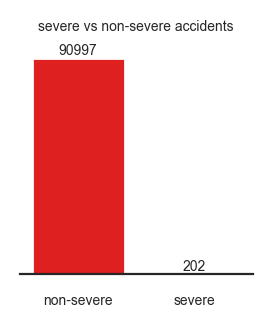

In [34]:
fig, ax = plt.subplots(1,1,figsize=(1.5,1.5),dpi=200)
sns.countplot(data=accidents,x="severe",ax=ax, color='red')
ax.set_xticklabels(["non-severe","severe"],fontsize=5);
ax.set_title("severe vs non-severe accidents",fontsize=5)
for bars in ax.containers:
        ax.bar_label(bars,size=5)
ax.set_yticks([]);
ax.set_ylabel("");
ax.set_xlabel("");
sns.despine(left=True)

* and in percentages:

In [35]:
round(accidents.severe.value_counts(normalize=True),3)*100

0    99.8
1     0.2
Name: severe, dtype: float64

* there are like 3.5% of severe accidents from all the accidents.

## Features checking
***
[back](#Table-of-Contents)

### the time differences between severe and not:
* we will check day of week, hour in day and month.

In [36]:
def create_ranges(col,col_range,severe_df=severe_df,non_severe_df=non_severe_df):
    """
    we create here 4 arrays: a,b,c,d.
    every one has the value counts of the checked columns. 
    a & b are in counts, c & d are in percentages.
    a & c are of severe accidents, b & d are of non-severe.
    col - the checked column.
    col_range - we sometimes dont need all the values in the column range, so we could costumize it.
    """
    a = severe_df[col].value_counts()
#     we do it for cases where there are not in a all the indexes in col_range:
    index_severe = sorted(list(set(a.index).intersection(col_range)))
    a=a[index_severe]
    b = non_severe_df[col].value_counts()
    index_non_severe = sorted(list(set(b.index).intersection(col_range)))
    b=b[index_non_severe]
    c = round(severe_df[col].value_counts(normalize=True)[index_severe] *100,1)
    d = round(non_severe_df[col].value_counts(normalize=True)[index_non_severe]*100,1)
    return a,b,c,d


In [37]:
def create_2_2(name, x_tick_labels=None,use_lookup=None,rotate=None,figsize=(14,16)):
    """
    function for creating 4 plots, 2*2 for a,b,c,d above.
    name - the name we want in the figure title.
    x_tick_label - if we want to customize the tick labels.
    use_lookup - if we want to use the values from "lookup" table as x ticklabels.
    """
    fig, ax = plt.subplots(2,2,figsize=(14,16),dpi=200)
    for j,k in ((a,[0,0]),(b,[0,1]),(c,[1,0]),(d,[1,1])):
        x,y = k
        if x==0:
            per="(cases)"
        else:
            per="(percentages)"
        if y==0:
            pal = "OrRd"
            t = "severe"
            t_color= "red"
        else:
            t="non-severe"
            pal= "YlOrBr"
            t_color="brown"

        pal = sns.color_palette(pal, len(j))
        rank = j.argsort().argsort()
        ax[x,y].set_title(f"{t} accidents - {name}, 2020 {per}",color=t_color)
        sns.barplot(x=j.index, y=j.values,ax=ax[x,y], palette=np.array(pal)[rank])
        sns.pointplot(x=j.index, y=j.values, marker='o',ax=ax[x,y],color ="#9bc2de")
        ax[x,y].set_yticks([]);
        for bars in ax[x,y].containers:
            ax[x,y].bar_label(bars,size=10)
        ax[x,y].set_xlabel("")
        ax[x,y].set_ylabel("");
        if x_tick_labels:
            ax[x,y].set_xticklabels(x_tick_labels,fontsize=9,rotation=rotate)
        elif use_lookup:
            labels = lookup[lookup['field name']==j.name].loc[:,['code/format','label']]

            labels = list(labels[labels["code/format"].isin([str(i) for i in j.index])]["label"].values)
        
            ax[x,y].set_xticklabels(labels,fontsize=9,rotation=rotate)
            plt.tight_layout()

    sns.despine(left=True)  

### day of week
***
[back](#Table-of-Contents)

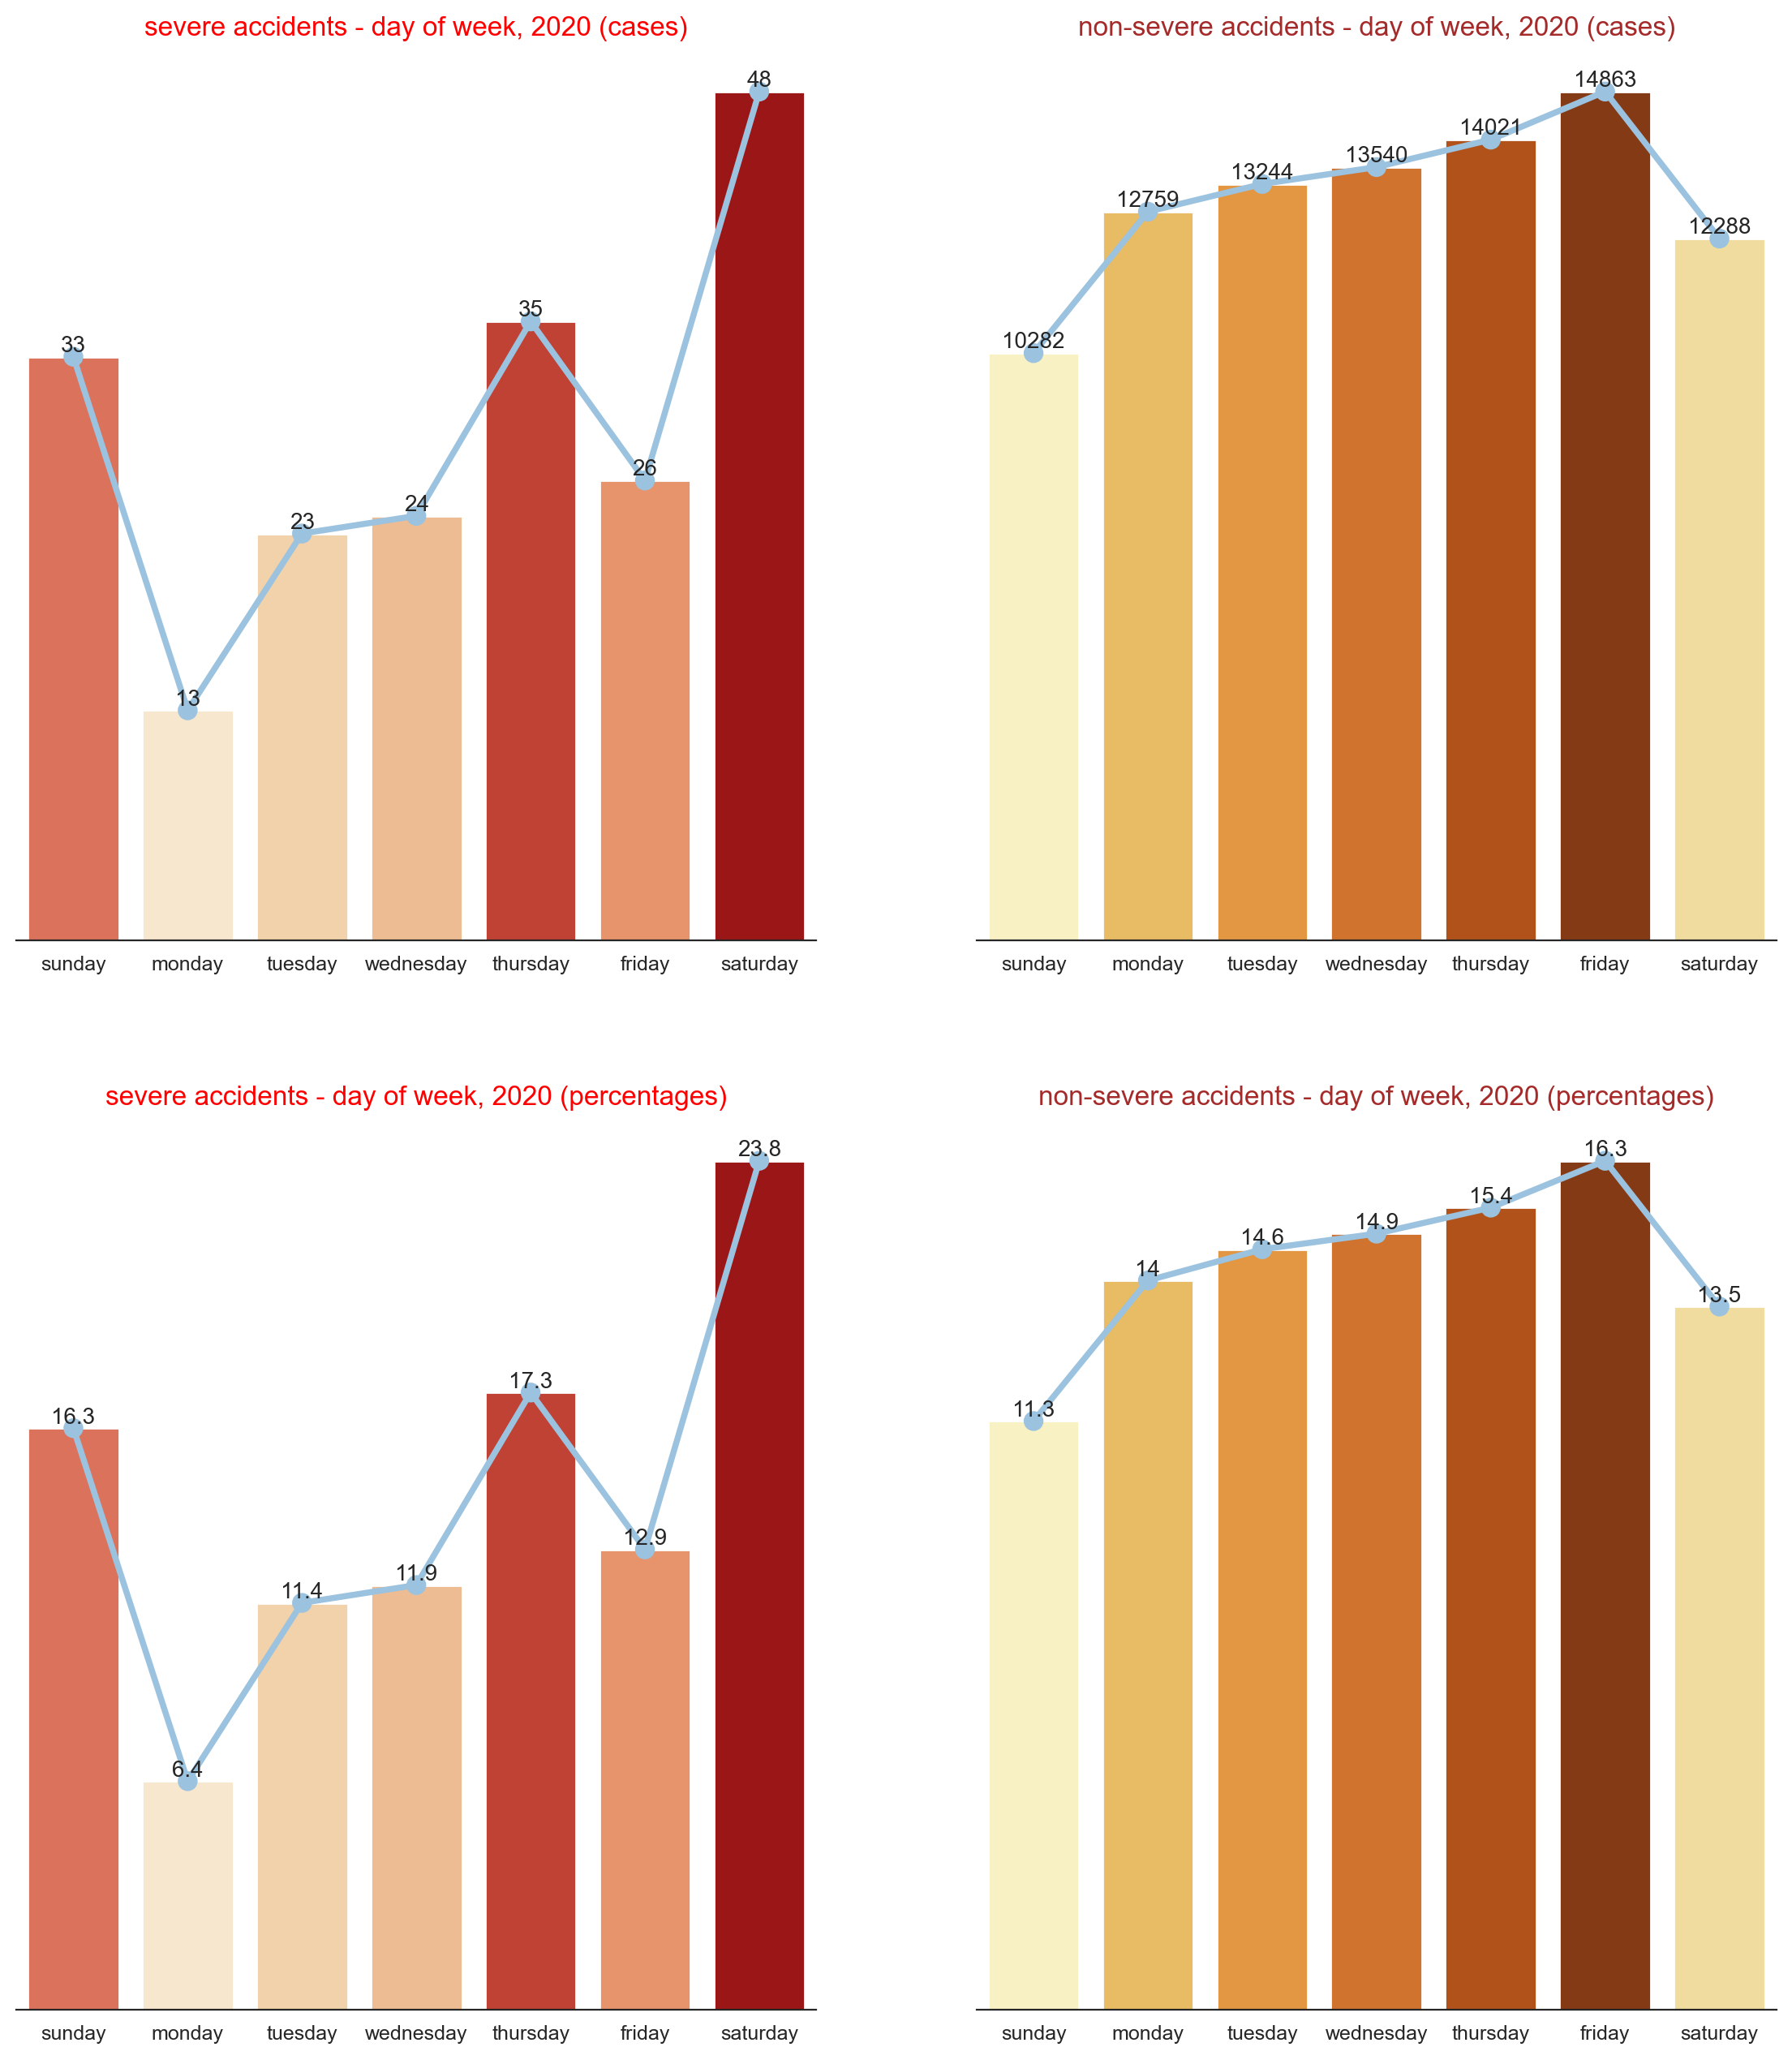

In [38]:
a,b,c,d = create_ranges('day_of_week',range(1,8)) 
labels = ["sunday","monday","tuesday","wednesday","thursday","friday","saturday"]
create_2_2("day of week",  x_tick_labels = labels)

* the distributions are very different, the most obvious thing is that almost 25% from the severe accidents happend on saturday.
* it's logical because people going to hang out.
* on monday there are only 6.4% from the severe accidents.

In [39]:
def plot_4_rows(name):
    """
    a function to plot 4 rows hours in a day distributions.
    """
    fig, ax = plt.subplots(4,1,figsize=(14,16),dpi=250)
    for k,j in enumerate([a,b,c,d]):
        r = k

        if r%2==0:        
            pal = "OrRd"
            t = "severe"
            t_color= "red"
        else:
            pal= "YlOrBr"
            t_color="brown"
            t="non-severe"
        if r<2:
            per="(cases)"
        else:
            per="(percentages)"
        pal = sns.color_palette(pal, len(j))
        rank = j.argsort().argsort()
        ax[r].set_title(f"{t} accidents - {name} {per}, 2020",color=t_color)
        sns.barplot(x=j.index, y=j.values,ax=ax[r], palette=np.array(pal)[rank])
        sns.pointplot(x=j.index, y=j.values, marker='o',ax=ax[r],color="#9bc2de")
        ax[r].set_yticks([]);
        for bars in ax[r].containers:
            ax[r].bar_label(bars,size=10)
        ax[r].set_xlabel("")
        ax[r].set_ylabel("");

    sns.despine(left=True)

### hour in the day
***
[back](#Table-of-Contents)

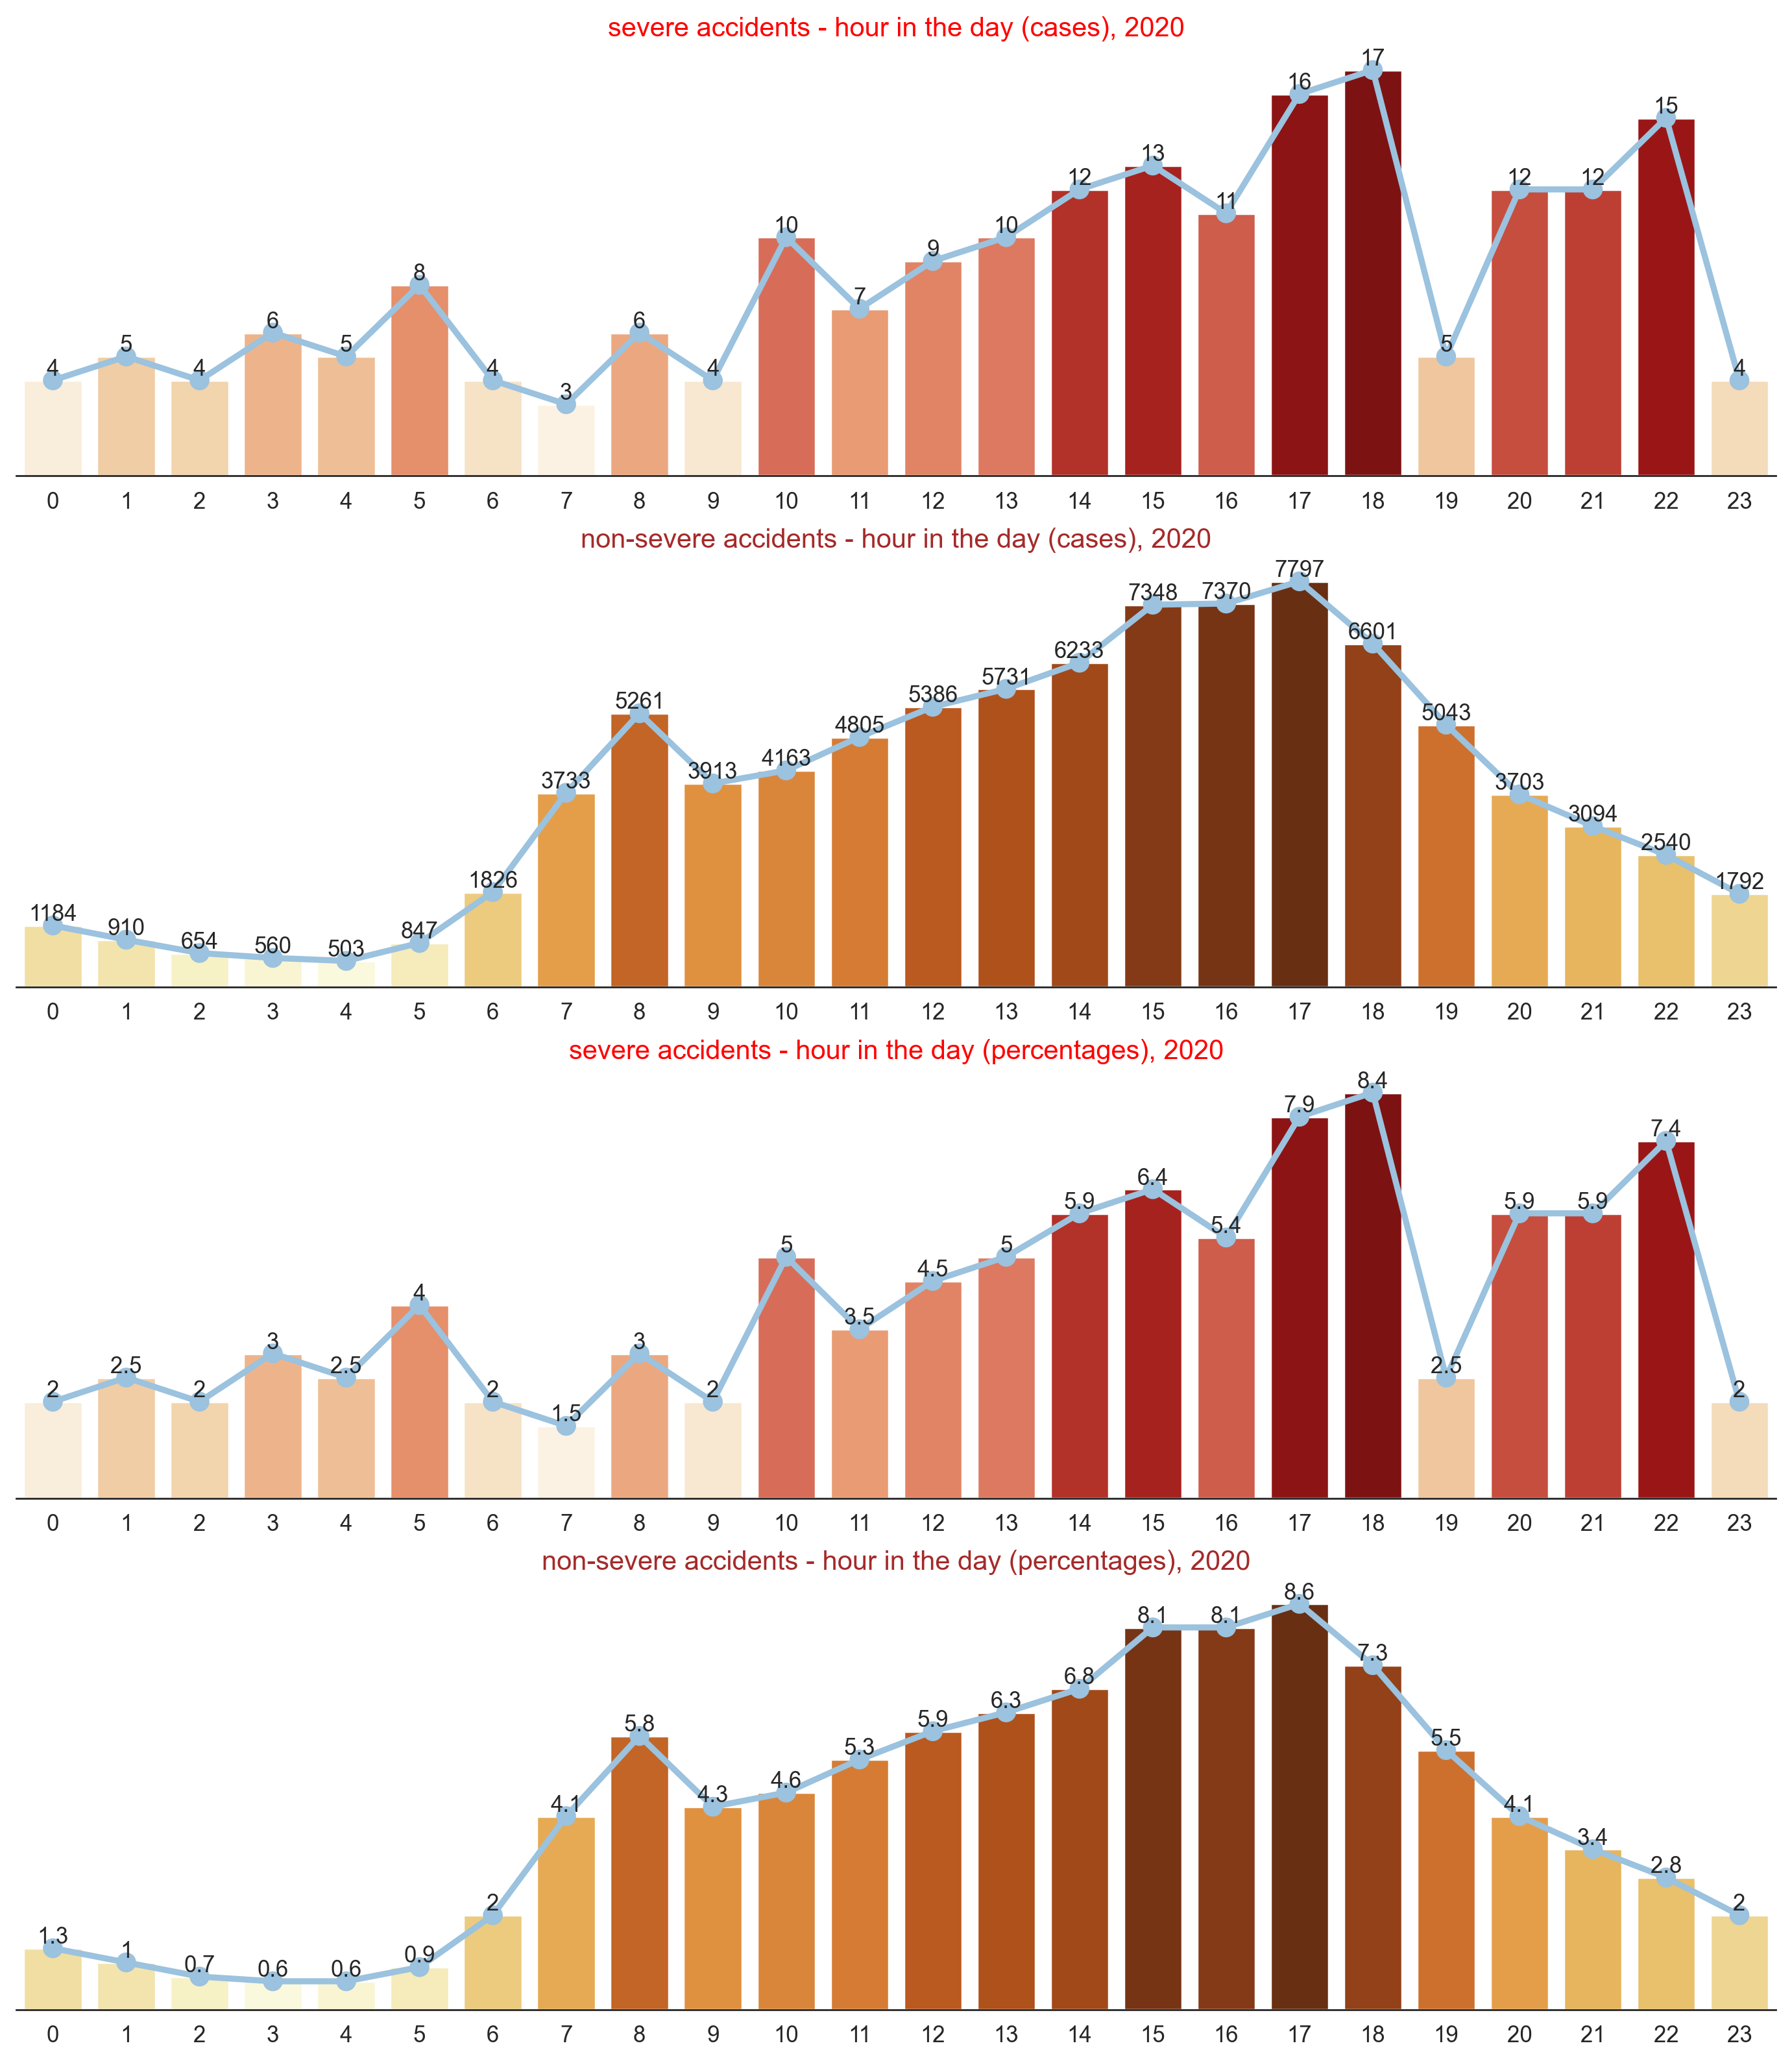

In [40]:
a,b,c,d = create_ranges('hour',range(0,24))
plot_4_rows(name="hour in the day")

* the distributions are very different. some obvious differences:
* we could see a big difference in hours 20-22:
    * in non severe the accidents amount decrease, in severe there is another pick. 
    * the reason is probably people which going to hang out.
* we could see that in the night hours 0 to 5, there is more tendency to severe accidents.
* we could see in both distributions that the afternoon hours are the most dangerous hours.

### month
***
[back](#Table-of-Contents)

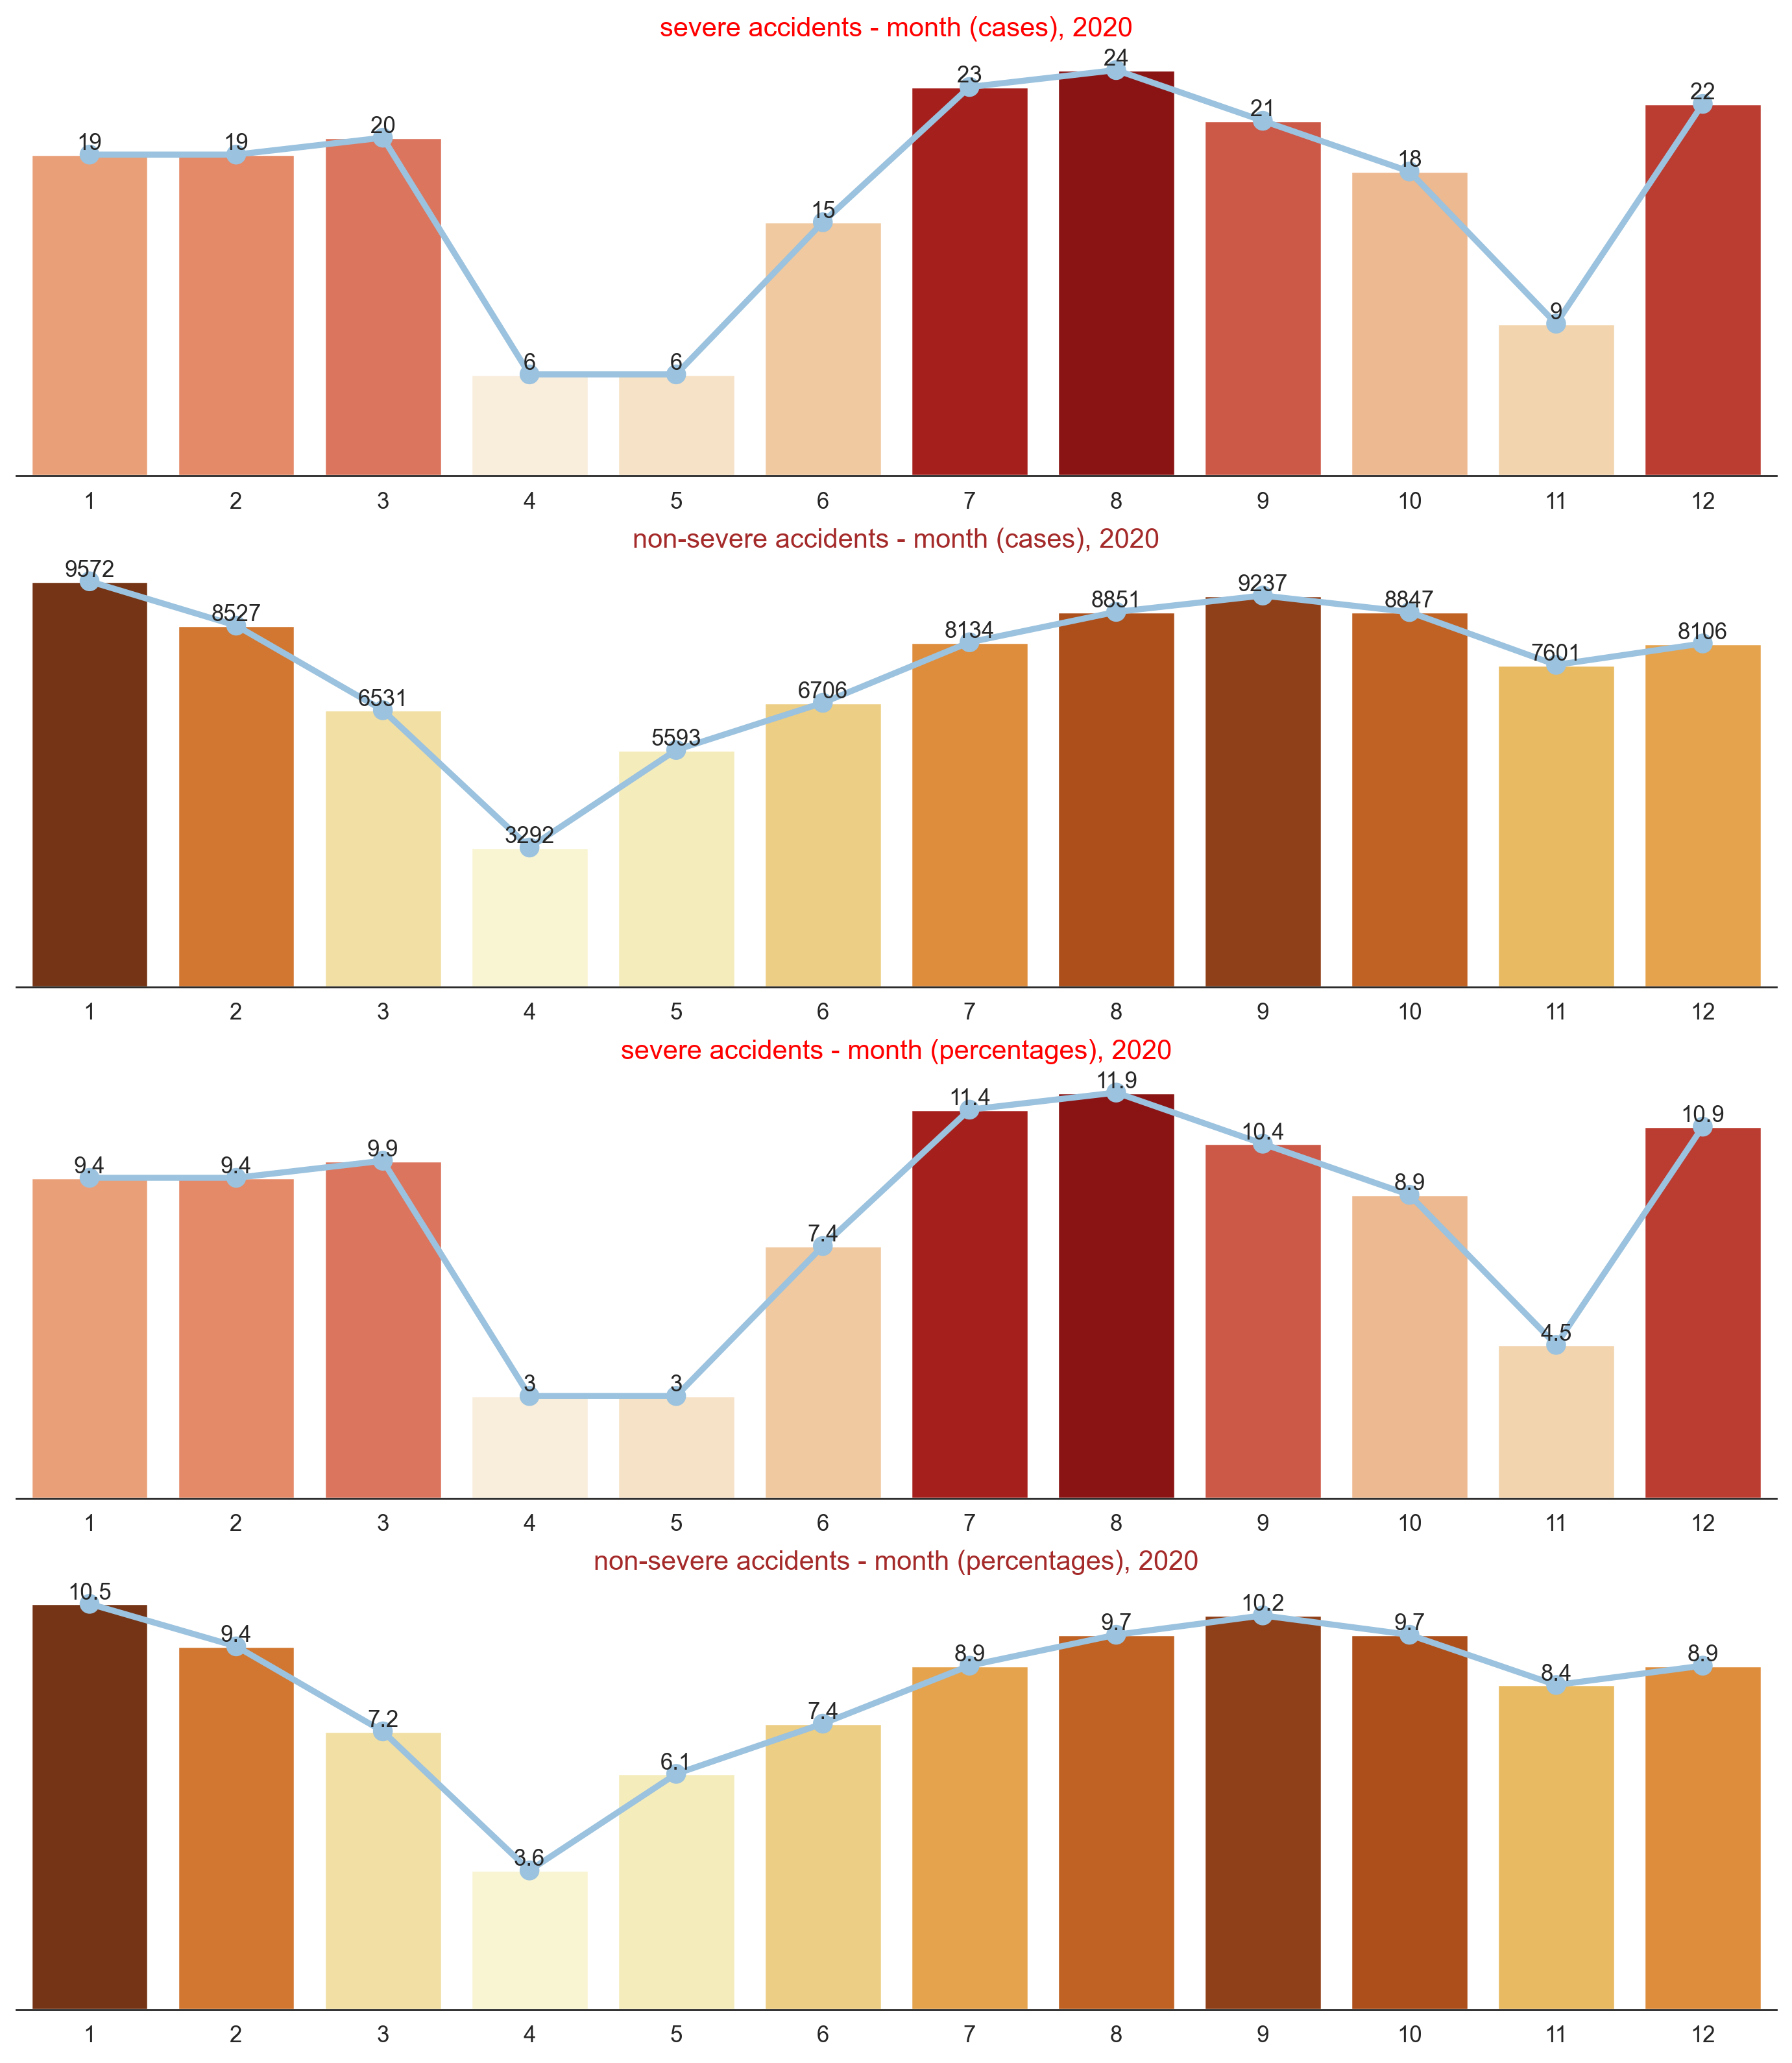

In [41]:
a,b,c,d = create_ranges('month',range(1,13))
plot_4_rows(name="month")

* the month with the most severe accidents are july, august, december.
* it reasonable that july & august is the time people in vacations, december is hollidays.
* maybe the decline in accidents in april is because of the COVID - we are talking on 2020.

### weather conditions
***
[back](#Table-of-Contents)

In [42]:
def col_data(col_name):
    display(lookup_search(col_name))
    print("column values:")
    display(pd.DataFrame(accidents[col_name].value_counts()).transpose())

def filter_dfs(col_name,bad_values,col_range):
    x = severe_df[~severe_df[col_name].isin(bad_values)]
    y = non_severe_df[~non_severe_df[col_name].isin(bad_values)]
    a,b,c,d=create_ranges(col_name,col_range,x,y)
    return a,b,c,d

In [43]:
col_data('weather_conditions')

table          field name code/format                         label  \
86  Accident  weather_conditions           1            Fine no high winds   
87  Accident  weather_conditions           2         Raining no high winds   
88  Accident  weather_conditions           3         Snowing no high winds   
89  Accident  weather_conditions           4             Fine + high winds   
90  Accident  weather_conditions           5          Raining + high winds   
91  Accident  weather_conditions           6          Snowing + high winds   
92  Accident  weather_conditions           7                   Fog or mist   
93  Accident  weather_conditions           8                         Other   
94  Accident  weather_conditions           9                       Unknown   
95  Accident  weather_conditions          -1  Data missing or out of range   

   note  
86  NaN  
87  NaN  
88  NaN  
89  NaN  
90  NaN  
91  NaN  
92  NaN  
93  NaN  
94  NaN  
95  NaN

None

column values:


1      2     8     9     5     4    7    3   6  -1
weather_conditions  70729  11583  2629  2423  1665  1401  510  185  73   1

* we see here that 8,9,-1 are values we shouldn't refer to.  
* 7 is different too from 1-6 which are labeled by order.

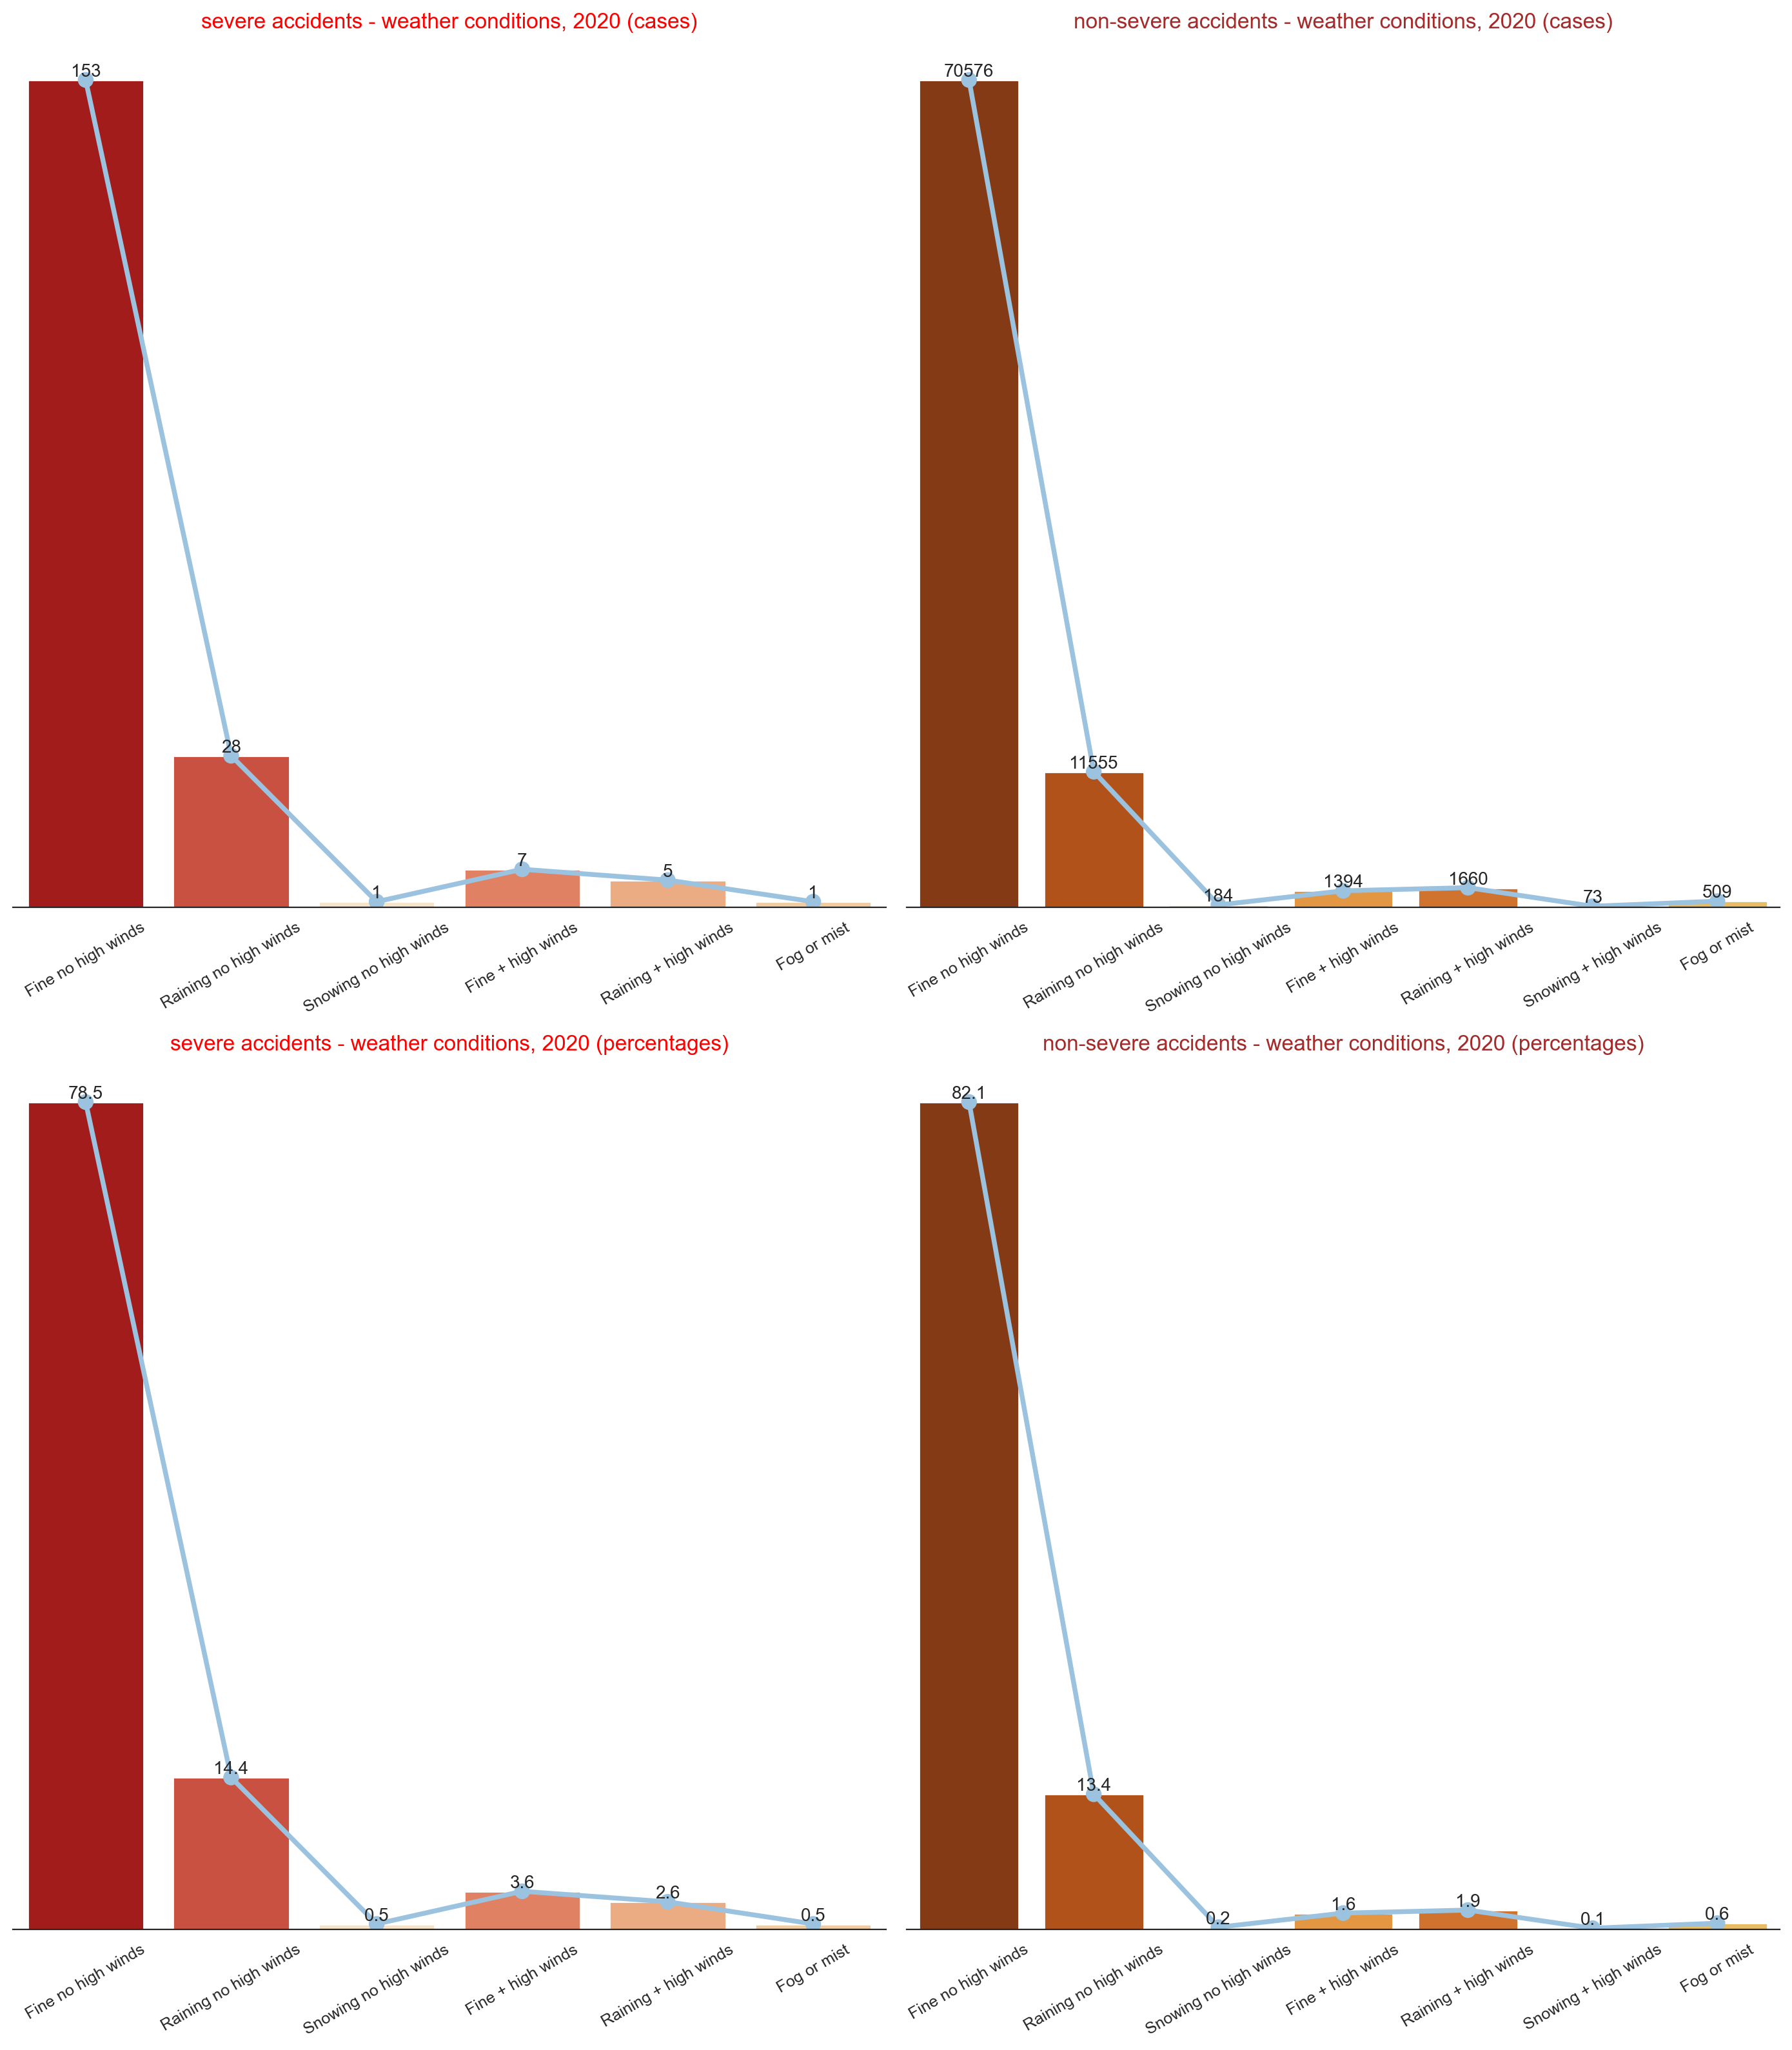

In [44]:
a,b,c,d = filter_dfs('weather_conditions',[8,9,-1],range(1,8))
create_2_2("weather conditions",  use_lookup=True, rotate=30)

* the distributions are simmilar. the most of the accidents occur on fine weather! like 80%.
* we could say that in hard weather conditions, there is more decline to severe accidents.

### speed limit
***
[back](#Table-of-Contents)

In [45]:
col_data('speed_limit')

table   field name code/format                         label  \
36  Accident  speed_limit         NaN                           NaN   
37  Accident  speed_limit          -1  Data missing or out of range   
38  Accident  speed_limit          99       unknown (self reported)   

                                                 note  
36  20,30,40,50,60,70 are the only valid speed lim...  
37                                                NaN  
38                                                NaN

None

column values:


30     60     20    40    70    50  -1 
speed_limit  52260  11408  11183  7867  4687  3782   12

In [46]:
a,b,c,d =  filter_dfs('speed_limit',[-1],range(20,80,10))

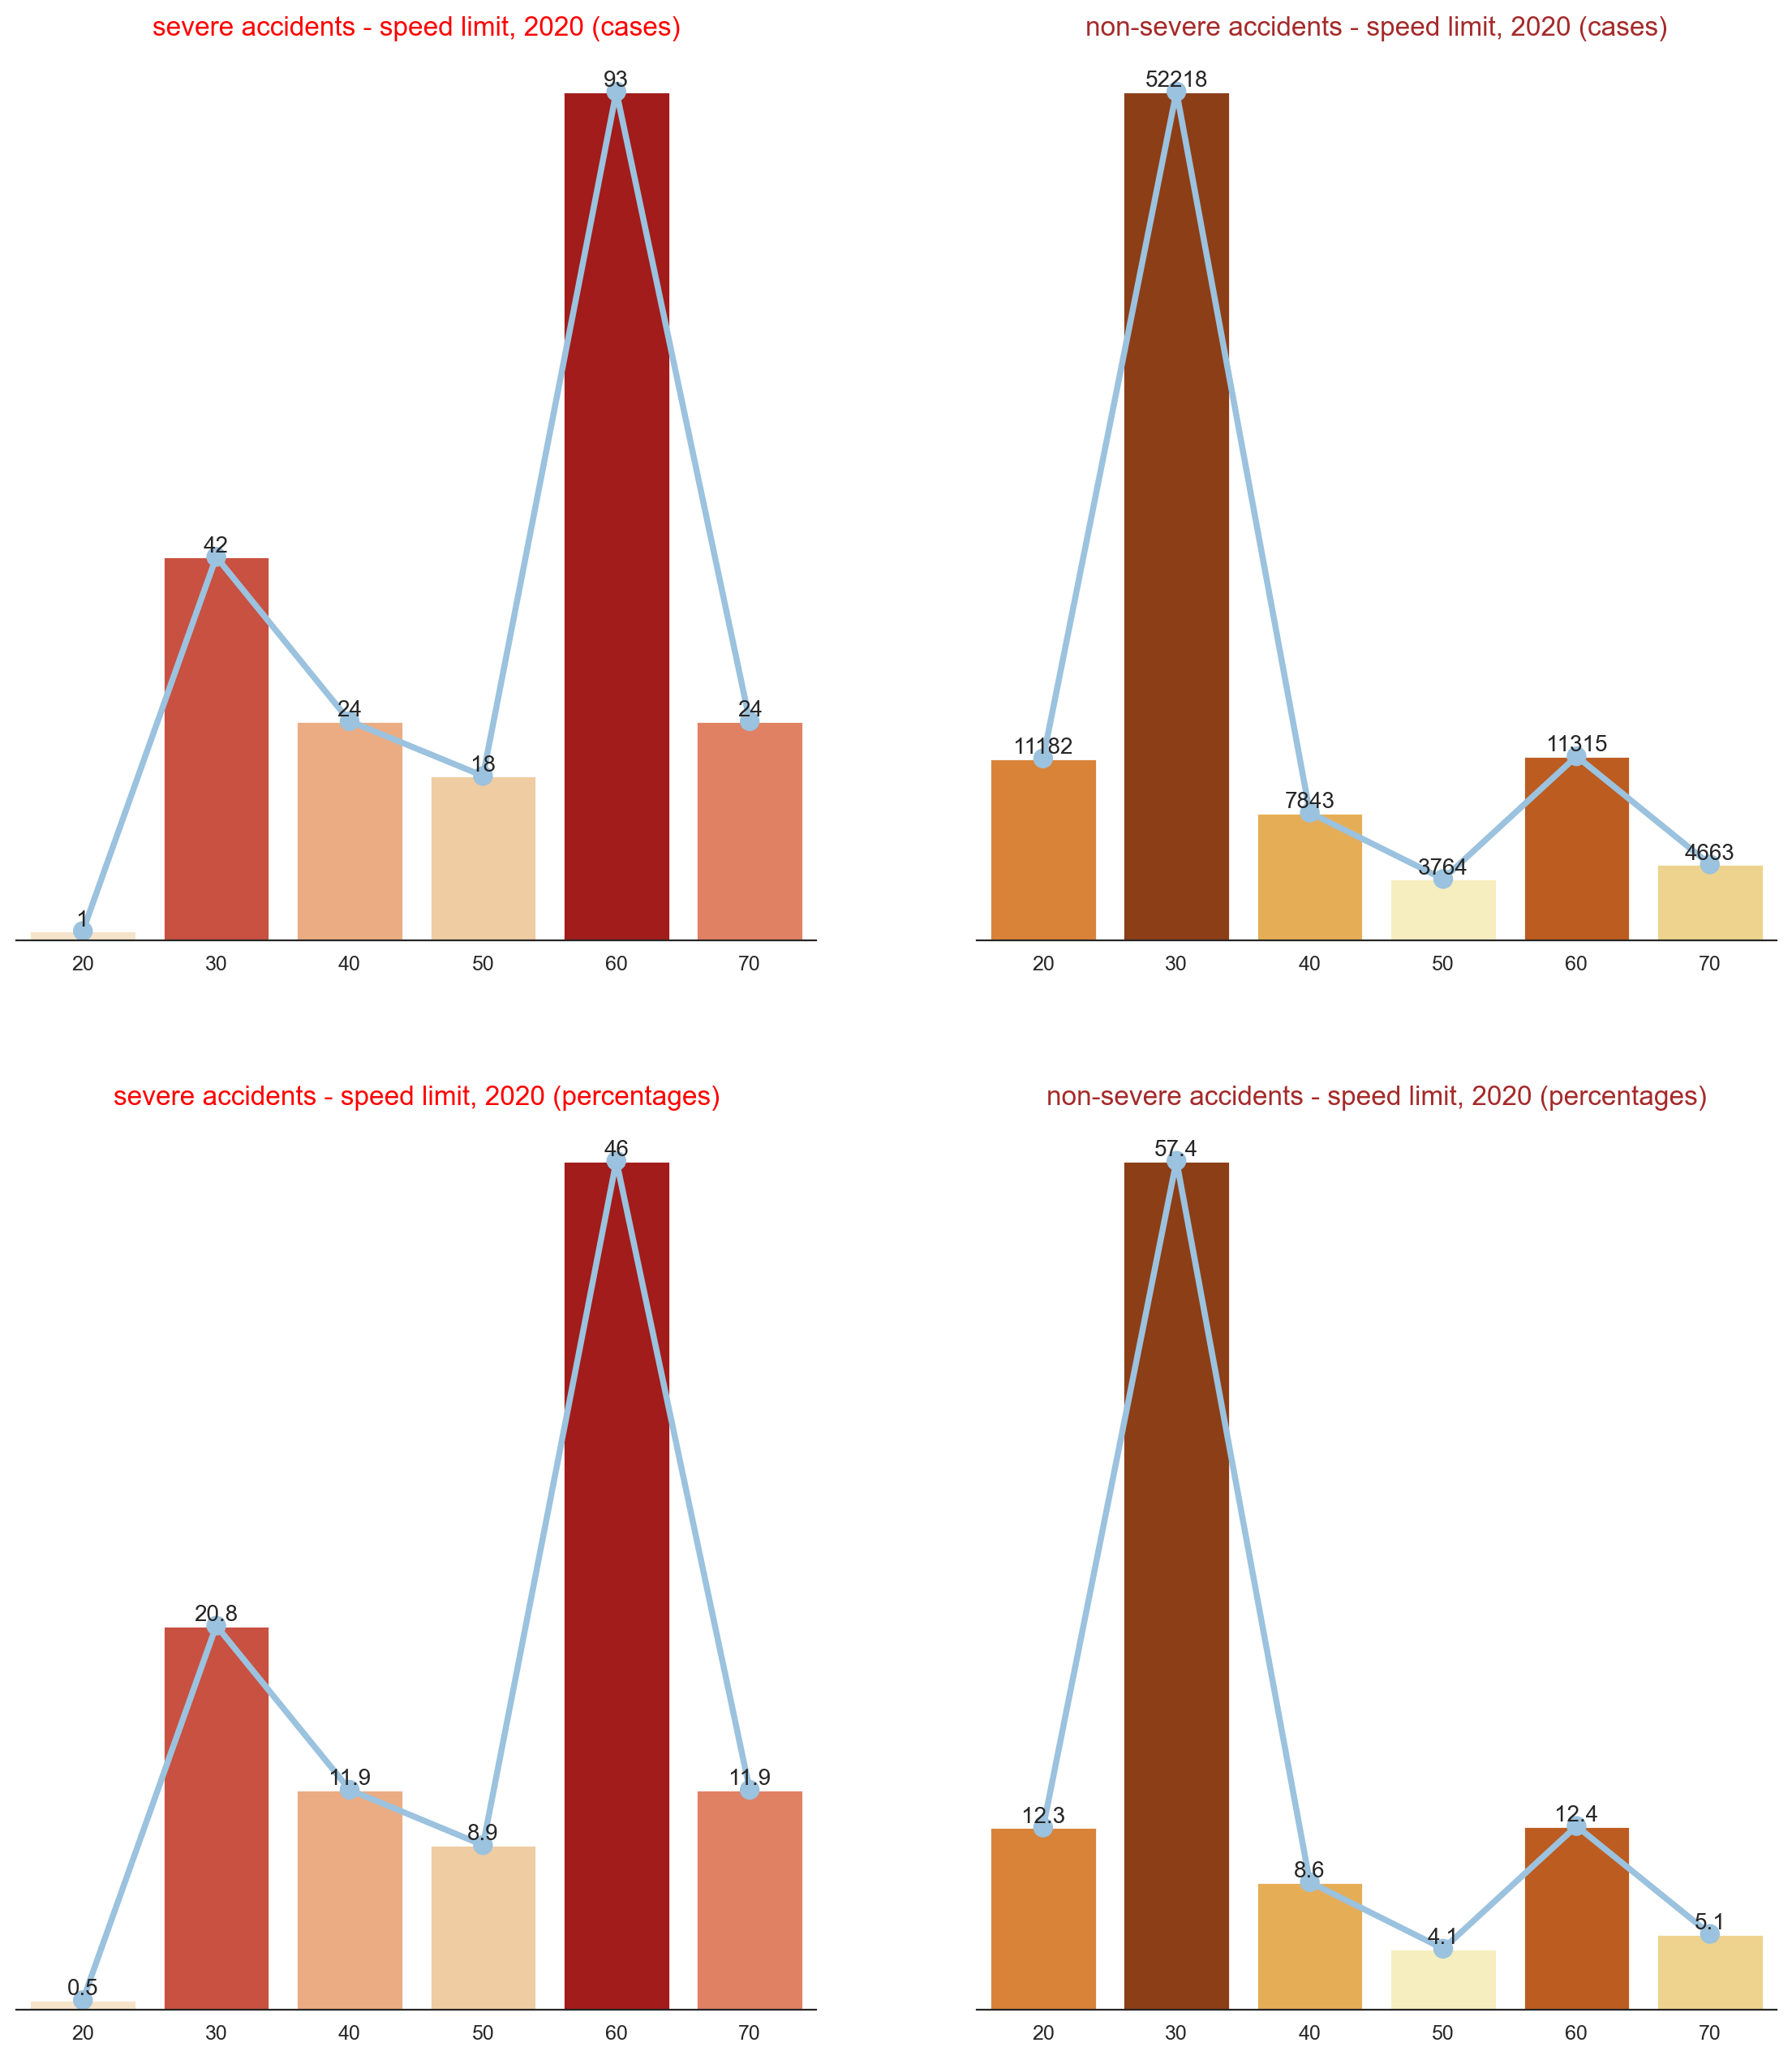

In [47]:
create_2_2("speed limit",
           x_tick_labels=['20','30','40','50','60','70'])

* we could see here important differences:
    * the most of the non severe accidents are at 20-30.
    * the most of severe accidents are at 60-70
* it's very logical that accidents which happend in high speed, would cause more damage.
    

### urban or rural area
***
[back](#Table-of-Contents)


In [48]:
col_data('urban_or_rural_area')

table           field name code/format                         label  \
125  Accident  urban_or_rural_area           1                         Urban   
126  Accident  urban_or_rural_area           2                         Rural   
127  Accident  urban_or_rural_area           3                   Unallocated   
128  Accident  urban_or_rural_area          -1  Data missing or out of range   

                         note  
125  field introduced in 1994  
126  field introduced in 1994  
127  field introduced in 1994  
128  field introduced in 1994

None

column values:


1      2   3
urban_or_rural_area  61737  29448  14

In [49]:
a,b,c,d= filter_dfs('urban_or_rural_area',[3,-1],range(1,3))

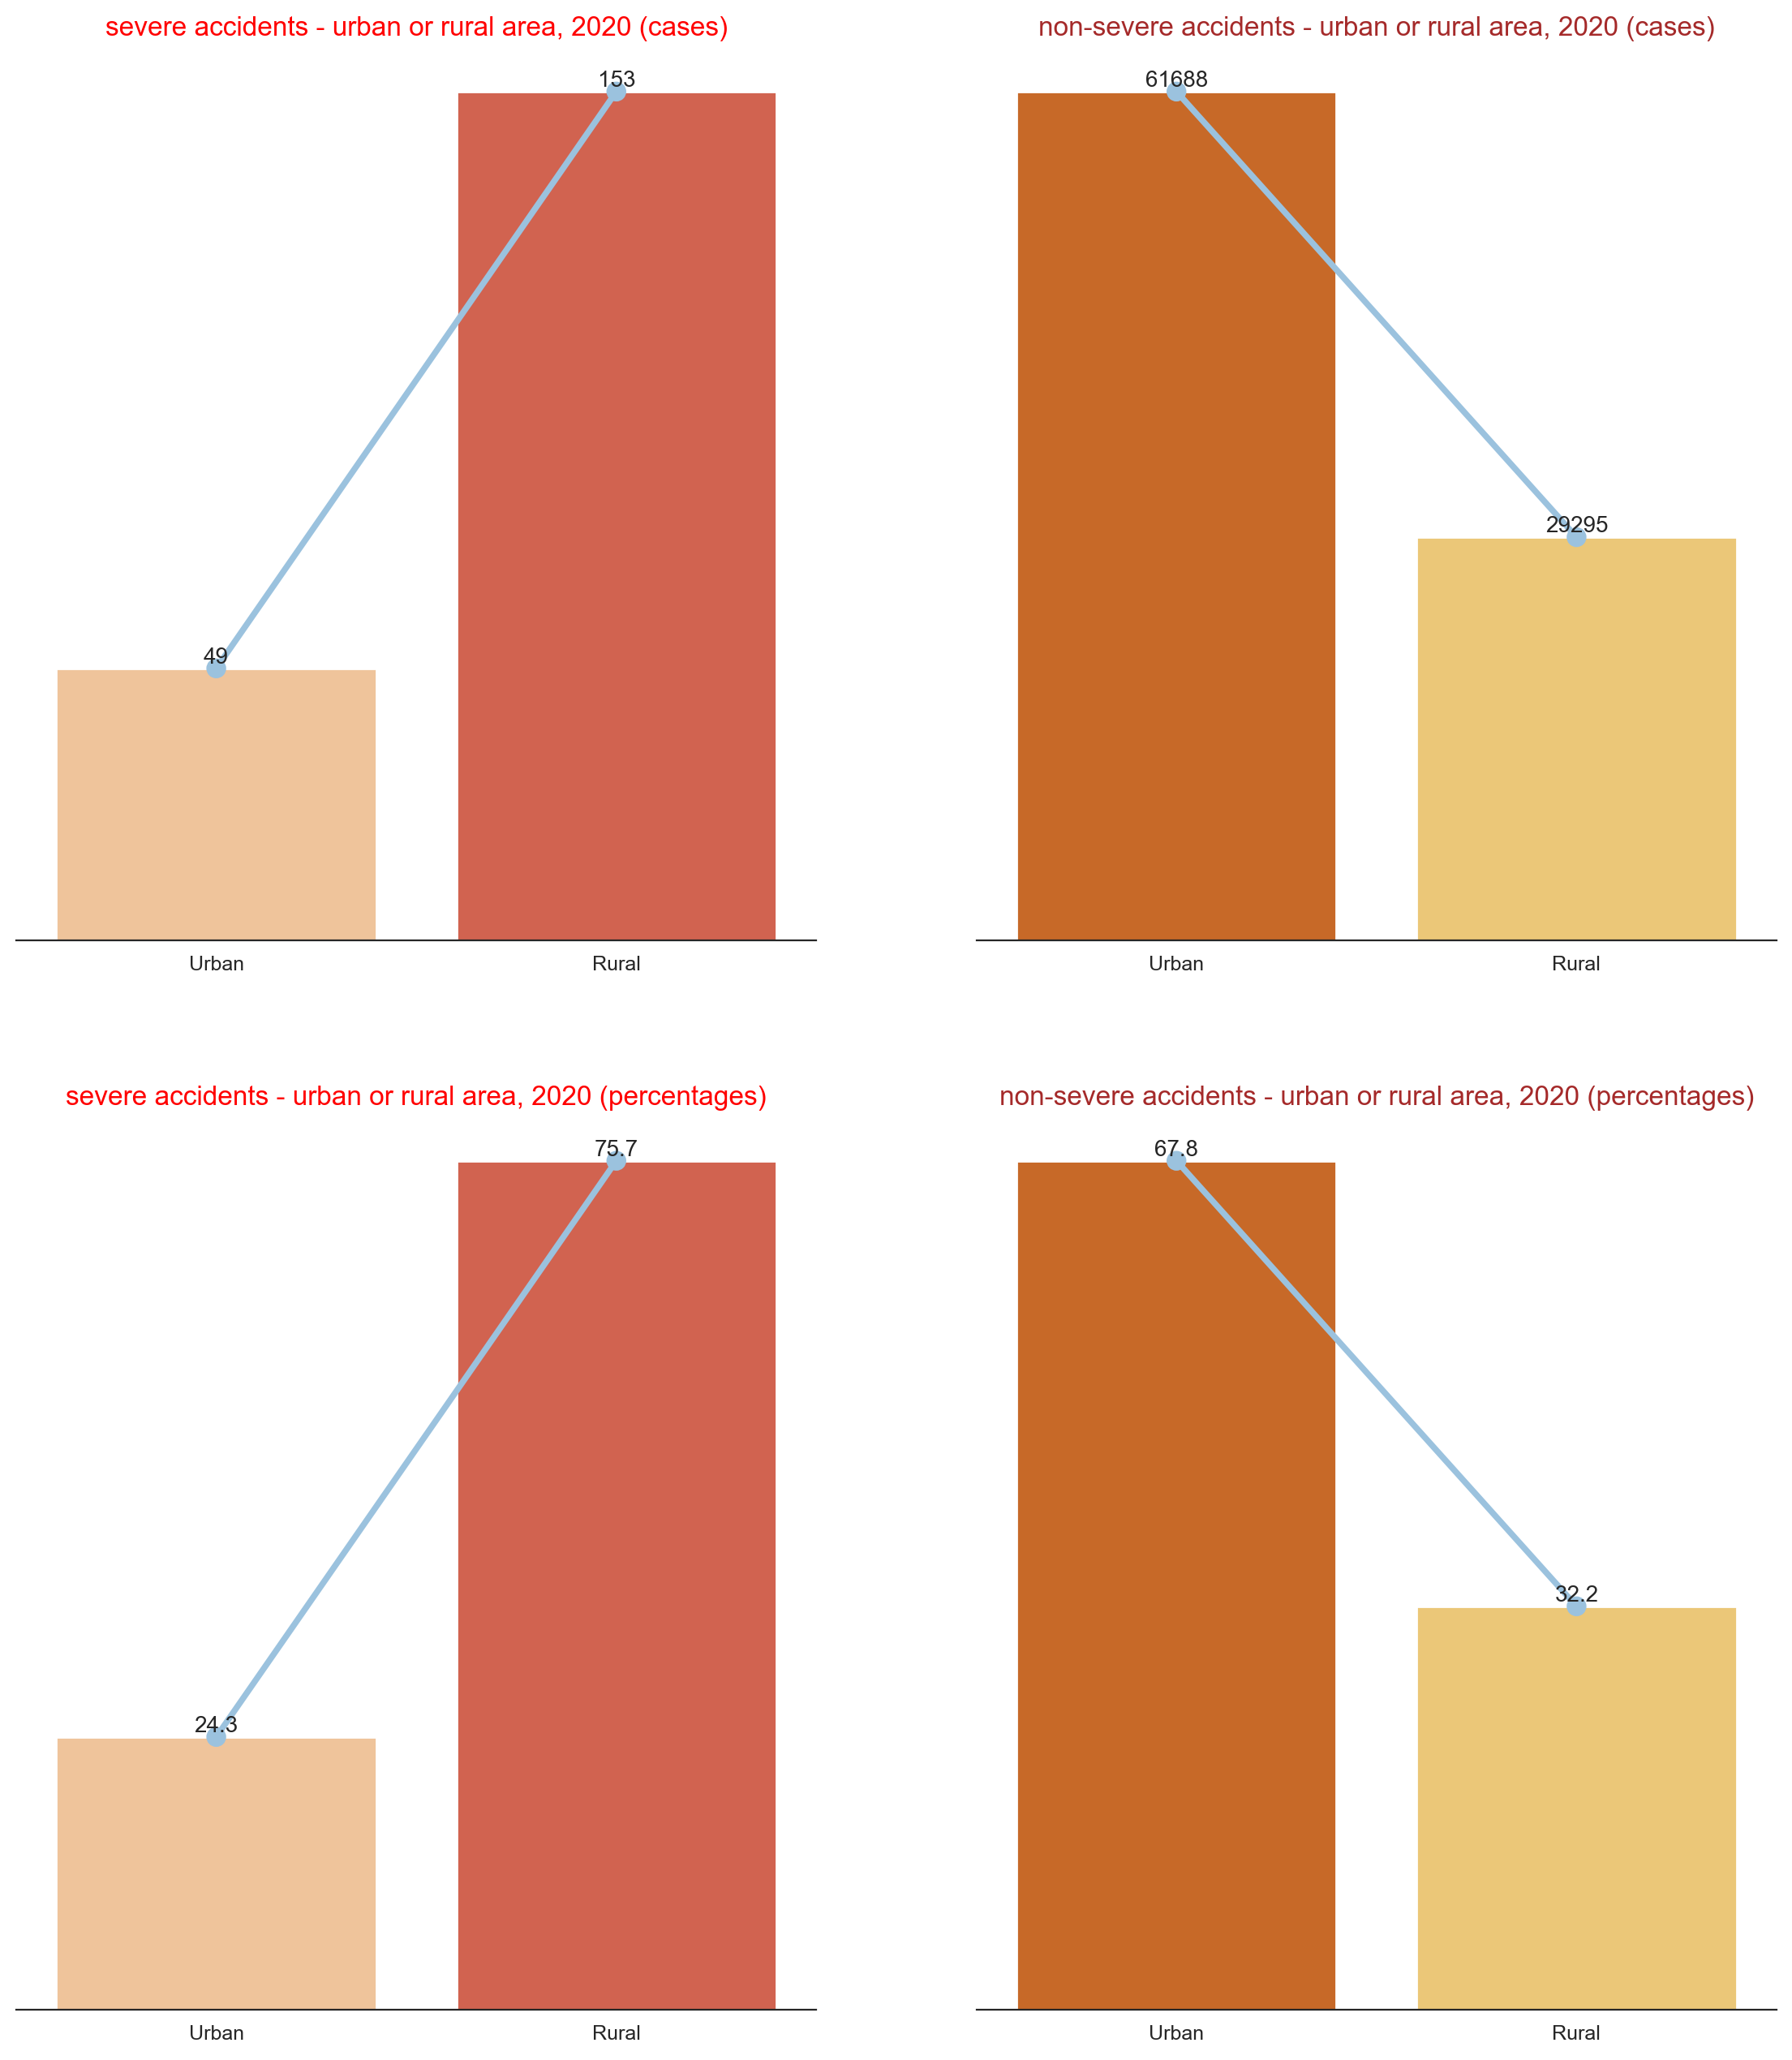

In [50]:
create_2_2("urban or rural area",
           x_tick_labels=["Urban","Rural"])

* this data is very signinficant !
    * 76% from severe accidents are in rural areas, wheras only 32% from the non severe are in rural area!
    * 68% from the non severe happend in urban areas, whereas only 24% from severe are in the urban area!
* we could assume that this data is correlated to the data about the spped: 
    * the severe accidents usually happened in rural area, highways and high speed.
    * the non severe accidents usually happened in urban area, low speed.

### road surface conditions
***
[back](#Table-of-Contents)

In [51]:
col_data('road_surface_conditions')

table               field name code/format  \
96   Accident  road_surface_conditions           1   
97   Accident  road_surface_conditions           2   
98   Accident  road_surface_conditions           3   
99   Accident  road_surface_conditions           4   
100  Accident  road_surface_conditions           5   
101  Accident  road_surface_conditions           6   
102  Accident  road_surface_conditions           7   
103  Accident  road_surface_conditions          -1   
104  Accident  road_surface_conditions           9   

                            label note  
96                            Dry  NaN  
97                    Wet or damp  NaN  
98                           Snow  NaN  
99                   Frost or ice  NaN  
100          Flood over 3cm. deep  NaN  
101                 Oil or diesel  NaN  
102                           Mud  NaN  
103  Data missing or out of range  NaN  
104       unknown (self reported)  NaN

None

column values:


1      2    9    4   -1    5    3
road_surface_conditions  62698  26240  847  764  316  184  150

* we dont see 6 and 7 in the table. so the range is 1 to 5.

In [52]:
a,b,c,d= filter_dfs('road_surface_conditions',[9,-1],range(1,6))

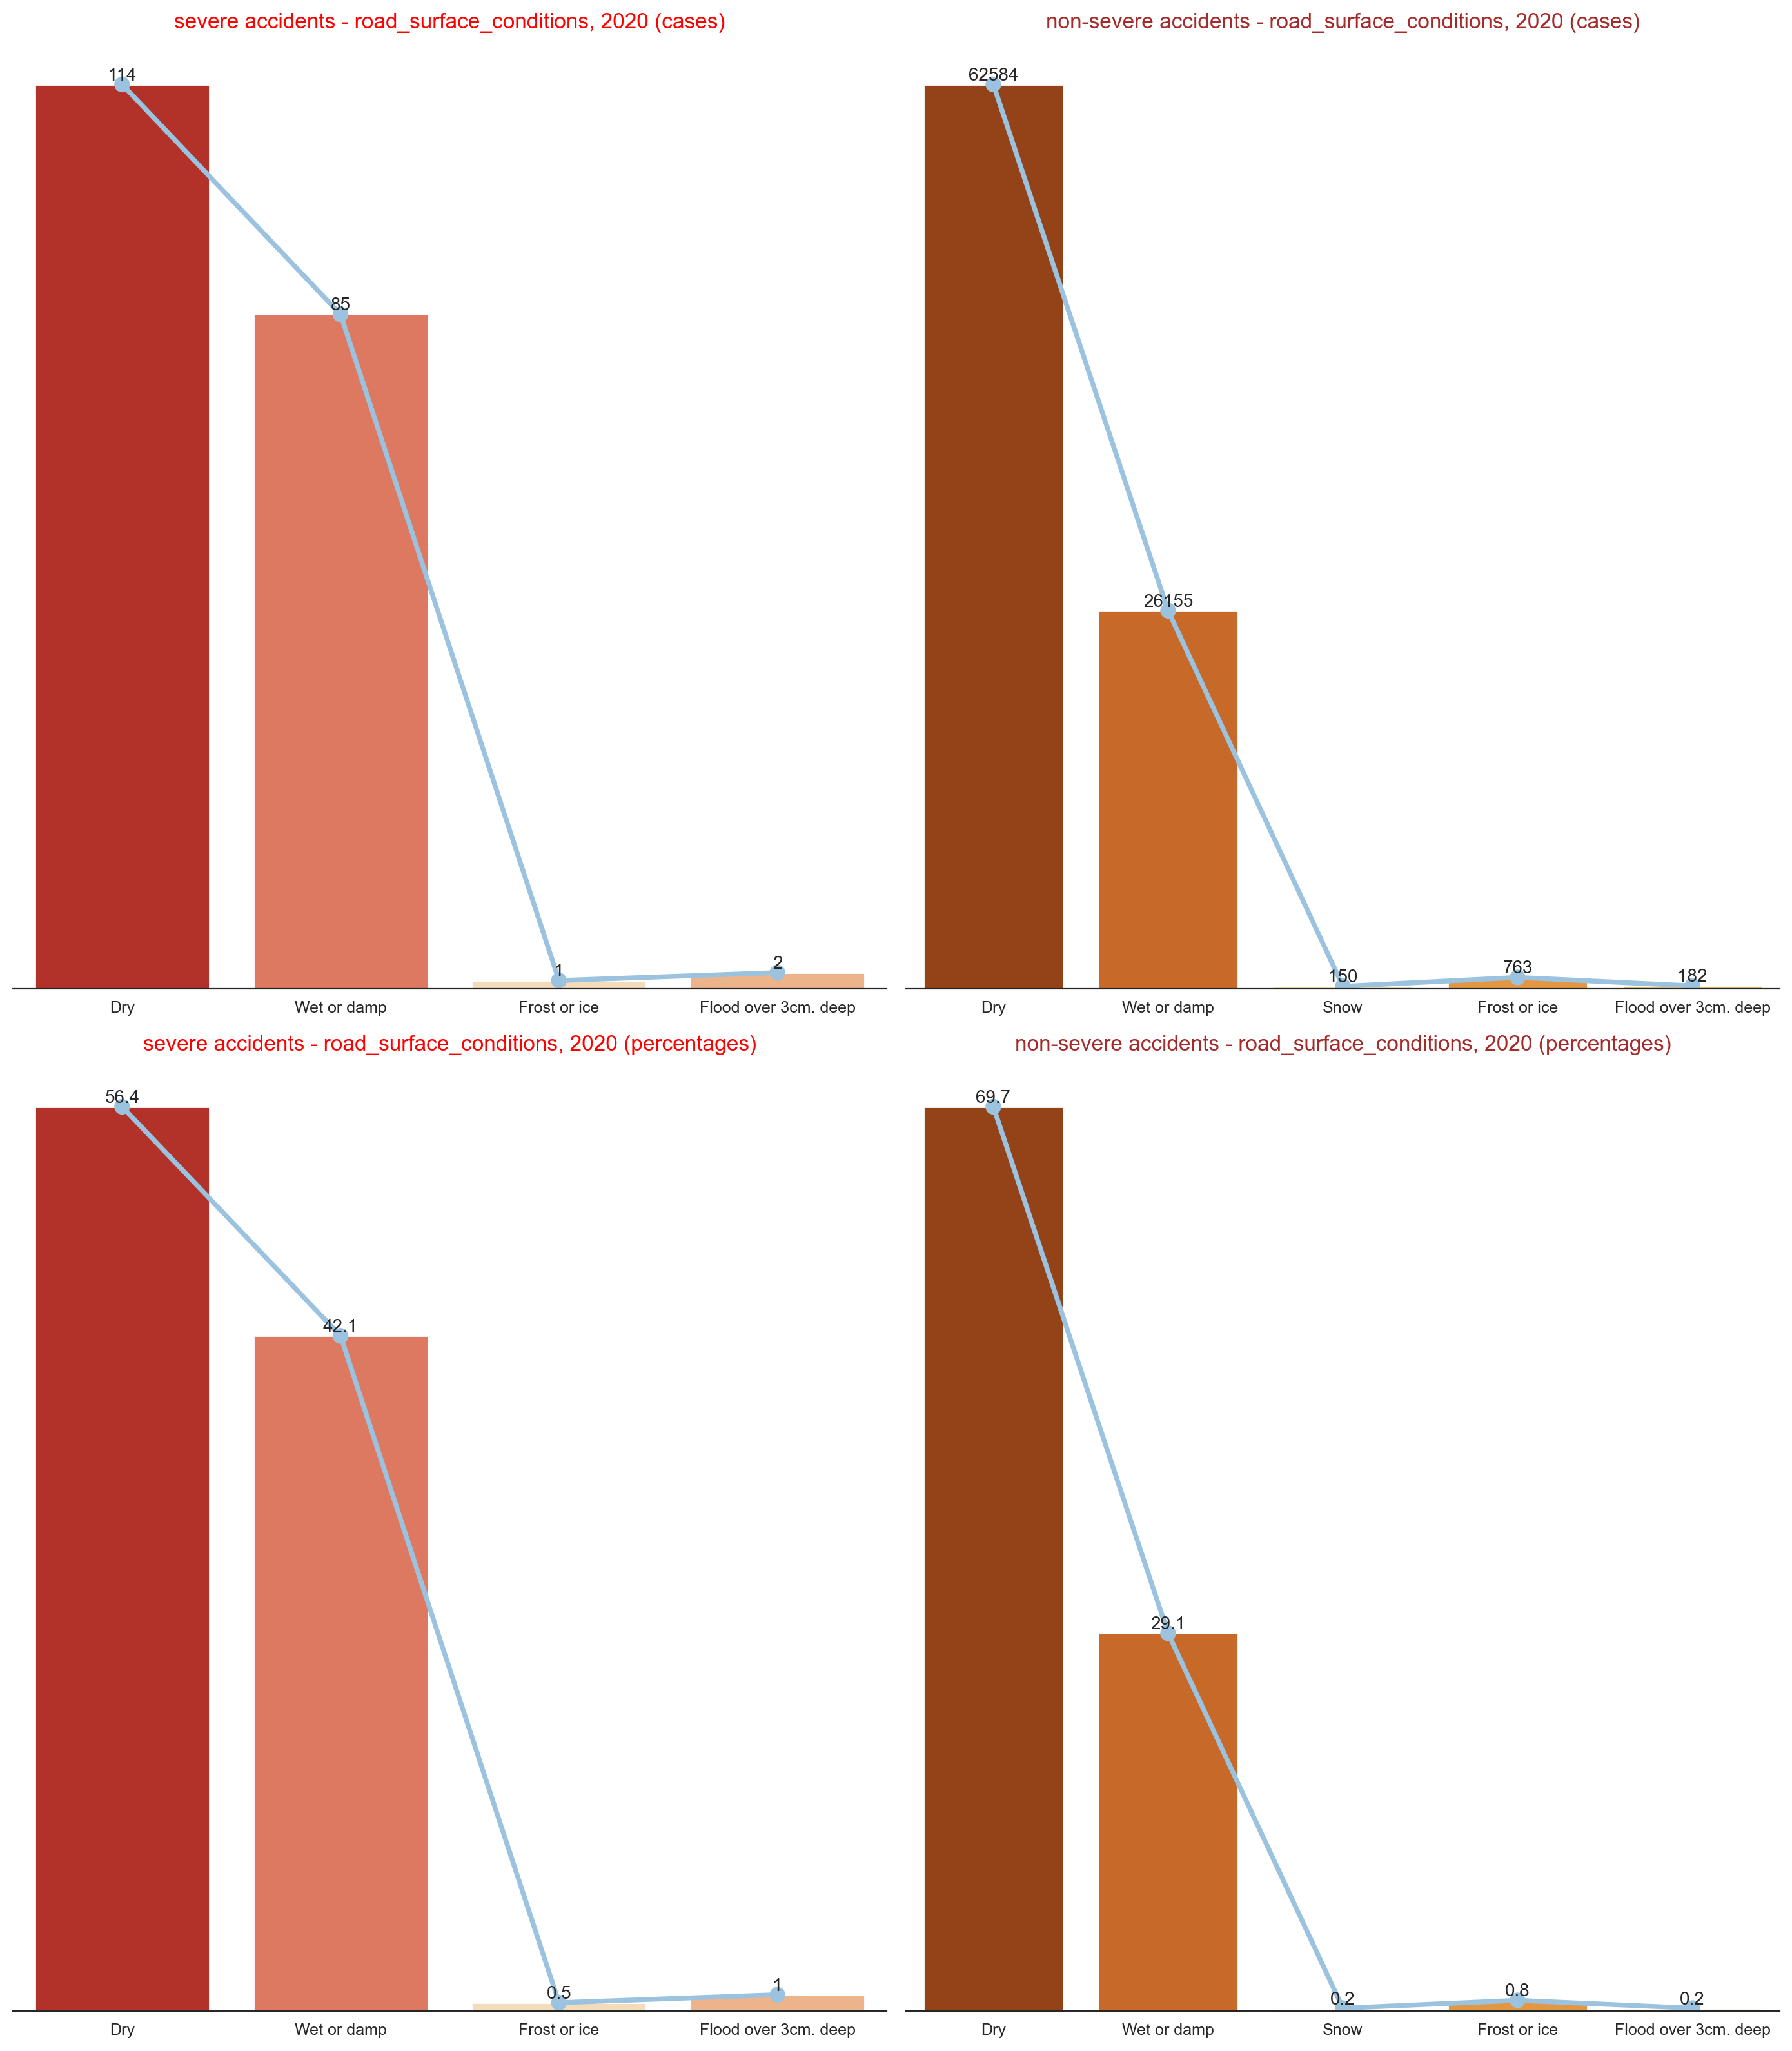

In [53]:
create_2_2("road_surface_conditions",
          use_lookup=True)

* we could say from the plots that wet or damp conditions increasing the probability to severe accident.

### carriageway hazards
***
[back](#Table-of-Contents)

In [54]:
col_data('carriageway_hazards')

table           field name code/format  \
115  Accident  carriageway_hazards           0   
116  Accident  carriageway_hazards           1   
117  Accident  carriageway_hazards           2   
118  Accident  carriageway_hazards           3   
119  Accident  carriageway_hazards           4   
120  Accident  carriageway_hazards           5   
121  Accident  carriageway_hazards           6   
122  Accident  carriageway_hazards           7   
123  Accident  carriageway_hazards          -1   
124  Accident  carriageway_hazards           9   

                                               label note  
115                                             None  NaN  
116                             Vehicle load on road  NaN  
117                             Other object on road  NaN  
118                                Previous accident  NaN  
119                                      Dog on road  NaN  
120                             Other animal on road  NaN  
121          Pedestrian in carriageway - not injured  NaN  
122  Any animal in carriageway (except ridden horse)  NaN  
123                     Data missing or out of range  NaN  
124                          unknown (self reported)  NaN

None

column values:


0     9     2    7    1   -1    6    3
carriageway_hazards  87881  1191  1079  314  220  208  155  151

* 4 and 5 are not in the table

In [55]:
a,b,c,d= filter_dfs('carriageway_hazards',[9,-1],[0,1,2,3,6,7])

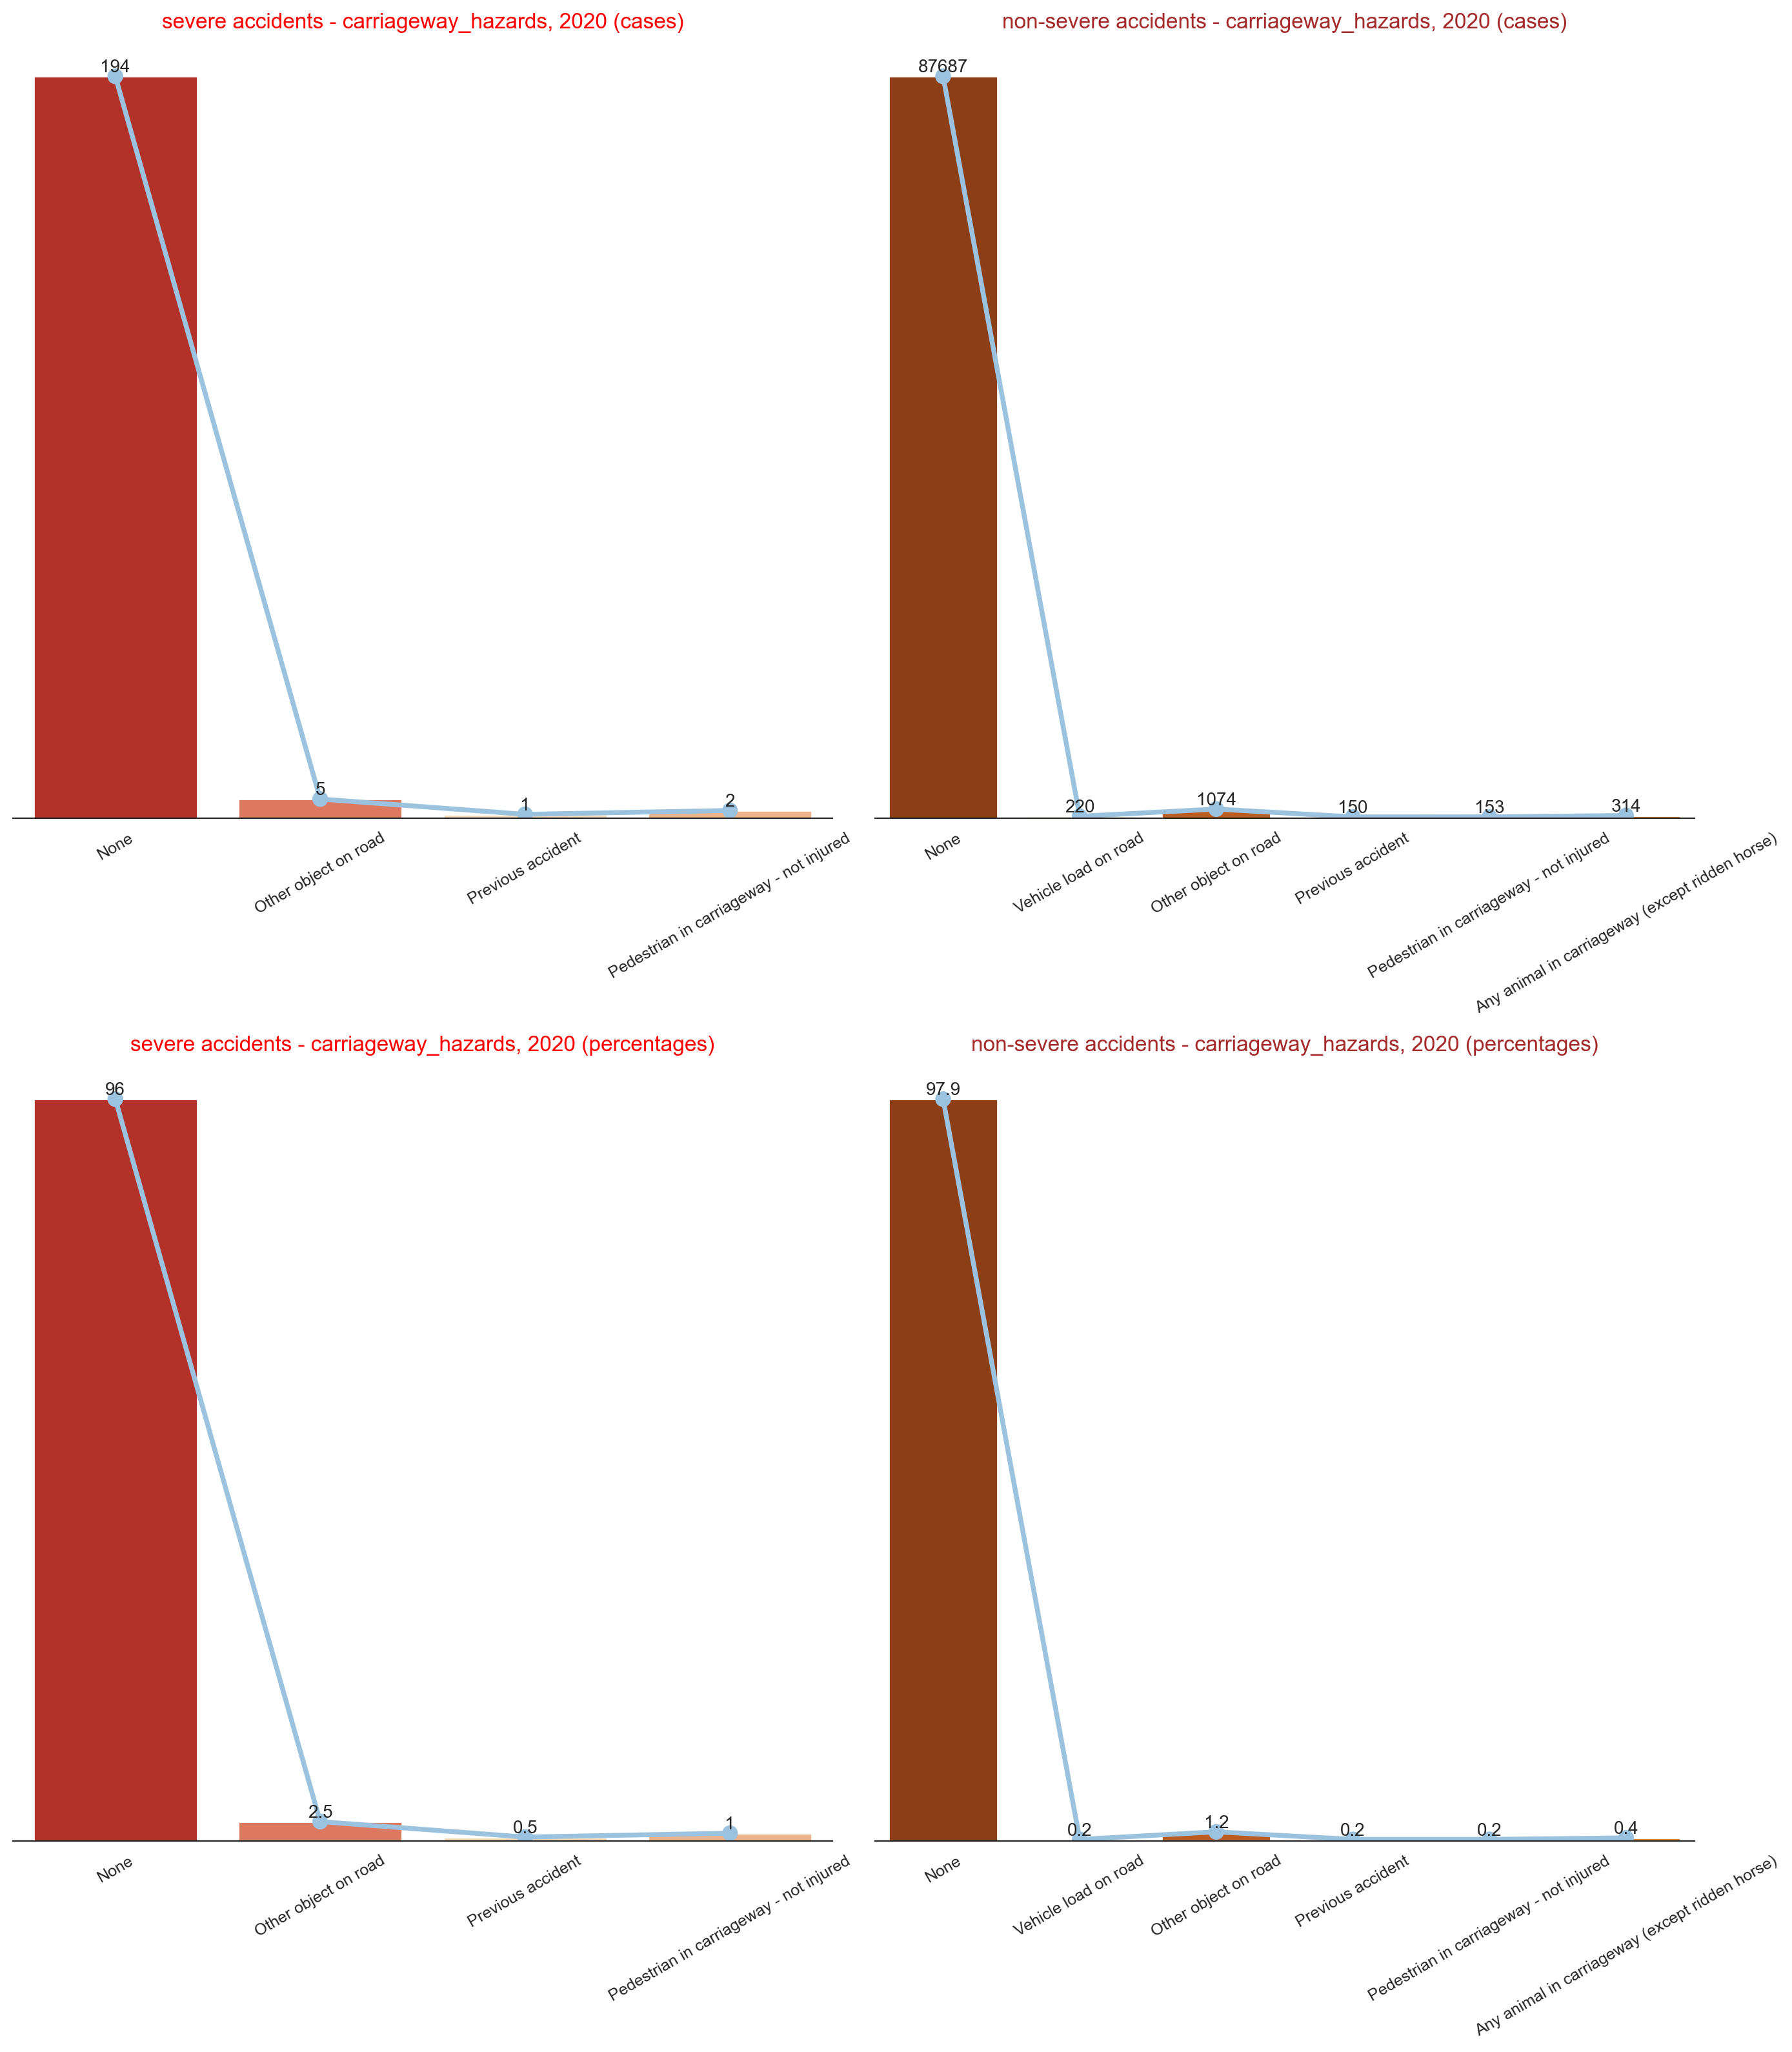

In [56]:
create_2_2('carriageway_hazards',
           use_lookup=True,rotate=30)

* carriageway hazards are increasing a little the probability to severe accident. but in the most of the accidents (severe and not) there are not carriageway hazards

### light conditions
***
[back](#Table-of-Contents)

In [57]:
col_data('light_conditions')

table        field name code/format                         label note
80  Accident  light_conditions           1                      Daylight  NaN
81  Accident  light_conditions           4         Darkness - lights lit  NaN
82  Accident  light_conditions           5       Darkness - lights unlit  NaN
83  Accident  light_conditions           6        Darkness - no lighting  NaN
84  Accident  light_conditions           7   Darkness - lighting unknown  NaN
85  Accident  light_conditions          -1  Data missing or out of range  NaN

None

column values:


1      4     6     7    5  -1
light_conditions  64458  19026  4835  2194  685   1

In [58]:
a,b,c,d= filter_dfs('light_conditions',[-1],[1,4,5,6,7])

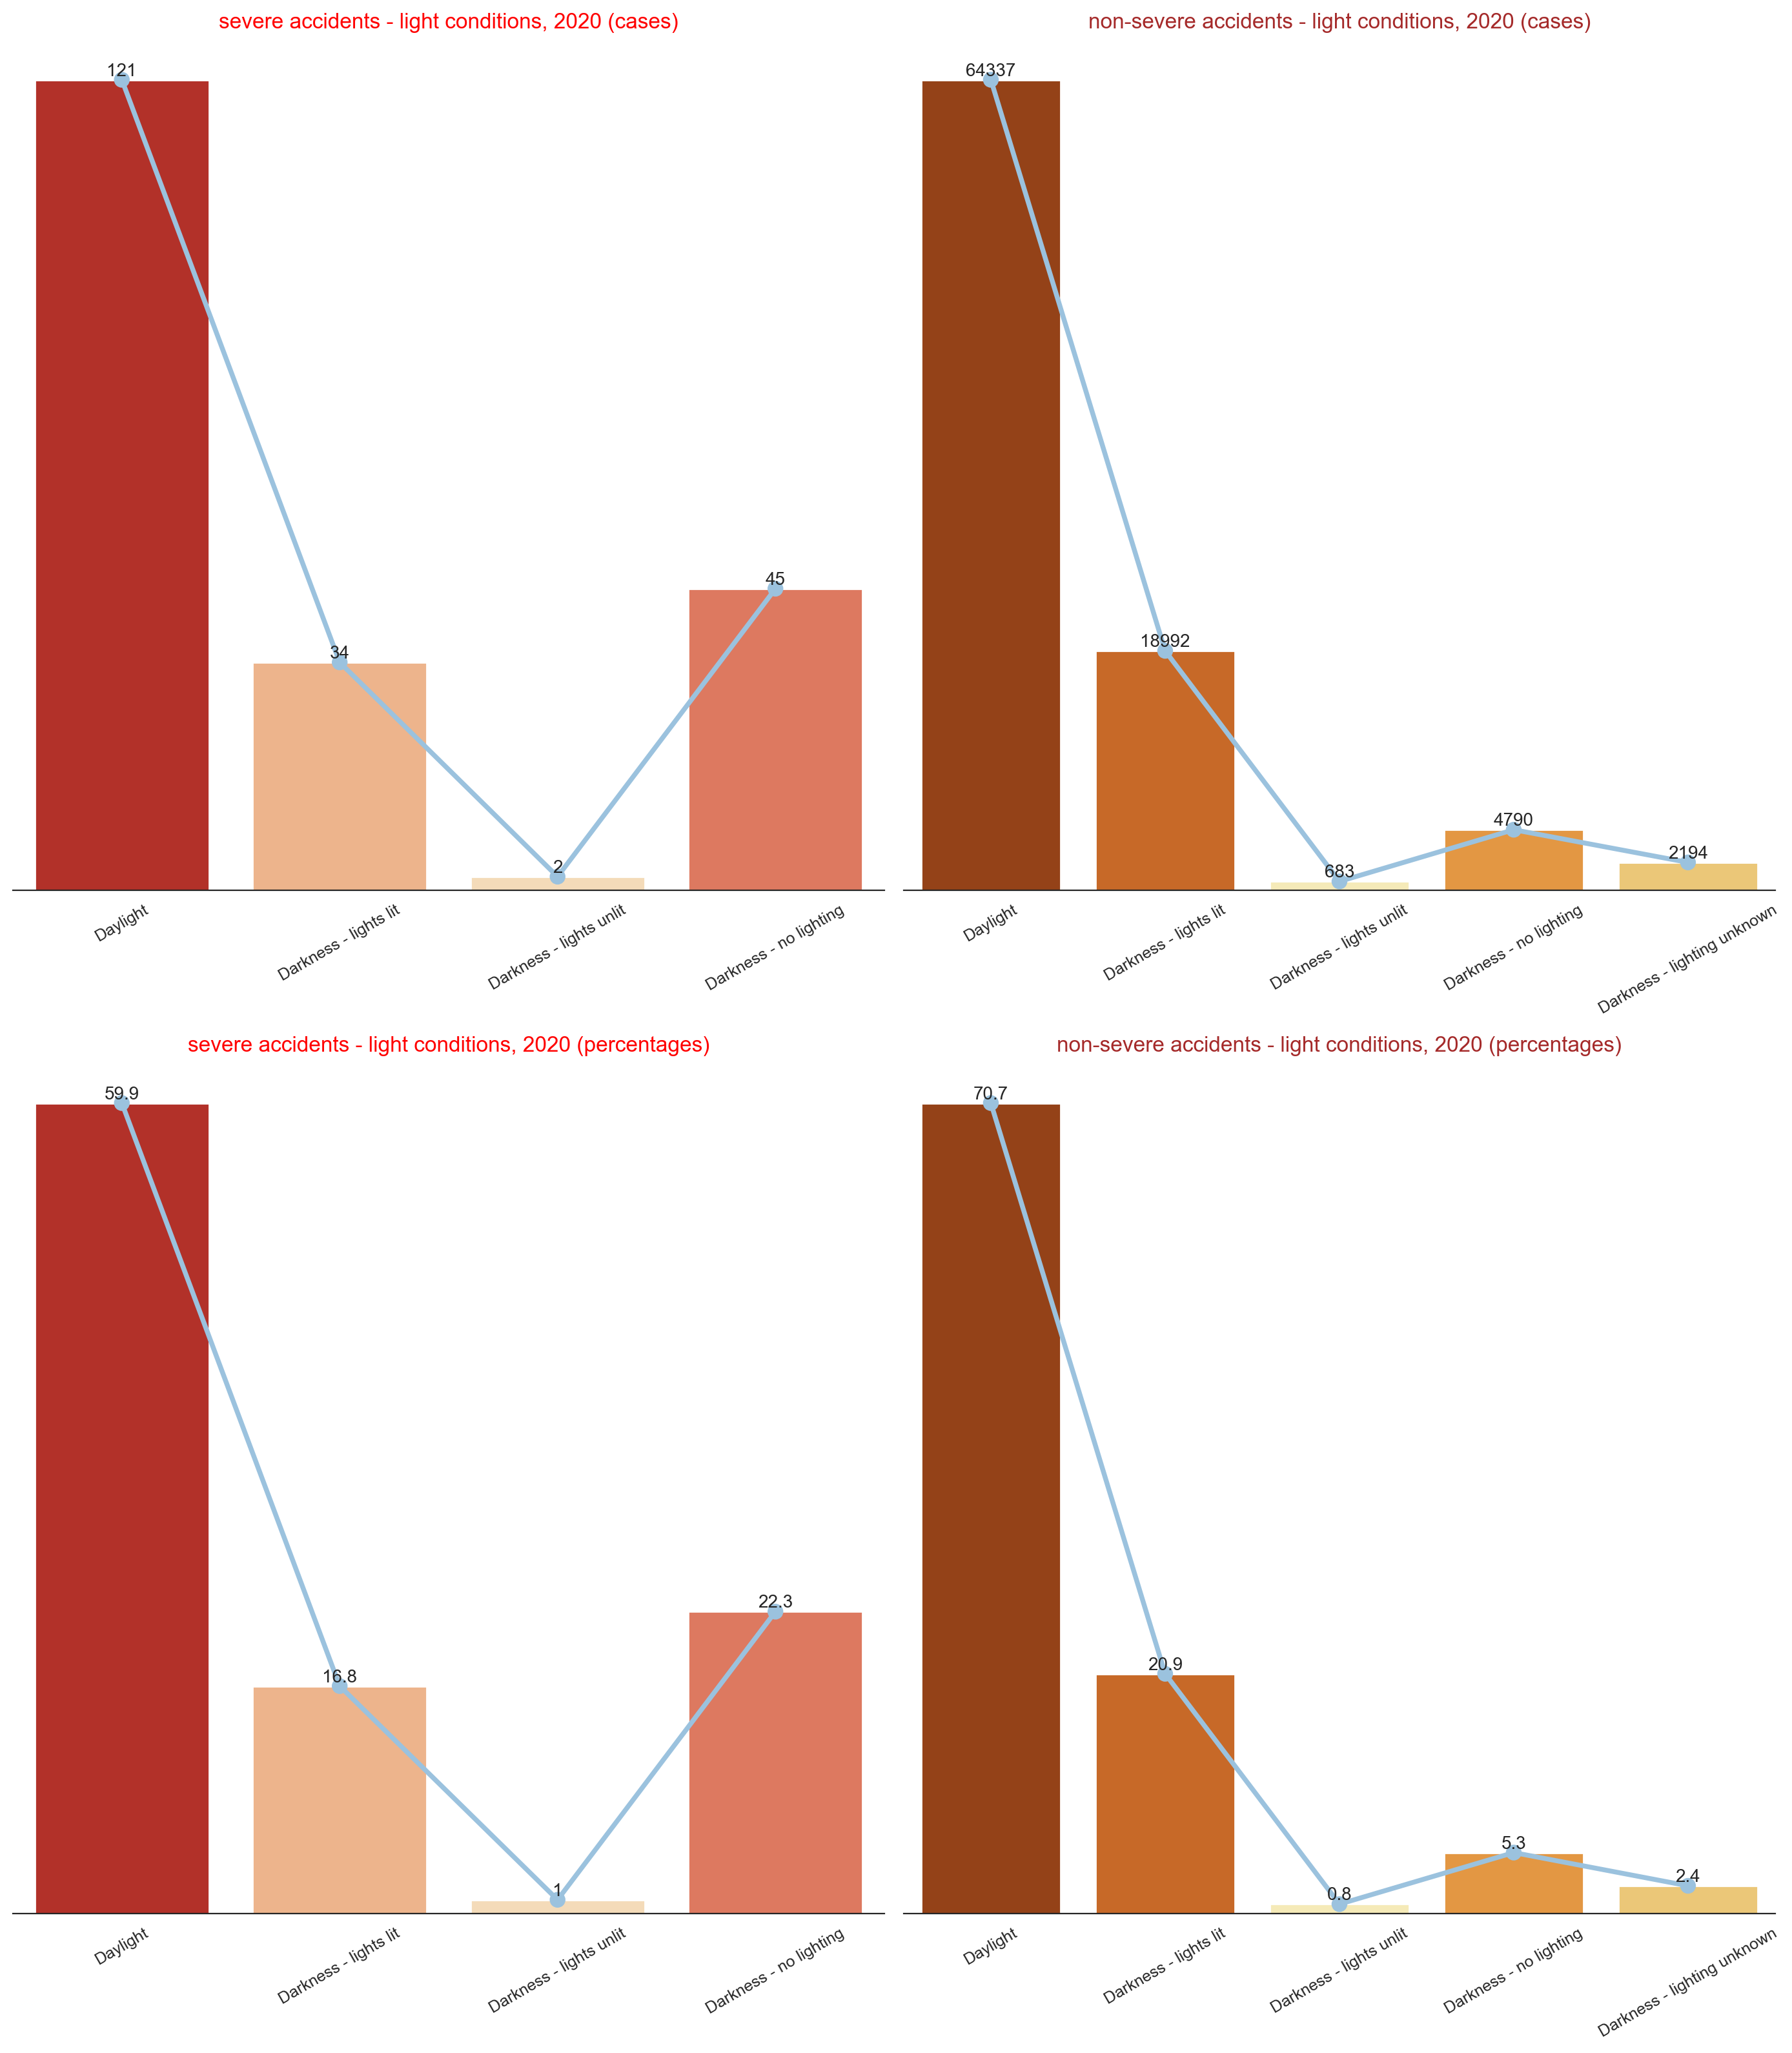

In [59]:
create_2_2('light conditions',
          use_lookup=True,rotate=30)

* in "darkness-no lighting" there are 17% more severe accidents than non severe!
* the contrary when there is lighting - there are more non severe than severe!
* the conclution: lighting makes big different !

### road type
***
[back](#Table-of-Contents)

In [60]:
col_data('road_type')

table field name code/format                         label note
28  Accident  road_type           1                    Roundabout  NaN
29  Accident  road_type           2                One way street  NaN
30  Accident  road_type           3              Dual carriageway  NaN
31  Accident  road_type           6            Single carriageway  NaN
32  Accident  road_type           7                     Slip road  NaN
33  Accident  road_type           9                       Unknown  NaN
34  Accident  road_type          12      One way street/Slip road  NaN
35  Accident  road_type          -1  Data missing or out of range  NaN

None

column values:


6      3     1     9     2     7
road_type  66929  13206  5580  2006  1966  1512

In [61]:
a,b,c,d= filter_dfs('road_type',[-1,9],[1,2,3,6,7])

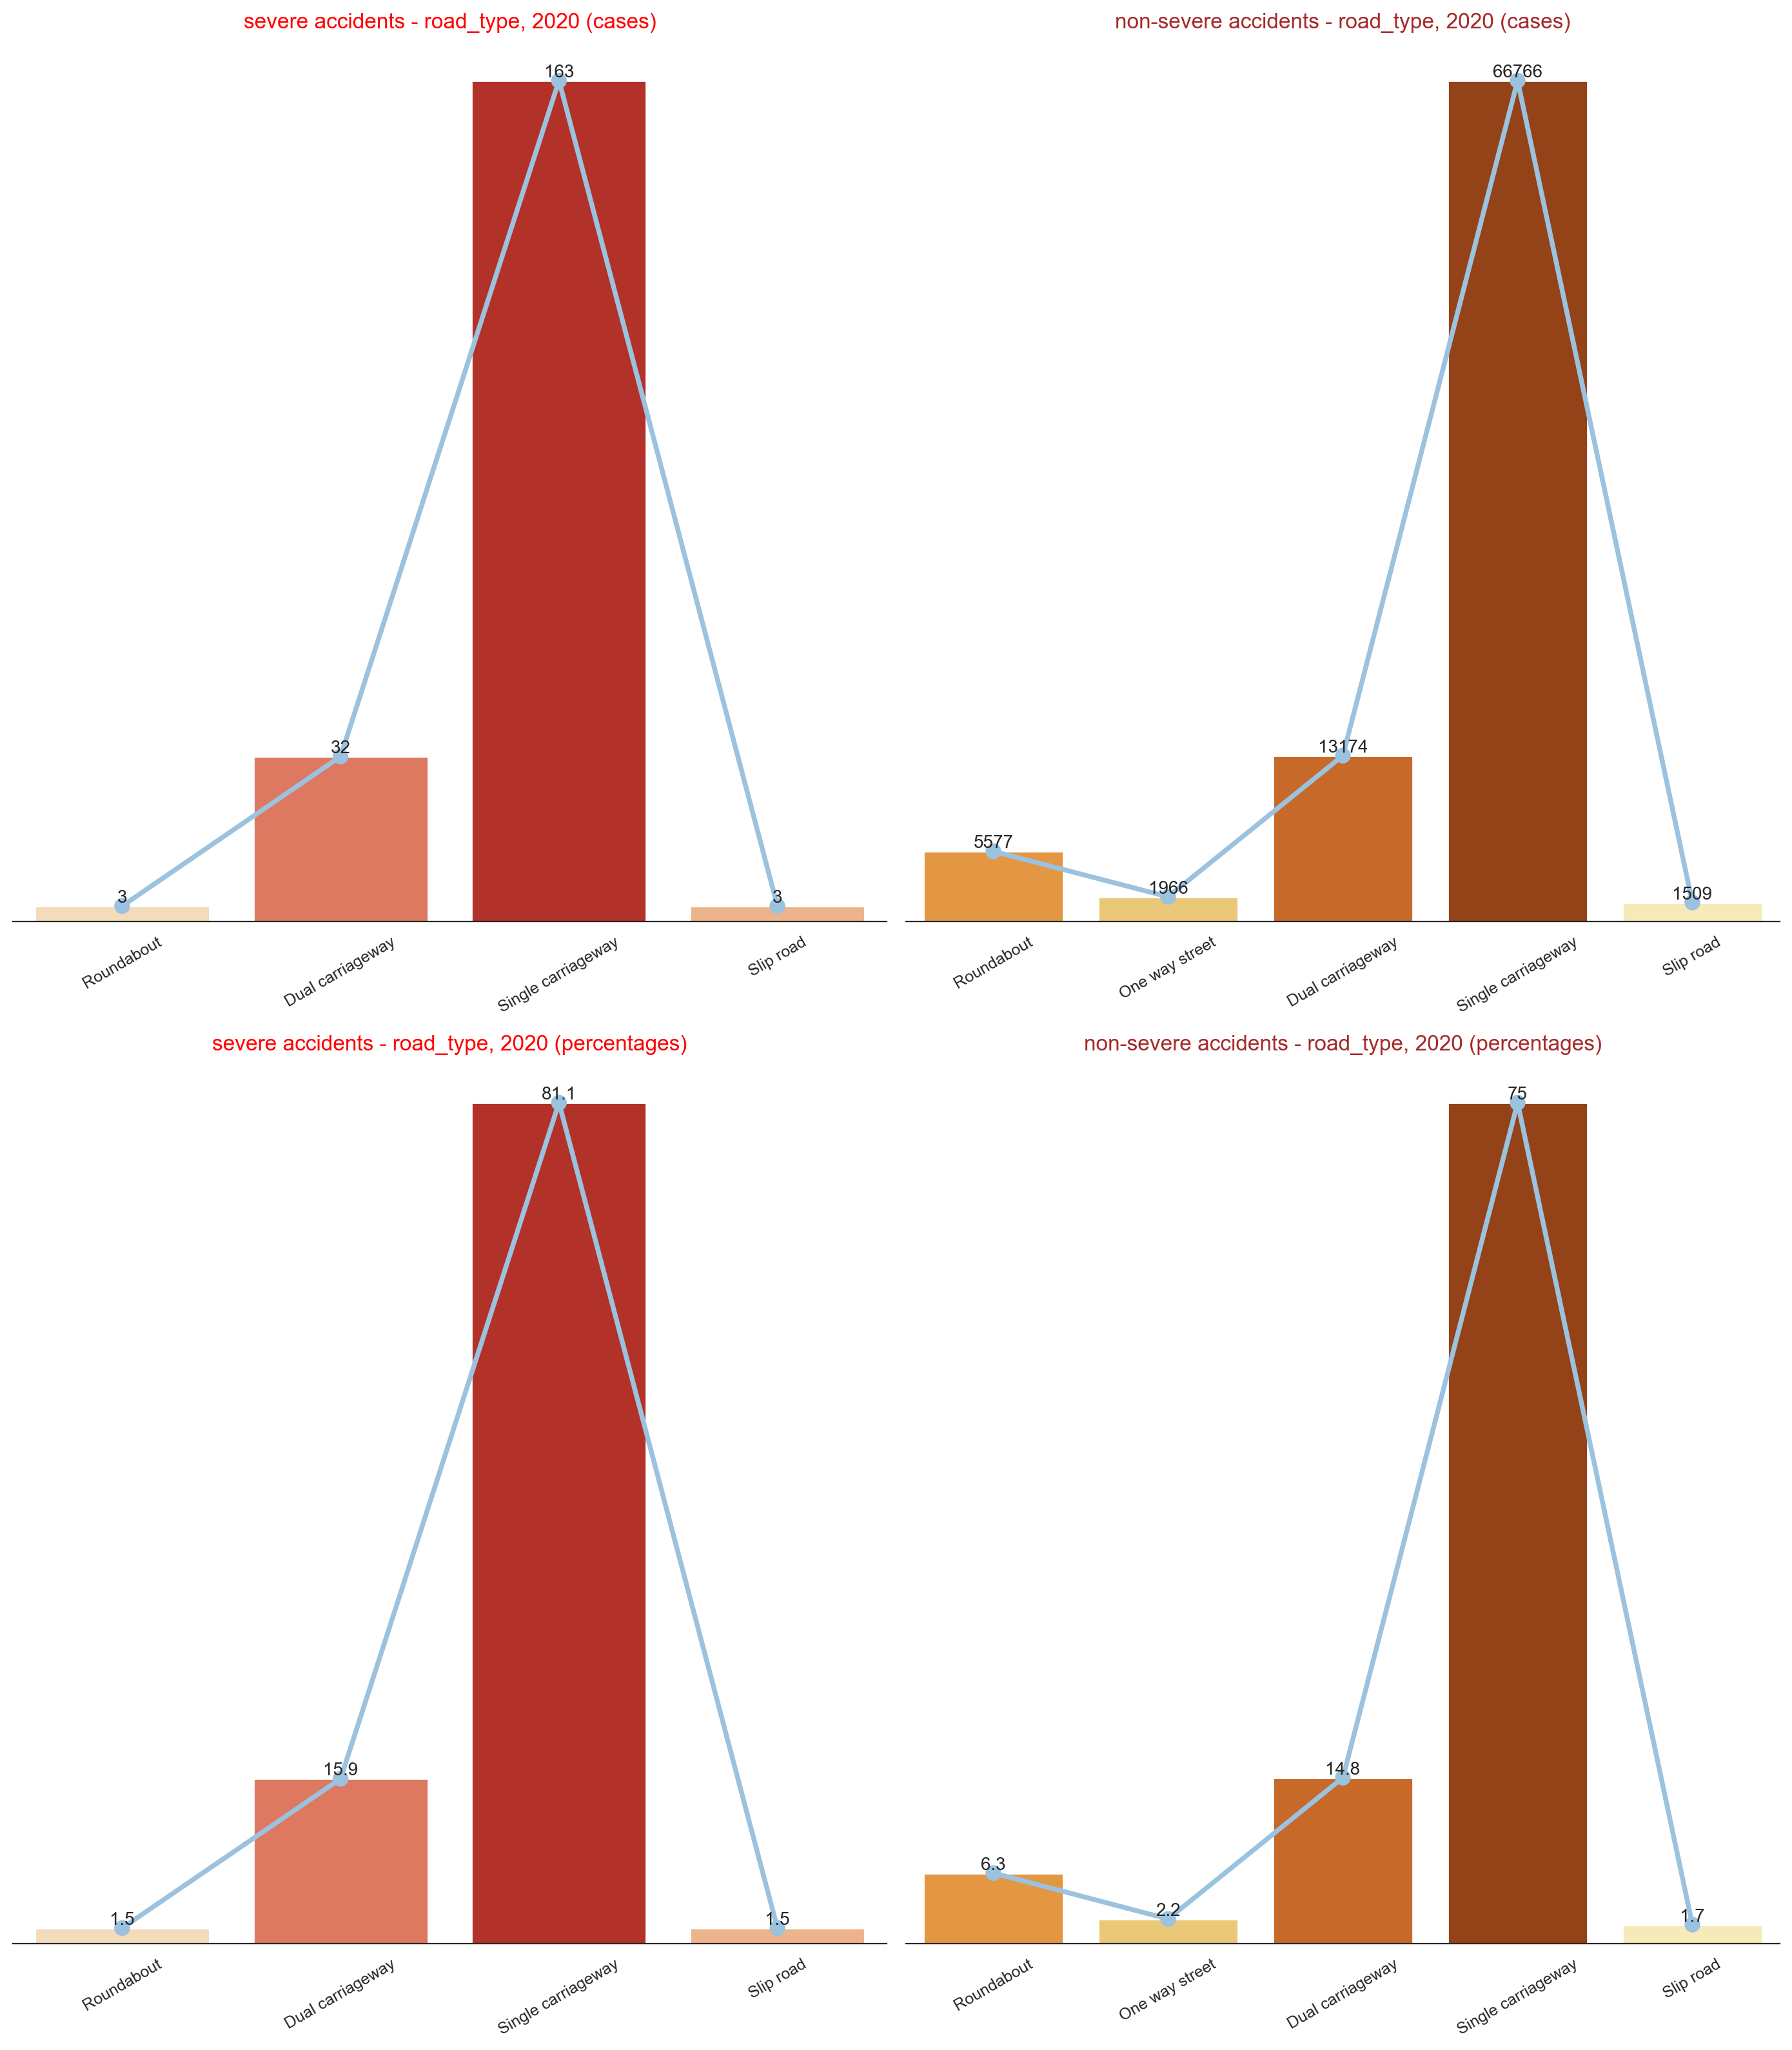

In [62]:
create_2_2('road_type',
           use_lookup=True,rotate=30)

* in a single carriageway there are more severe accidents.
* in roundabout there are less severe accidents (maybe because people slowdown there).

### pedestrian crossing human control
***
[back](#Table-of-Contents)

In [63]:
col_data('pedestrian_crossing_human_control')

table                         field name code/format  \
67  Accident  pedestrian_crossing_human_control           0   
68  Accident  pedestrian_crossing_human_control           1   
69  Accident  pedestrian_crossing_human_control           2   
70  Accident  pedestrian_crossing_human_control          -1   
71  Accident  pedestrian_crossing_human_control           9   

                                 label note  
67              None within 50 metres   NaN  
68   Control by school crossing patrol  NaN  
69  Control by other authorised person  NaN  
70        Data missing or out of range  NaN  
71             unknown (self reported)  NaN

None

column values:


0     9    2    1   -1
pedestrian_crossing_human_control  86358  3332  980  386  143

In [64]:
a,b,c,d= filter_dfs('pedestrian_crossing_human_control',[-1,9],[0,1,2])

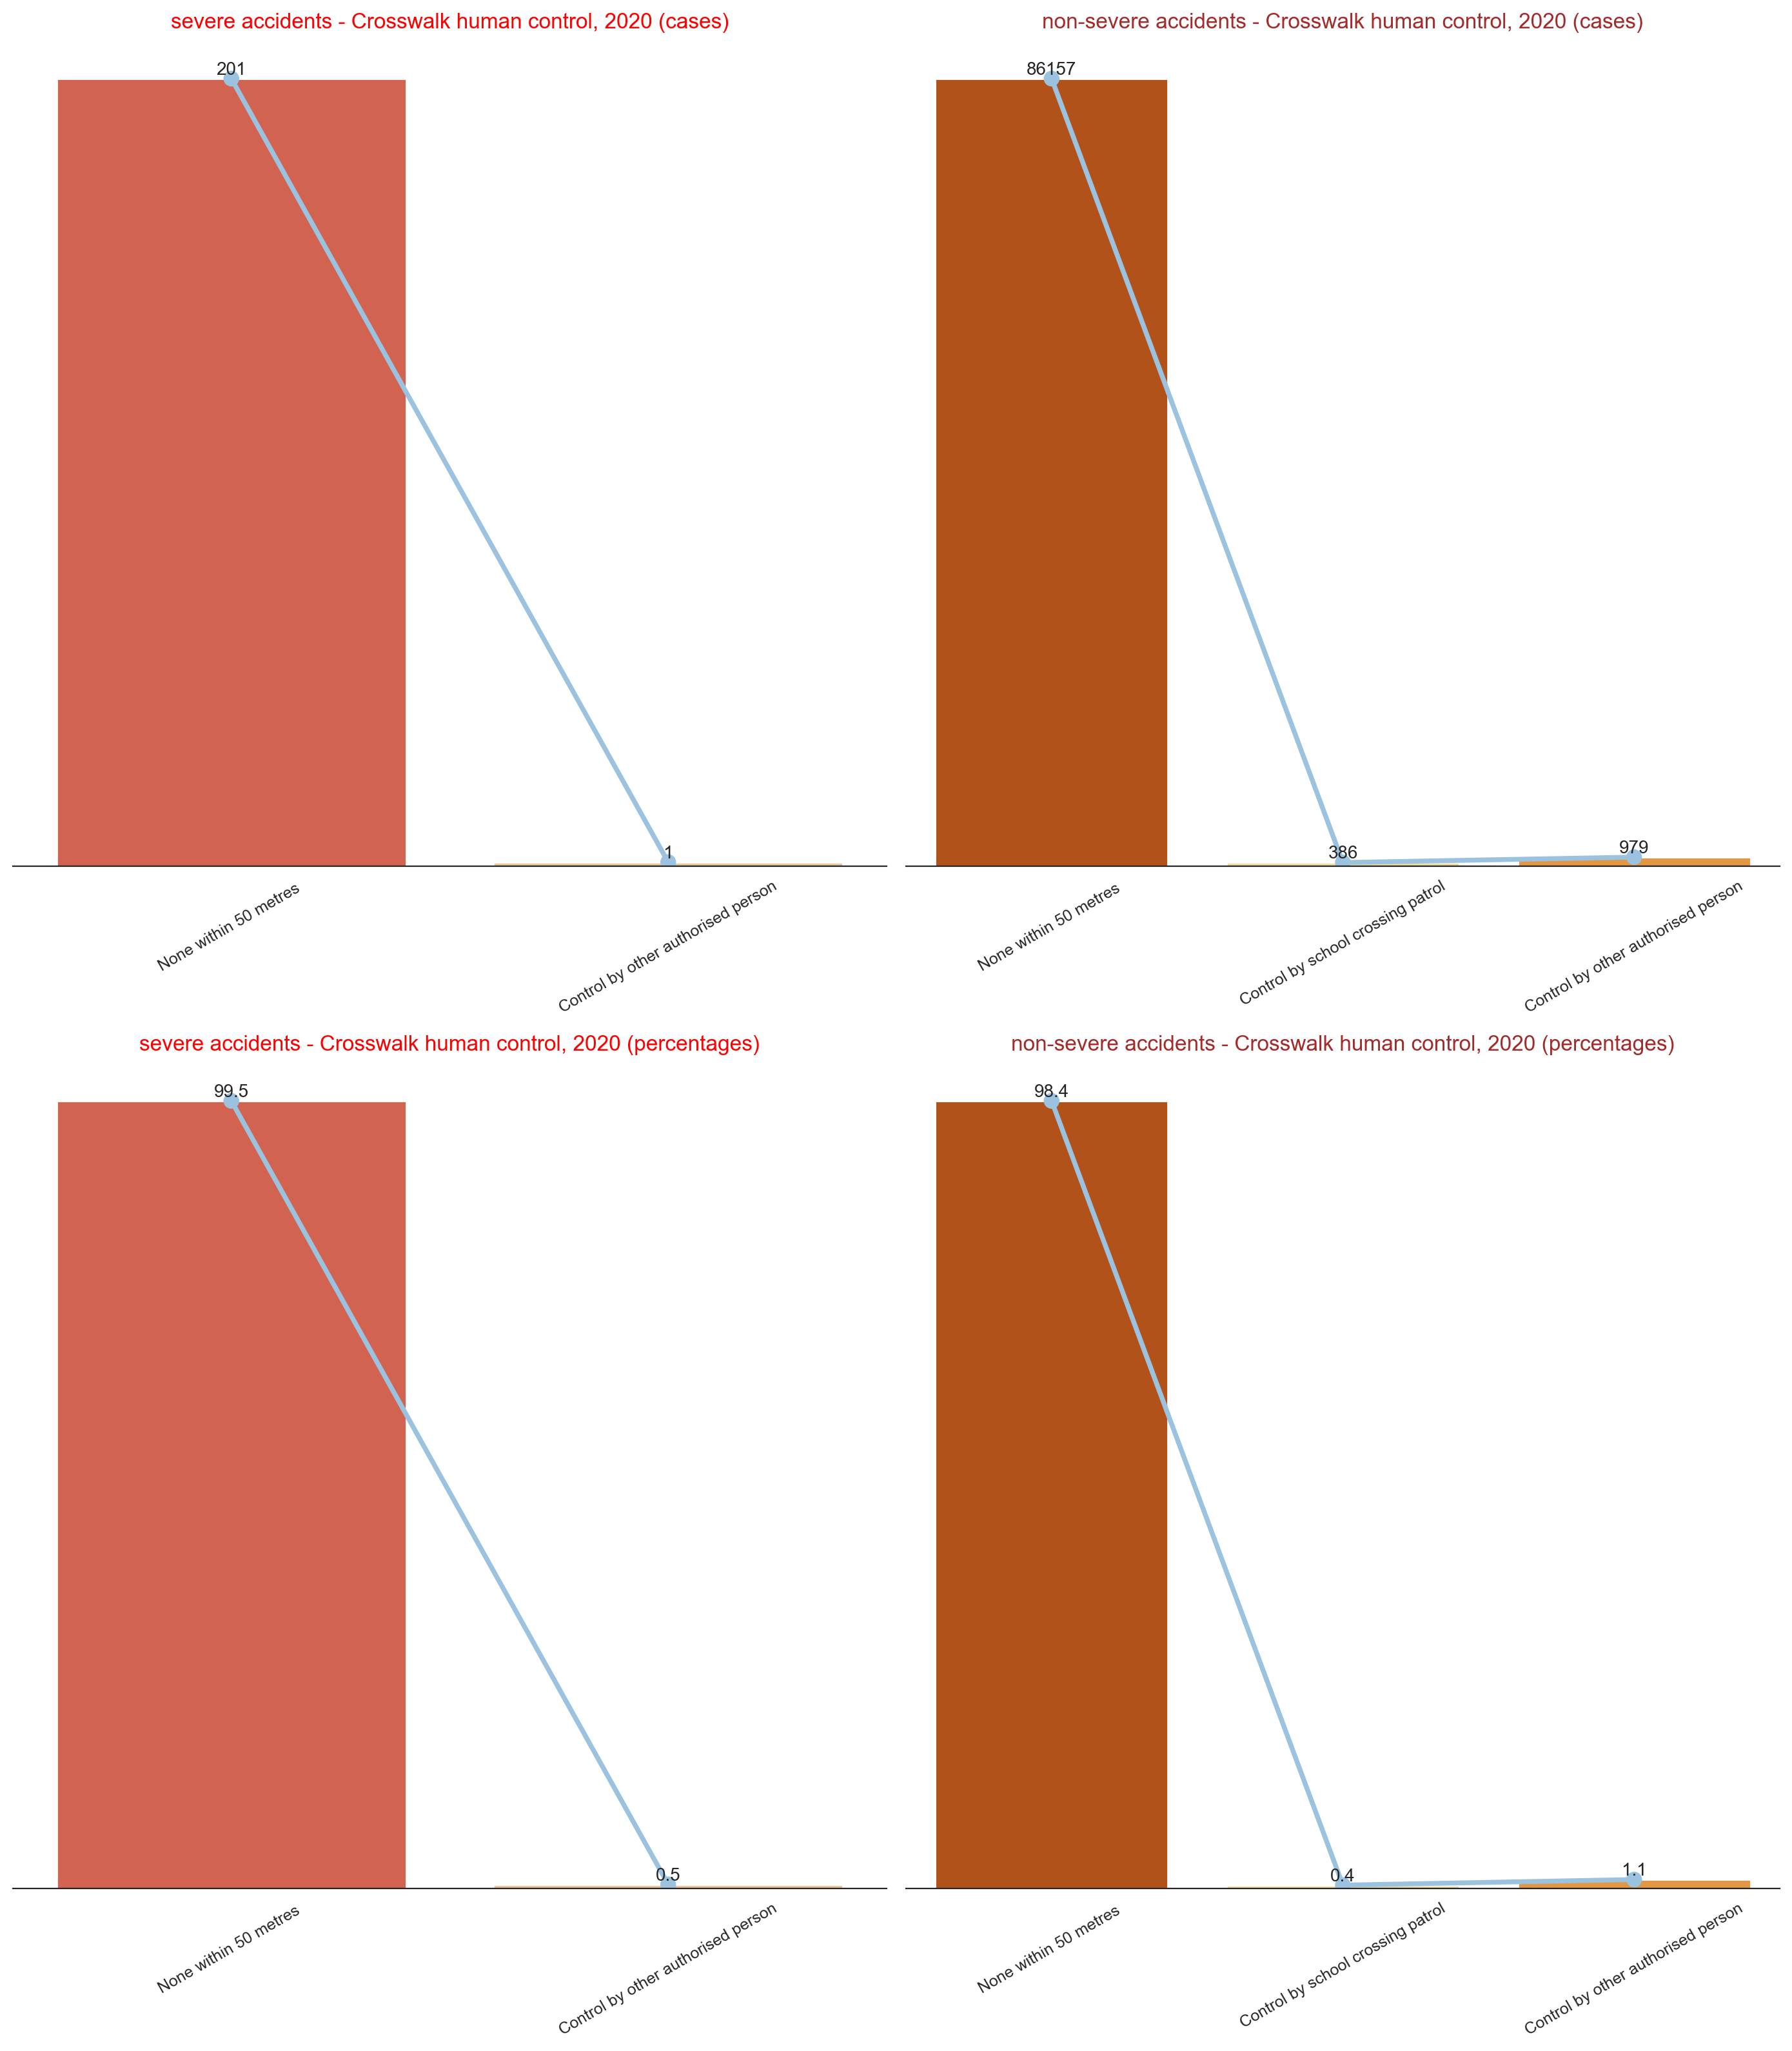

In [65]:
create_2_2('Crosswalk human control',
           use_lookup=True,rotate=30)

* i dont think that these differences are significant.

### pedestrian crossing physical facilities
***
[back](#Table-of-Contents)

In [66]:
col_data('pedestrian_crossing_physical_facilities')

table                               field name code/format  \
72  Accident  pedestrian_crossing_physical_facilities           0   
73  Accident  pedestrian_crossing_physical_facilities           1   
74  Accident  pedestrian_crossing_physical_facilities           4   
75  Accident  pedestrian_crossing_physical_facilities           5   
76  Accident  pedestrian_crossing_physical_facilities           7   
77  Accident  pedestrian_crossing_physical_facilities           8   
78  Accident  pedestrian_crossing_physical_facilities          -1   
79  Accident  pedestrian_crossing_physical_facilities           9   

                                                label note  
72   No physical crossing facilities within 50 metres  NaN  
73                                              Zebra  NaN  
74  Pelican, puffin, toucan or similar non-junctio...  NaN  
75        Pedestrian phase at traffic signal junction  NaN  
76                               Footbridge or subway  NaN  
77                                     Central refuge  NaN  
78                       Data missing or out of range  NaN  
79                            unknown (self reported)  NaN

None

column values:


0     5     4     1     9     8  \
pedestrian_crossing_physical_facilities  69269  7465  4903  3836  2932  2460   

                                           7   -1  
pedestrian_crossing_physical_facilities  199  135

In [67]:
a,b,c,d= filter_dfs('pedestrian_crossing_physical_facilities',[-1,9],[0,1,4,5,7,8,9])

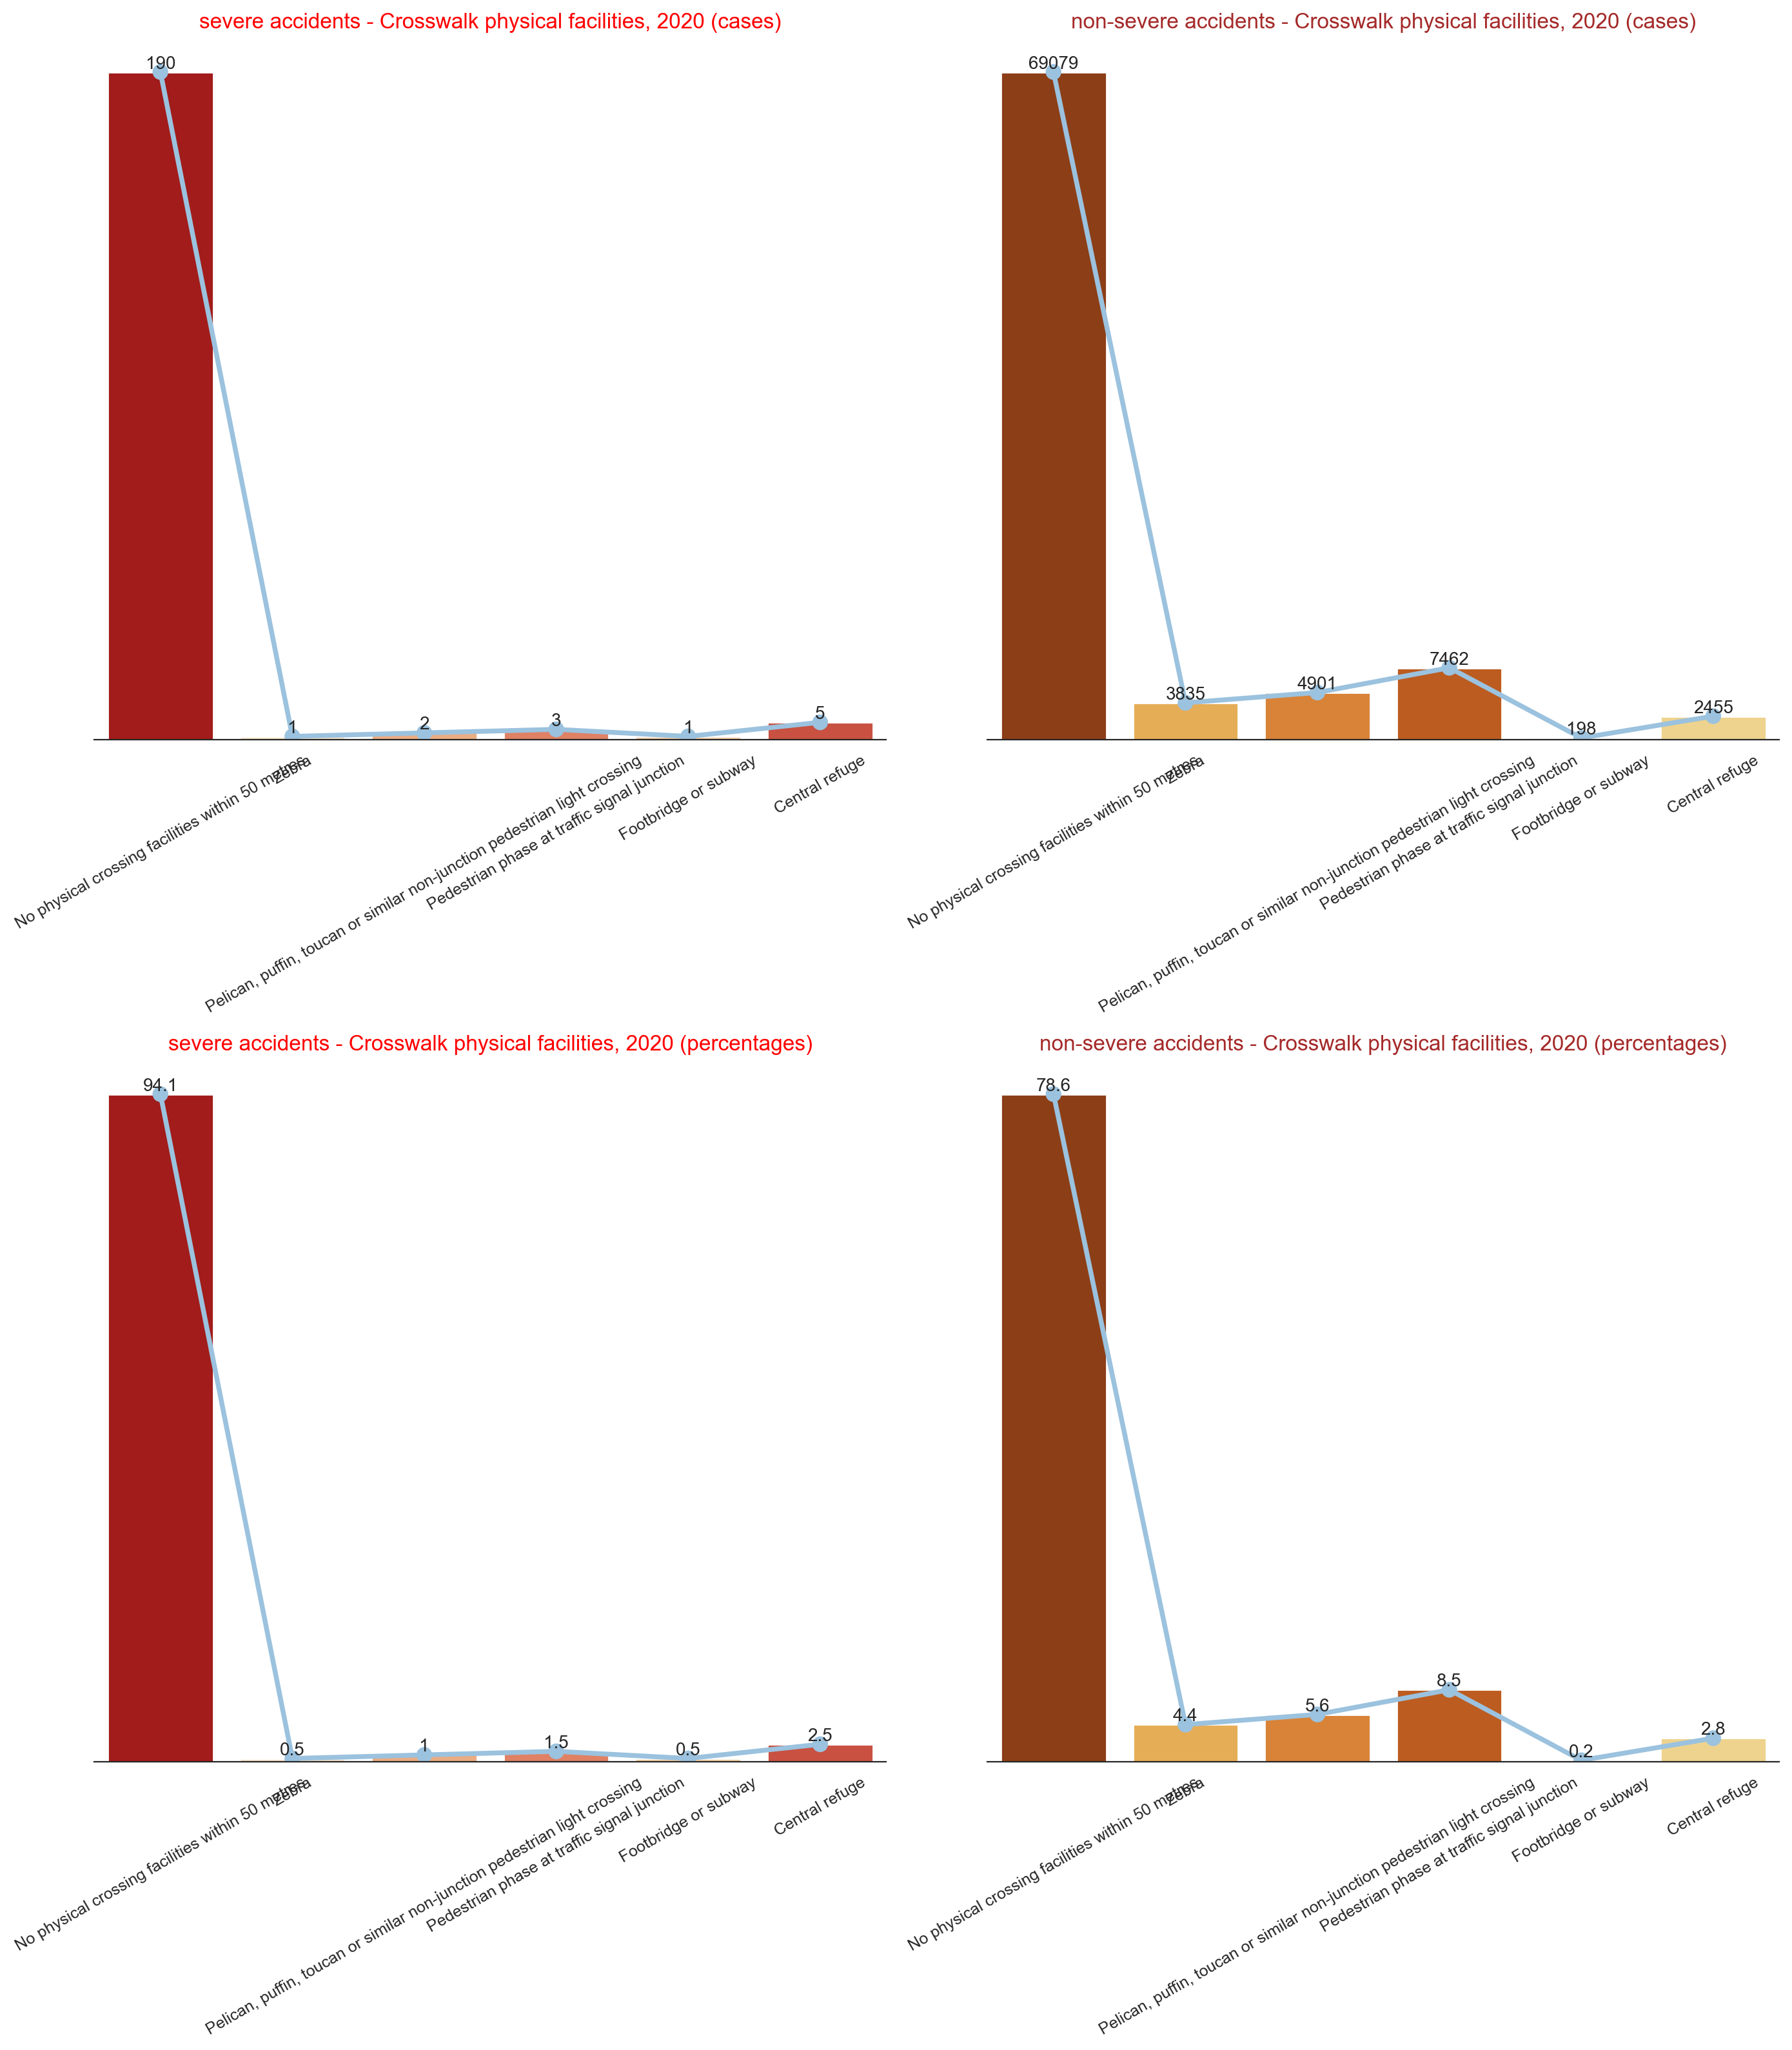

In [68]:
create_2_2('Crosswalk physical facilities',
           use_lookup=True,rotate=30)

* we could see that in the non severe distribution there are more facilities. maybe we could say that they reduce the severe accidents and make them non severe.
* but we should remember too that the most of the severe happend in rural areas, high speed highways, where there are less facilities.

### number of vehicles
***
[back](#Table-of-Contents)

In [69]:
col_data('number_of_vehicles')

table          field name code/format label note
8  Accident  number_of_vehicles         NaN   NaN  NaN

None

column values:


2      1     3     4    5   6   7   8   9   10  11  13  \
number_of_vehicles  57392  25730  6241  1334  331  99  47  15   3   3   2   1   

                    12  
number_of_vehicles   1

In [70]:
a,b,c,d= filter_dfs('number_of_vehicles',[],range(1,13))

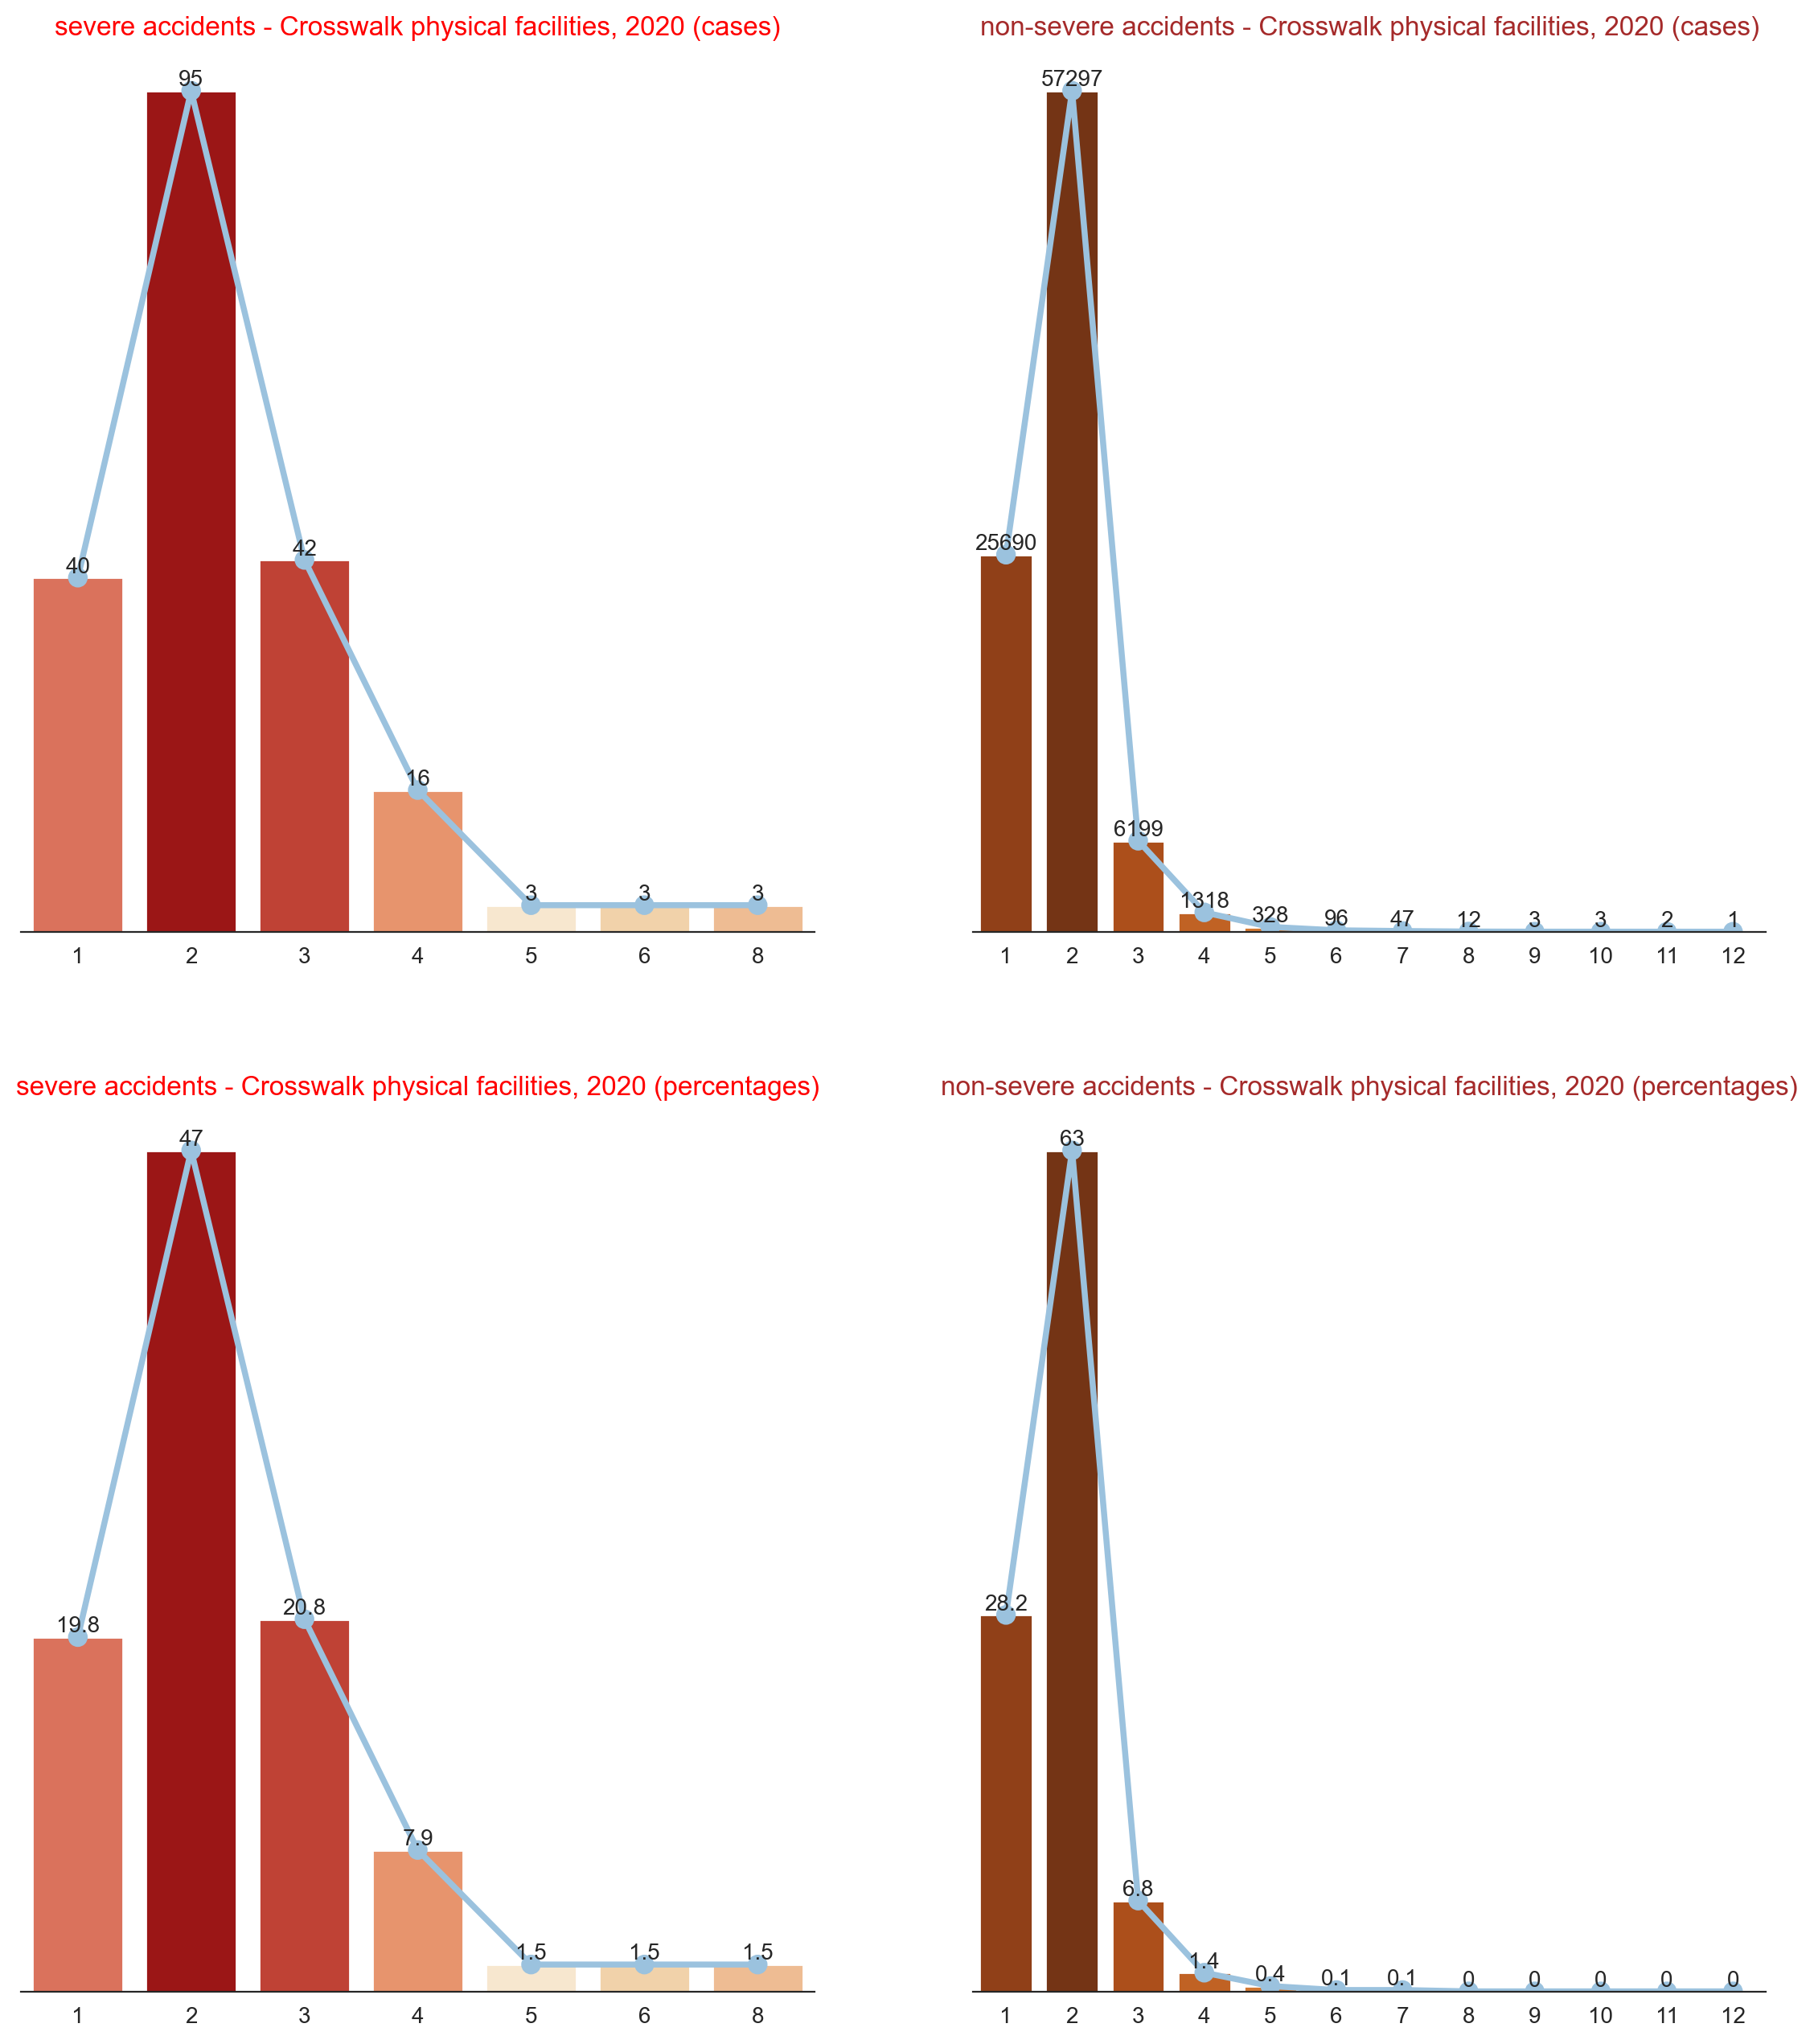

In [71]:
create_2_2('Crosswalk physical facilities',
           x_tick_labels=None)

* we could see clearly that the "severe" distribution is more right skewed.
* in severe accidents there is a decline to more vehicles to be envolve.

### road class
***
[back](#Table-of-Contents)

* to understand it, recommended to read <a href="https://en.wikipedia.org/wiki/Great_Britain_road_numbering_scheme">here </a>.
* "The Great Britain road numbering scheme is a numbering scheme used to classify and identify all roads in Great Britain. Each road is given a single letter, which represents the road's category, and a subsequent number, of 1 to 4 digits. "

* motorway - "A controlled-access highway is a type of highway that has been designed for high-speed vehicular traffic, with all traffic flow—ingress and egress—regulated. Common English terms are freeway,motorway and expressway."
* A(M) - "Some sections of A roads have been improved to the same standard as motorways, but do not completely replace the existing road; they form a higher standard part of the route for those which are not excluded. These sections retain the same number but are suffixed with (M), for example the A1(M) and A404(M)"
* A - "In England and Wales, the six single-digit numbers reflect the traditionally most important radial routes coming out of London. Starting with the A1 which heads due north, numbers were allocated sequentially in a clockwise direction" ..."These radials are supplemented by two-digit codes  For example, the A10 (London to King's Lynn) is the first main route clockwise from the A1, the A11 (London to Norwich) is the next, then the A12 (London to Great Yarmouth) and the A13 (London to Shoeburyness); the next radial is the A2, followed by the A20 (London to Dover), and so on".
* B - B roads are numbered distributor roads, which have lower traffic densities than the main trunk roads, or A roads. 
* C -  Roads and lanes with yet lower traffic densities are designated as unclassified roads commonly using C, D and U prefixes.


In [72]:
col_data('first_road_class')

table        field name code/format         label note
19  Accident  first_road_class           1      Motorway  NaN
20  Accident  first_road_class           2          A(M)  NaN
21  Accident  first_road_class           3             A  NaN
22  Accident  first_road_class           4             B  NaN
23  Accident  first_road_class           5             C  NaN
24  Accident  first_road_class           6  Unclassified  NaN

None

column values:


3      6      4     5     1    2
first_road_class  40604  31709  11490  4815  2374  207

In [73]:
a,b,c,d= filter_dfs('first_road_class',[6],range(1,6))

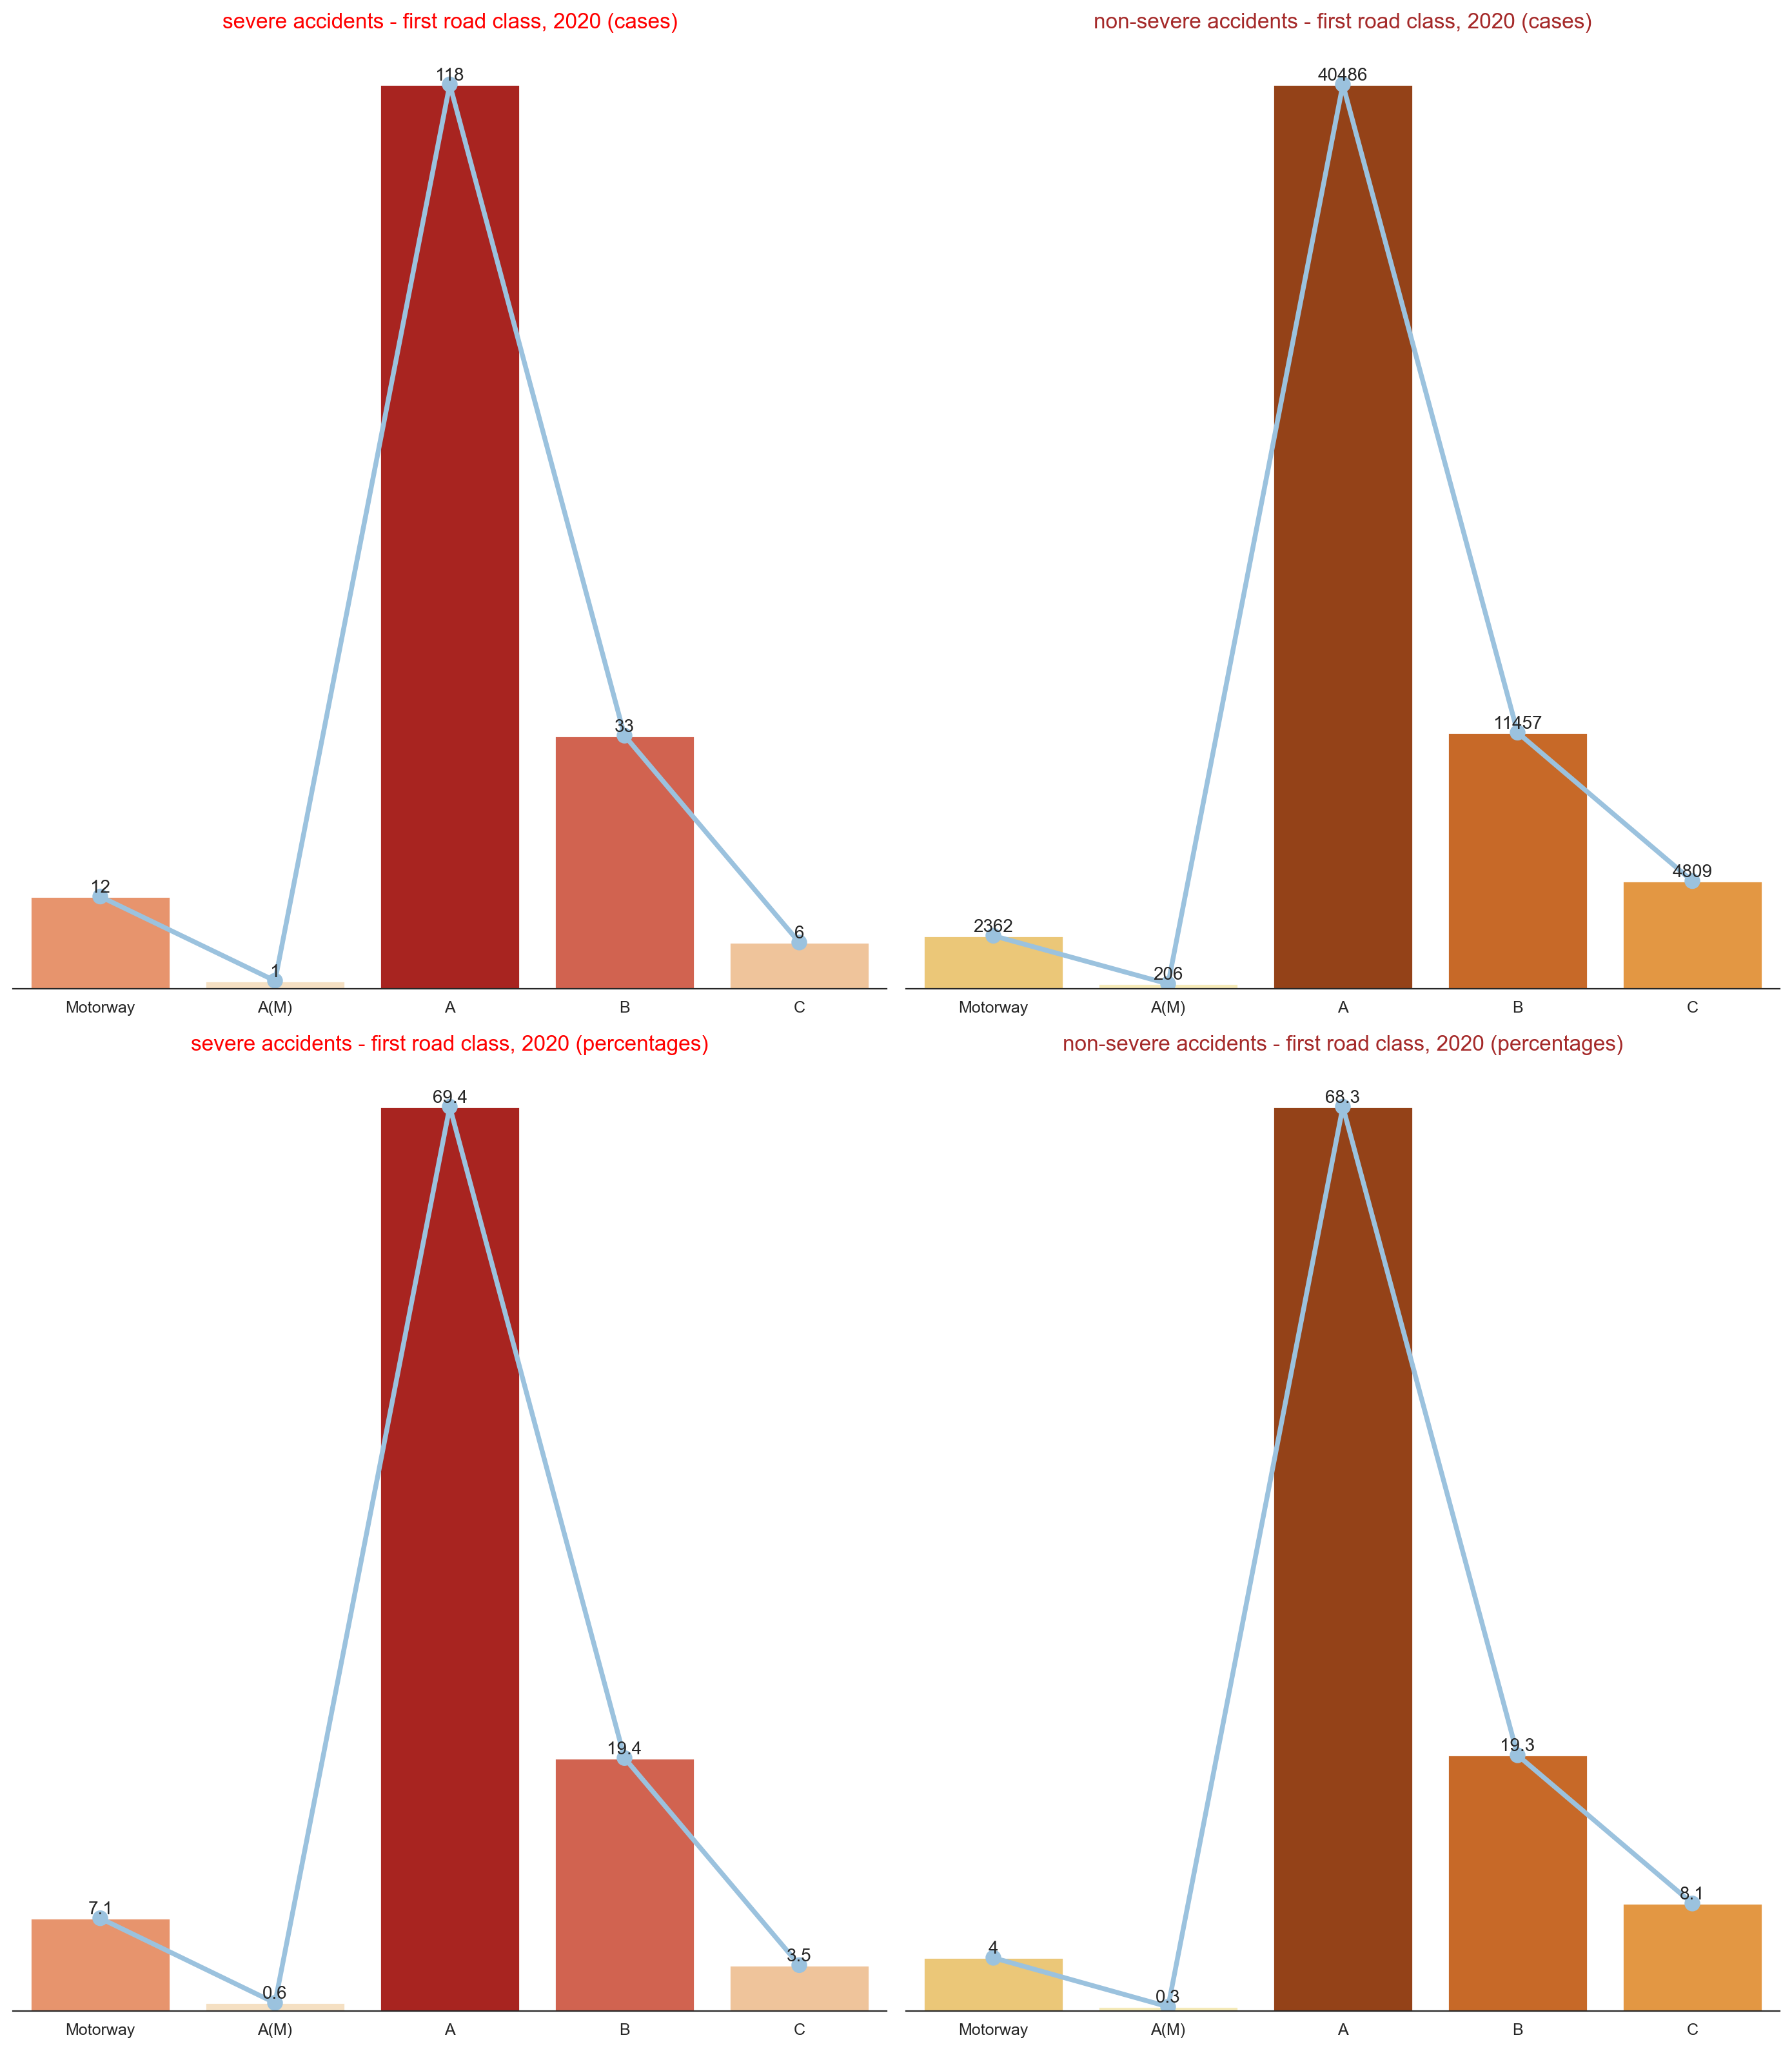

In [74]:
create_2_2('first road class',use_lookup=True)

* more severe in motorways, less severe in C.

### junction
***
[back](#Table-of-Contents)

In [75]:
col_data('junction_detail')

table       field name code/format  \
39  Accident  junction_detail           0   
40  Accident  junction_detail           1   
41  Accident  junction_detail           2   
42  Accident  junction_detail           3   
43  Accident  junction_detail           5   
44  Accident  junction_detail           6   
45  Accident  junction_detail           7   
46  Accident  junction_detail           8   
47  Accident  junction_detail           9   
48  Accident  junction_detail          99   
49  Accident  junction_detail          -1   

                                  label note  
39  Not at junction or within 20 metres  NaN  
40                           Roundabout  NaN  
41                      Mini-roundabout  NaN  
42              T or staggered junction  NaN  
43                            Slip road  NaN  
44                           Crossroads  NaN  
45    More than 4 arms (not roundabout)  NaN  
46            Private drive or entrance  NaN  
47                       Other junction  NaN  
48              unknown (self reported)  NaN  
49         Data missing or out of range  NaN

None

column values:


0      3     6     1     9     8     99    2     7     5   \
junction_detail  37978  25626  8429  7326  4705  1887  1508  1300  1279  1159   

                 -1   
junction_detail    2

In [76]:
a,b,c,d= filter_dfs('junction_detail',[9,99,-1],range(0,9))

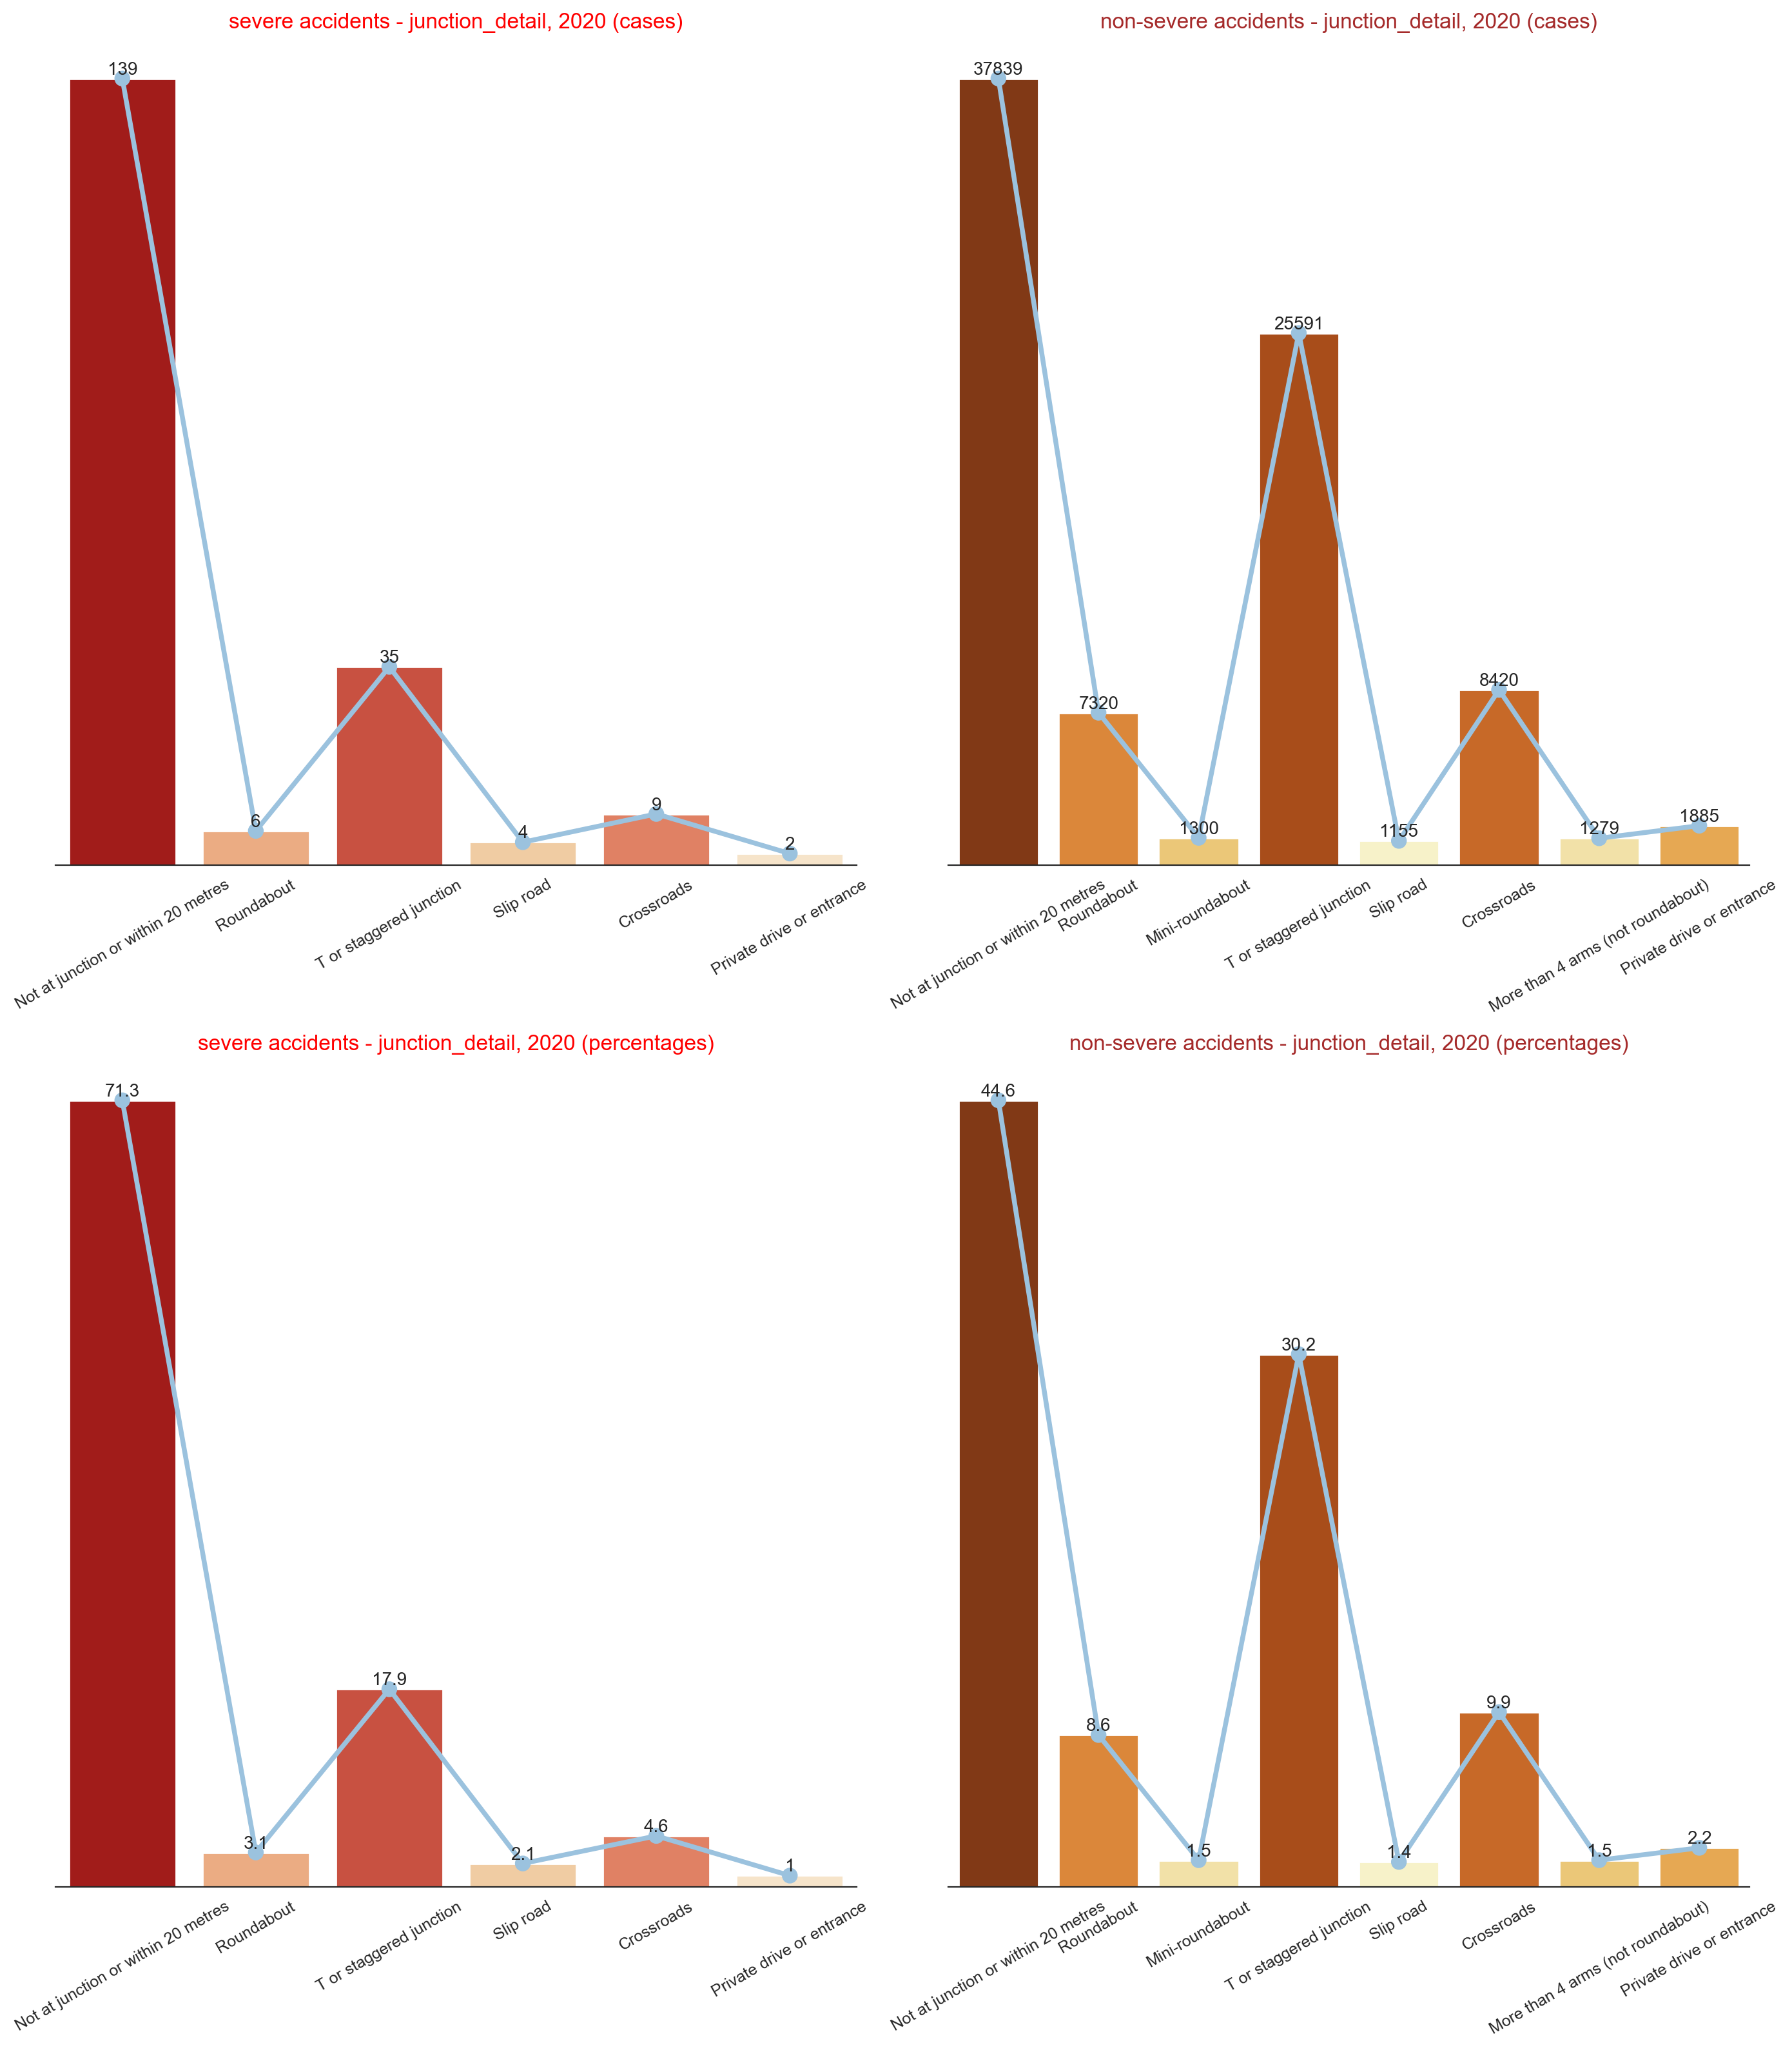

In [77]:
create_2_2('junction_detail',use_lookup=True,rotate=30,figsize=(12,30))

* more severe where there isnt a junction.
* it's reinforces our assumptions that severe are correlated to high speed ways.

In [78]:
col_data('junction_control')

table        field name code/format  \
50  Accident  junction_control           0   
51  Accident  junction_control           1   
52  Accident  junction_control           2   
53  Accident  junction_control           3   
54  Accident  junction_control           4   
55  Accident  junction_control          -1   
56  Accident  junction_control           9   

                                  label note  
50  Not at junction or within 20 metres  NaN  
51                    Authorised person  NaN  
52                  Auto traffic signal  NaN  
53                            Stop sign  NaN  
54             Give way or uncontrolled  NaN  
55         Data missing or out of range  NaN  
56              unknown (self reported)  NaN

None

column values:


4     -1      2     9    3    1
junction_control  39998  38298  10407  1536  583  377

In [79]:
a,b,c,d= filter_dfs('junction_control',[9,-1],range(0,5))

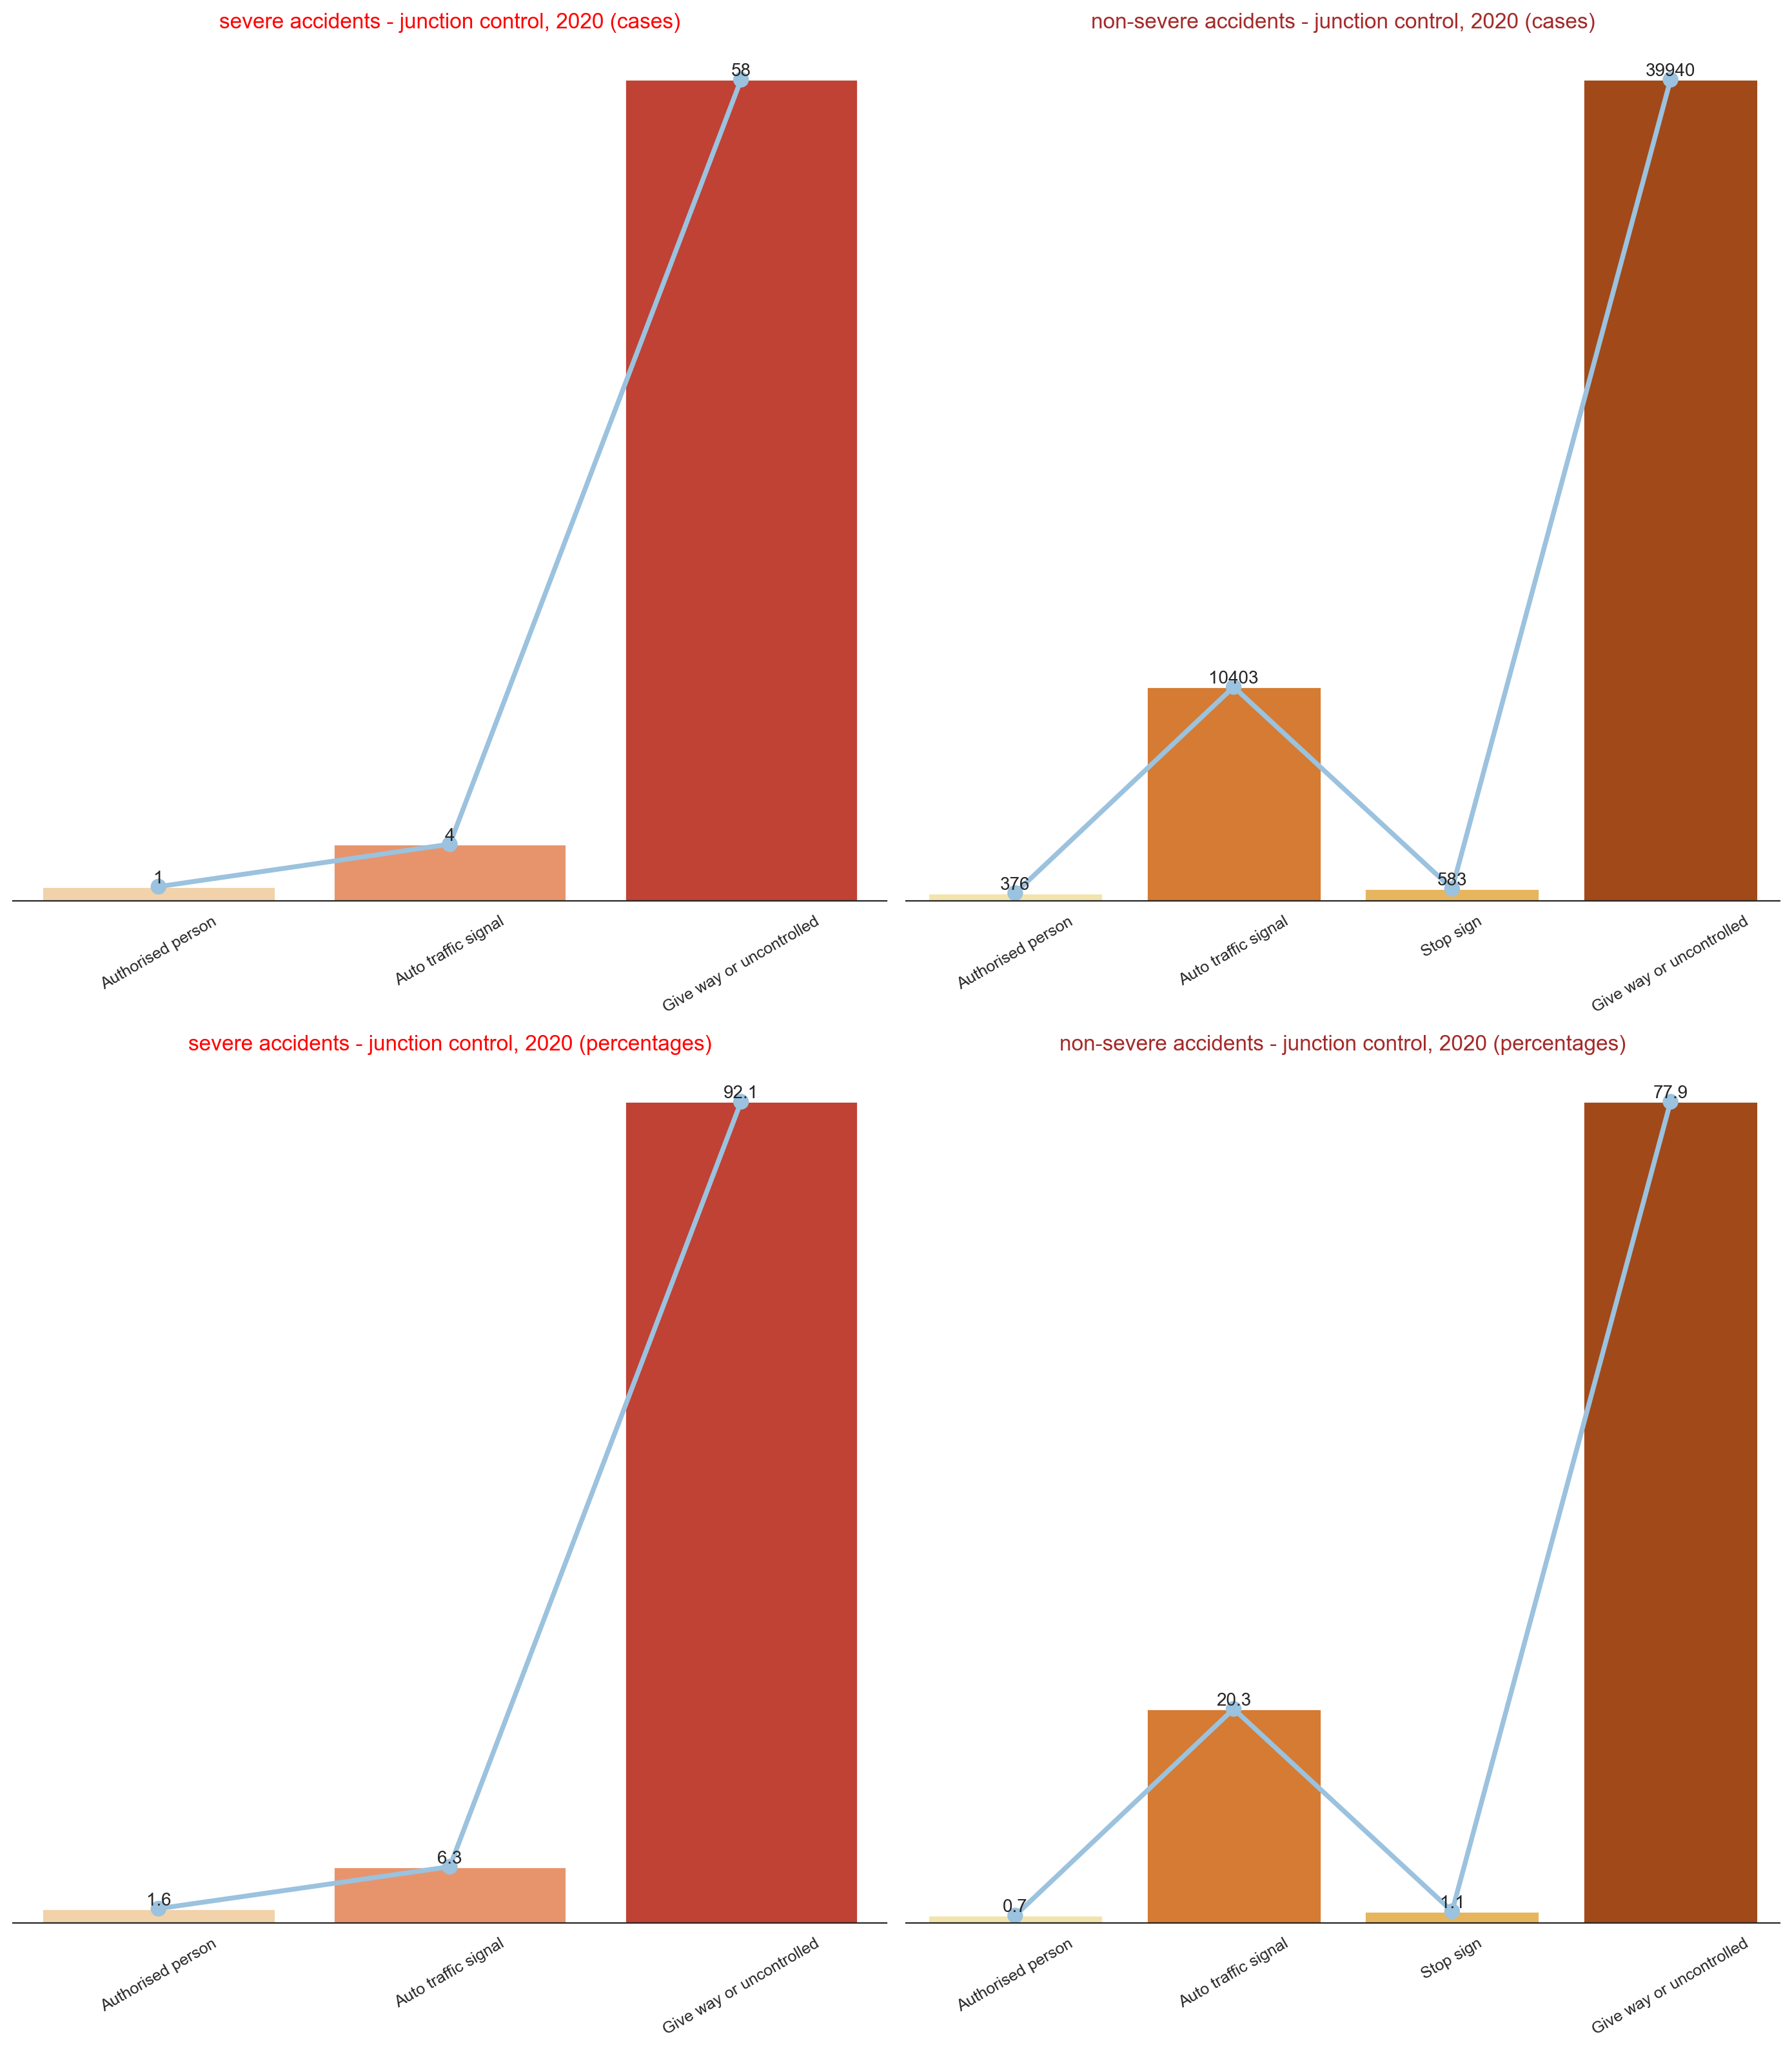

In [80]:
create_2_2('junction control',use_lookup=True,rotate=30,figsize=(12,30))

* in auto trafic signals, there are less severe accidents than non severe.

### what are the most dangerous roads?
***
[back](#Table-of-Contents)

In [81]:
labels = lookup[lookup['field name']=="first_road_class"].loc[:,['code/format','label']]
labels

code/format         label
19           1      Motorway
20           2          A(M)
21           3             A
22           4             B
23           5             C
24           6  Unclassified

In [82]:
def dangerous_roads(df):
    df_road = df.copy()
    df_road["first_road_class"] = df_road["first_road_class"].apply(lambda x: labels[labels["code/format"]==str(x)]["label"].values[0])
    df_road = df_road.groupby(["first_road_class","first_road_number"])["accident_index"].count().reset_index()
    df_road = df_road.rename(columns={"accident_index":"count"})
    sum_accidents = df_road["count"].sum()
    df_road = df_road[~df_road['first_road_class'].isin(["Unclassified","C"])]
    df_road = df_road.sort_values("count",ascending=False).reset_index(drop=True)
    df_road["road_name"] =  df_road["first_road_class"] +"-"+df_road["first_road_number"].astype('str')
    df_road["percentages"] = np.round(100 * df_road["count"]/sum_accidents ,2)
    
    return df_road


severe_dangerous_roads, non_severe_dangerous_roads  =  dangerous_roads(severe_df), dangerous_roads(non_severe_df)

In [83]:
non_severe_dangerous_roads.head(10)   

first_road_class  first_road_number  count road_name  percentages
0                A                 23    519      A-23         0.57
1                A                 38    470      A-38         0.52
2                A                  1    435       A-1         0.48
3                A                  3    432       A-3         0.47
4                A                  2    428       A-2         0.47
5                A                  5    412       A-5         0.45
6                A                 41    411      A-41         0.45
7                A                  4    398       A-4         0.44
8                A                  6    396       A-6         0.44
9                A                 40    393      A-40         0.43

In [84]:
severe_dangerous_roads.head(10)

first_road_class  first_road_number  count   road_name  percentages
0                A                 47      5        A-47         2.48
1                A                 16      4        A-16         1.98
2                A                158      3       A-158         1.49
3         Motorway                  1      2  Motorway-1         0.99
4         Motorway                  6      2  Motorway-6         0.99
5                A                414      2       A-414         0.99
6                A                 92      2        A-92         0.99
7                A                 49      2        A-49         0.99
8                A                 34      2        A-34         0.99
9         Motorway                  4      2  Motorway-4         0.99

In [85]:
TOP_NUMBER = 25
a = severe_dangerous_roads[['road_name','count']].iloc[:TOP_NUMBER]
b = non_severe_dangerous_roads[['road_name','count']].iloc[:TOP_NUMBER]
c= severe_dangerous_roads[['road_name','percentages']].iloc[:TOP_NUMBER]
d= non_severe_dangerous_roads[['road_name','percentages']].iloc[:TOP_NUMBER]

In [86]:
def plot_4_rows():
    fig, ax = plt.subplots(4,1,figsize=(14,16),dpi=250)
    for k,j in enumerate([a,b,c,d]):
        r = k

        if r%2==0:        
            pal = "OrRd"
            t = "severe"
            t_color= "red"
        else:
            pal= "YlOrBr"
            t_color="brown"
            t="non-severe"
        if r<2:
            per="(cases)"
            y="count"
        else:
            per="(percentages)"
            y="percentages"
        pal = sns.color_palette(pal, len(j))
        rank = j.index.argsort().argsort()[::-1]
        ax[r].set_title(f"{TOP_NUMBER} top red roads {t} accidents - {per}, 2020",color=t_color)
# 
        sns.barplot(data = j, x="road_name",y=y,ax=ax[r],palette=np.array(pal)[rank] )
        ax[r].set_yticks([]);
        for bars in ax[r].containers:
            ax[r].bar_label(bars,size=10)
        ax[r].set_xlabel("")
        ax[r].set_ylabel("");
        ax[r].set_xticklabels(labels = j["road_name"],rotation=30)
    plt.tight_layout()
    sns.despine(left=True)

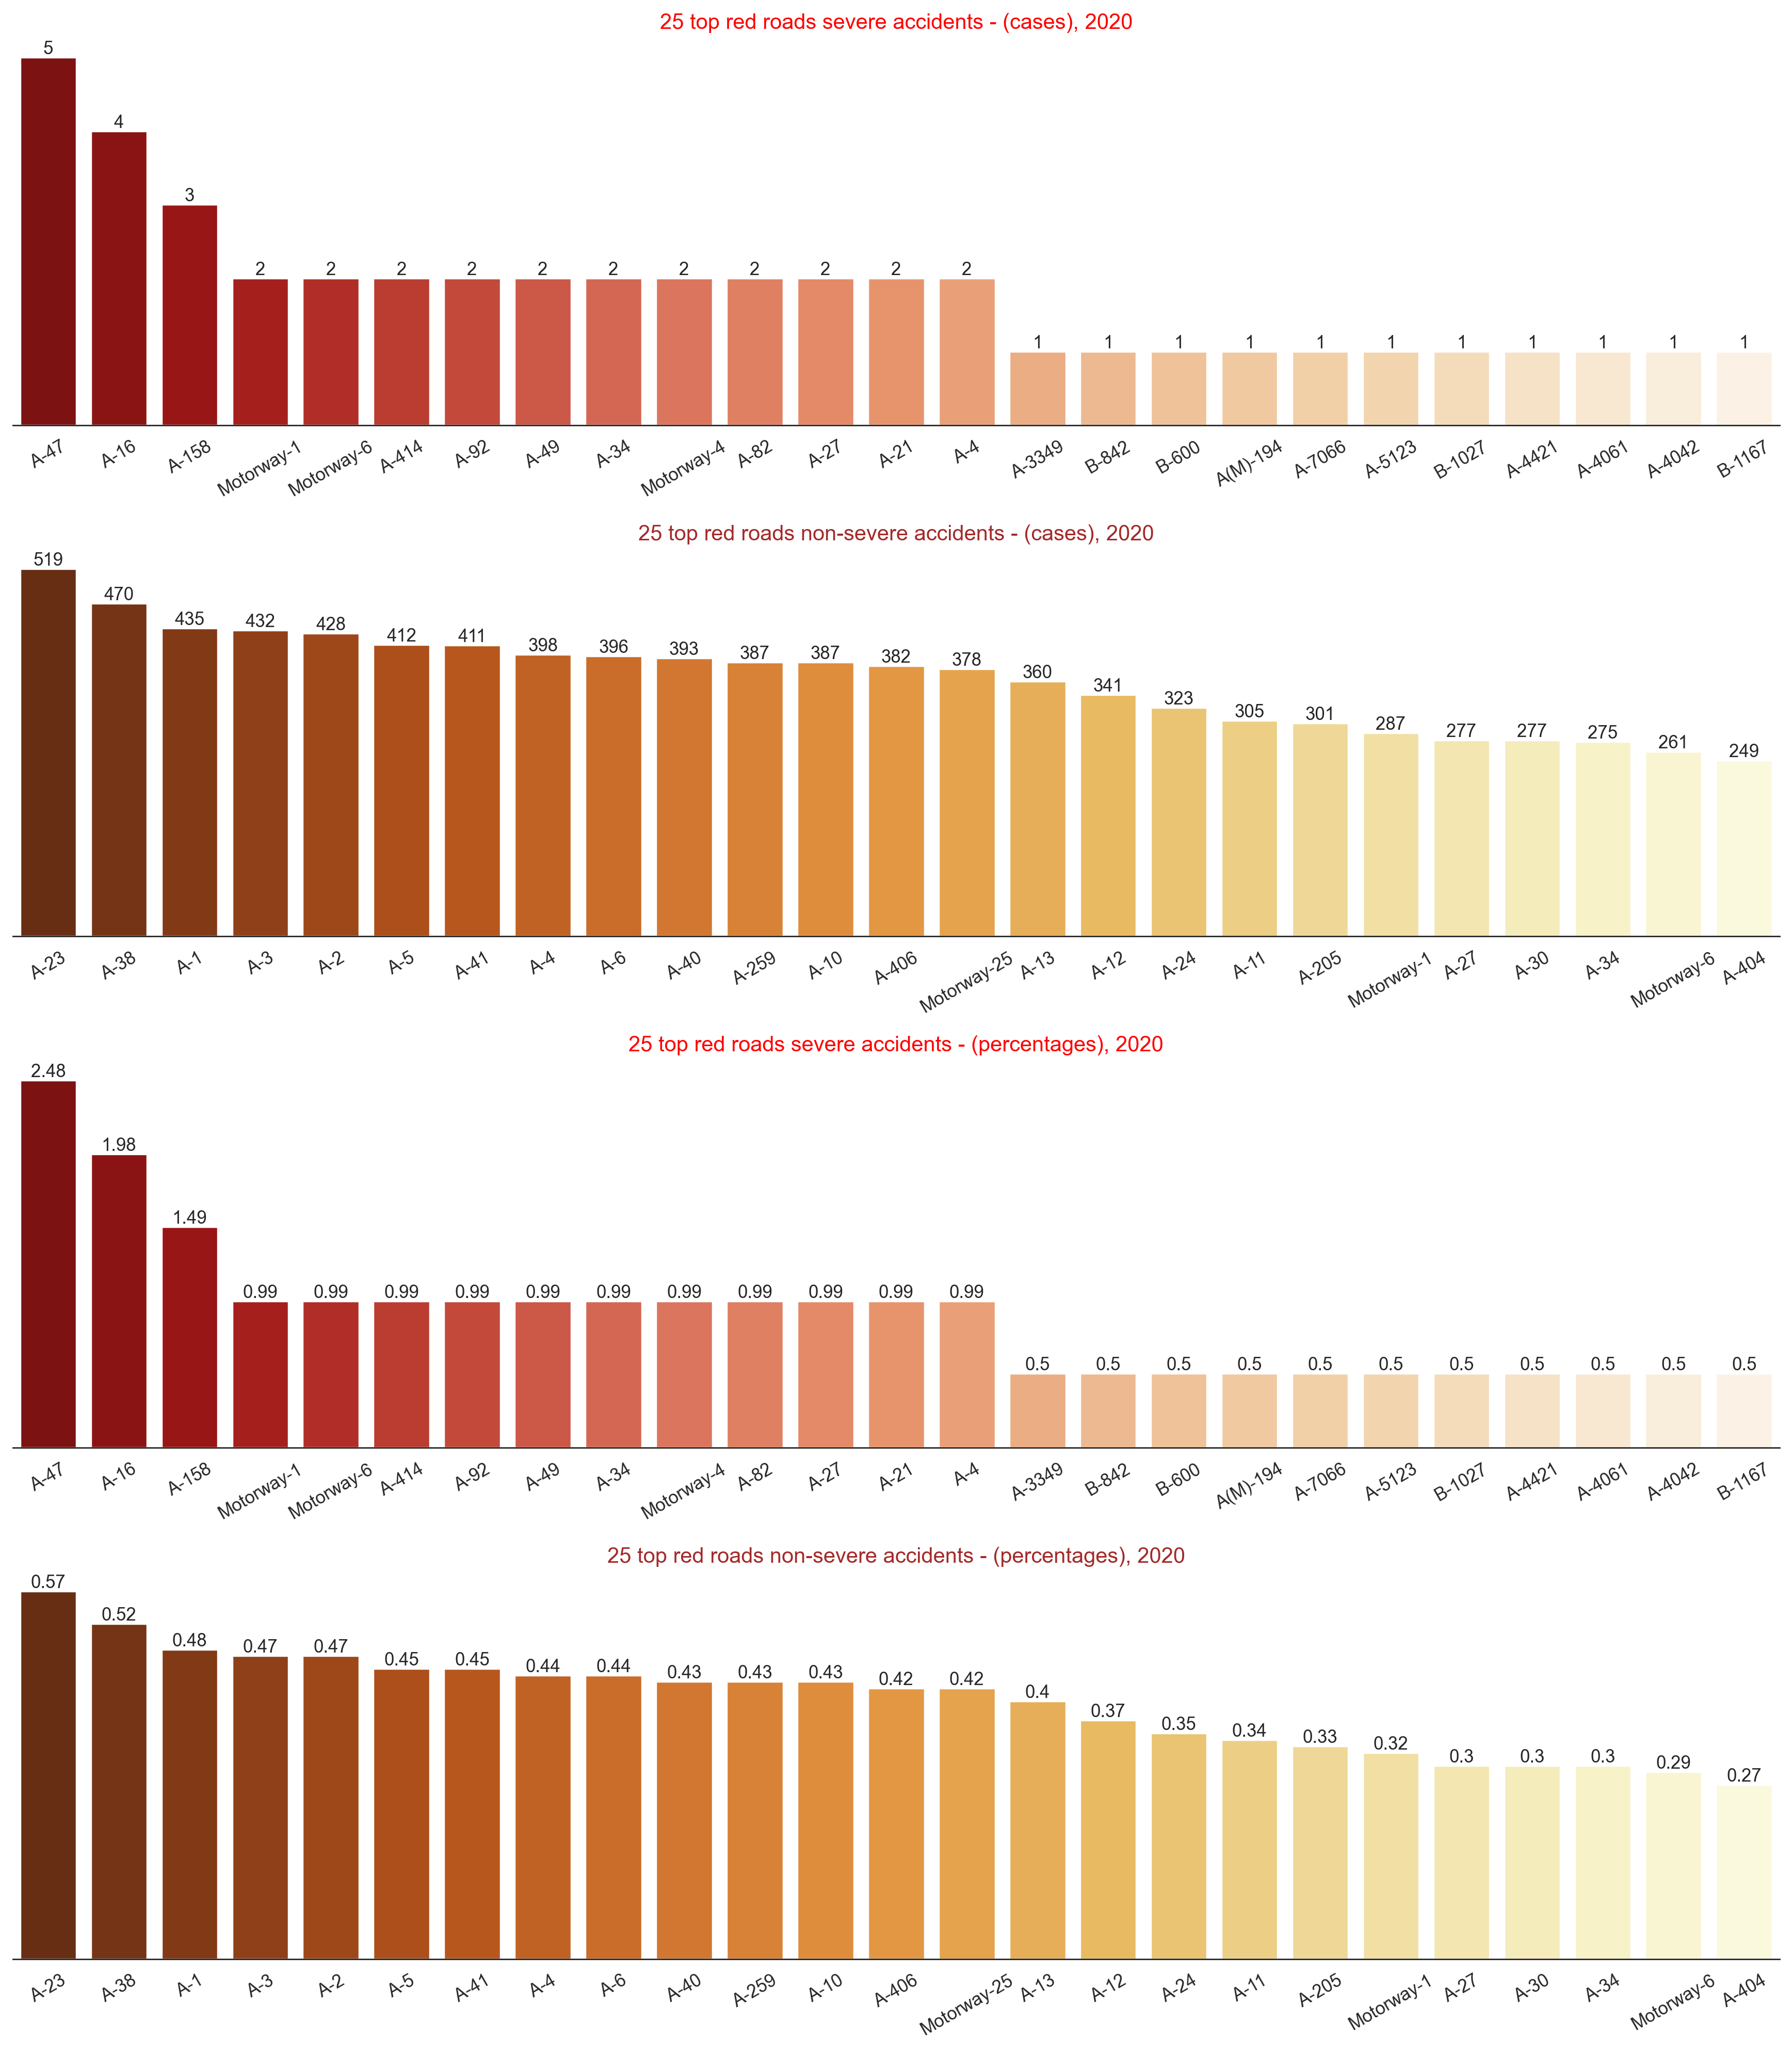

In [87]:
plot_4_rows()

* There are only 5 roads which occur in both "top 25" lists.
* what reinforces our assumption that the features are different.

In [88]:
x = set(a["road_name"]).intersection(set(b["road_name"]))
x

{'A-27', 'A-34', 'A-4', 'Motorway-1', 'Motorway-6'}

In [89]:
len(x)

5

### geodata
***
[back](#Table-of-Contents)

In [90]:
from folium.plugins import MarkerCluster
map_osm = folium.Map(location=[51.509865, -0.118092],
                     tiles='Open Street Map',
                     zoom_start=6)

marker_cluster = MarkerCluster().add_to(map_osm)
for row in severe_df.loc[:,['longitude','latitude','number_of_casualties']].iterrows():
    row_values = row[1]
    location = [row_values['latitude'], row_values['longitude']]
    popup= f"number of casualties: {row_values['number_of_casualties']}"
    marker = folium.Marker(location = location, popup=popup)
    marker.add_to(marker_cluster)

display(map_osm)

* we could see in the map the accident clusters, so we could know were we should focus (beyond the red roads).
* if we change the zoom we would see different clusters.
* so where to focus, it depends on human resources considerations etc.
* if we click on marker we see popup with casualties number.

# Conclusions
***
[back](#Table-of-Contents)

* we saw that severe accidents (by the project definition) are 202 accidents from above 90000 accidents in 2020.

* we saw that when we compare the severe - non severe distributions, severe accidents tend to be more:
    1. on saturday, weekends, 
    2. july, august and december.
    3. in the afternoon (17-18) and in the evening hours too (20-22).
    4. in high speeds, rural areas,
    5. generaly more vehicles involve in severe accidents than in none severe.
    6. happened more in wet or dump road condition.
    7. happend more when there is no lighting.
    8. more in high speed roads.
    9. less happend where the speed is slow, like urban areas, roundabout etc.
    
* we assume that the times are connected to times when people hang out, or in vacations and holidays. beyond the regular times when people come home tired from work (afternoon).
* the speed is crusial too. maybe the most crusial factor which determines the result of the accident - severe or not.
* we could reccomend on more speed limitations in dangerous roads, more reinforcement of keeping distance, more police presence.
* lighting ways is very important too. 
* the top "red roads" are listing above, that roads and their simmilarities should have more attention.
* the severe accidents clusters in UK are in the map above.

### futher research
***
* is there a connection between severe accidents and alcohol?
* what are the kinds of the vehicles are most involve in severe accidents? (trucks? motorcycles?)
* what are the ages involved ? (young? old?)
    
    